<h1> Data Exploration & Merging

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import scorecardpy as sc
import textwrap
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)


<h2> Application_Data Exploratory Data Analysis (EDA)

In [8]:
df = pd.read_csv('ApplicationData.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 120 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(63), int64(41), object(16)
memory usage: 281.5+ MB


SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 120 columns]

<h4> Function To Plot KDE

In [9]:
def plot_histogram(df, column, bins=50):
    plt.figure(figsize=(7, 5))
    sns.histplot(df[column].dropna(), bins=bins, kde=False)
    plt.title(f"Histogram of {column}")
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()
    
def plot_kde_by_target(df, column, target_col='TARGET'):
    plt.figure(figsize=(7, 5))
    for value in sorted(df[target_col].dropna().unique()):
        sns.kdeplot(
            df[df[target_col] == value][column].dropna(),
            label=f"{target_col} = {value}",
            shade=True
        )
    plt.title(f"KDE of {column} by {target_col}")
    plt.xlabel(column)
    plt.ylabel("Density")
    plt.legend()
    plt.tight_layout()
    plt.show()

def plot_horizontal_categorical_bar(df, column, top_n=None, rotate_labels=False):
    """
    - top_n: if set, only plots the top N most frequent categories
    """
    value_counts = df[column].value_counts(dropna=False)

    if top_n:
        value_counts = value_counts.head(top_n)
    
    plt.figure(figsize=(8, 6))
    sns.barplot(x=value_counts.values, y=value_counts.index, orient='h')
    plt.title(f"Distribution of '{column}'")
    plt.xlabel("Count")
    plt.ylabel(column)
    if rotate_labels:
        plt.yticks(rotation=45)
    plt.tight_layout()
    plt.show()

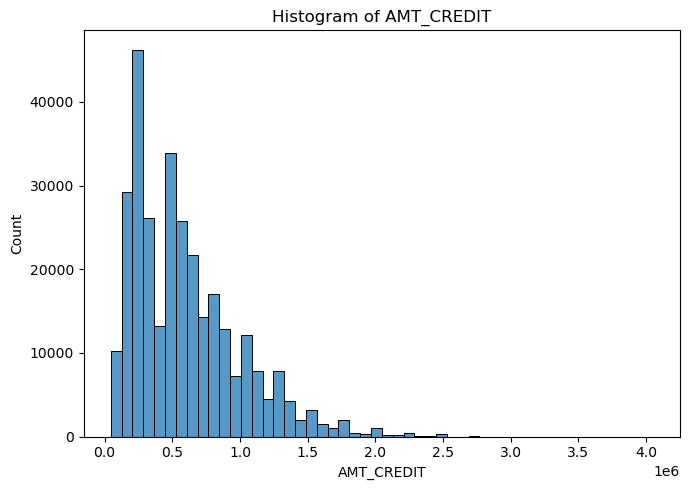

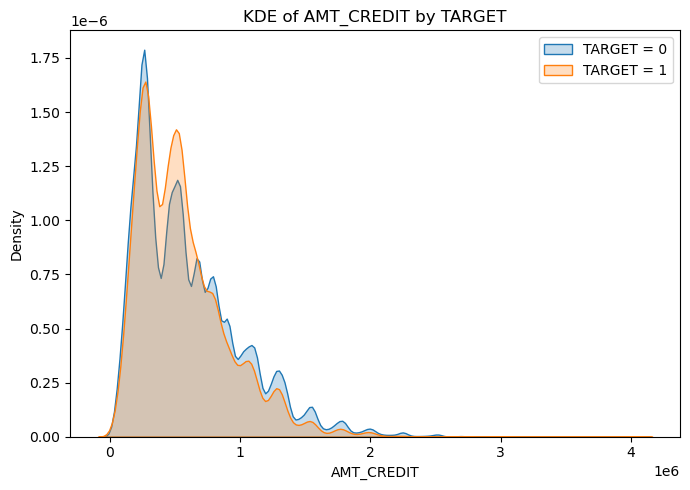

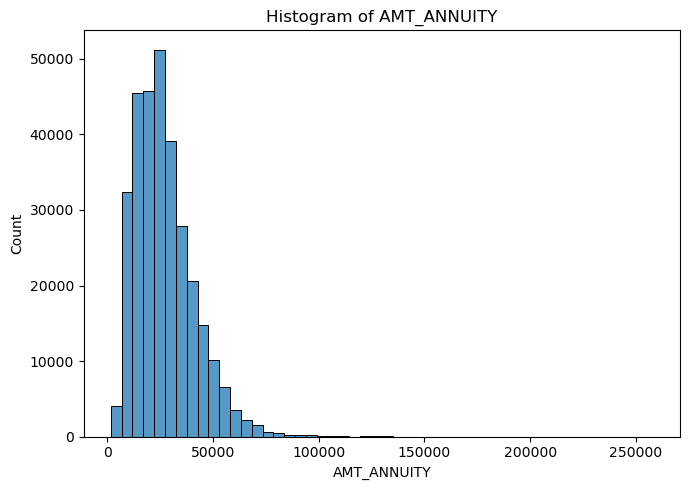

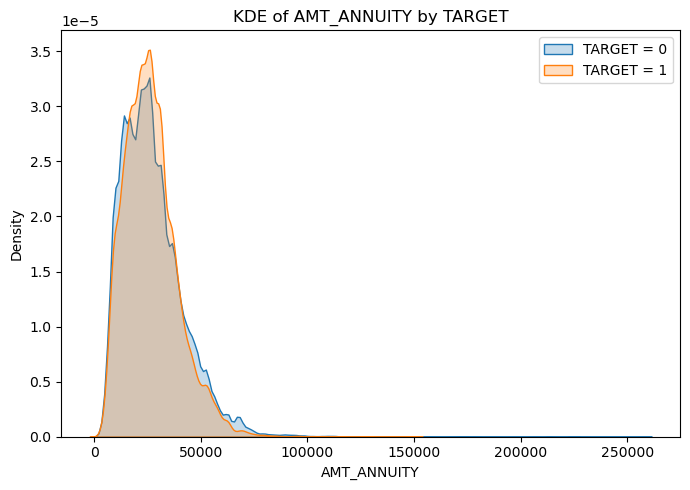

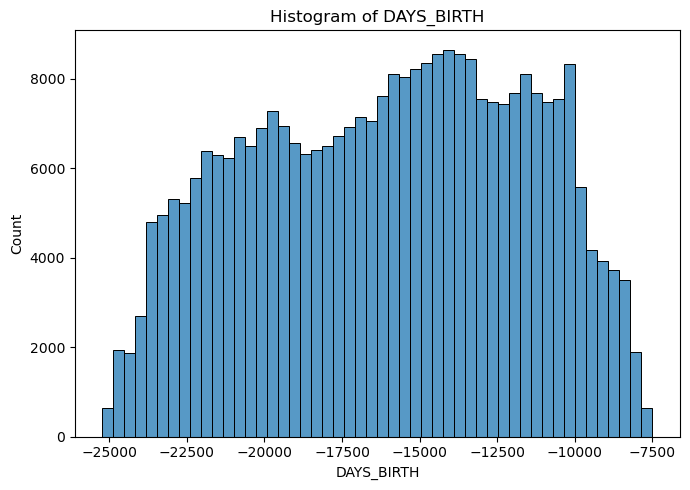

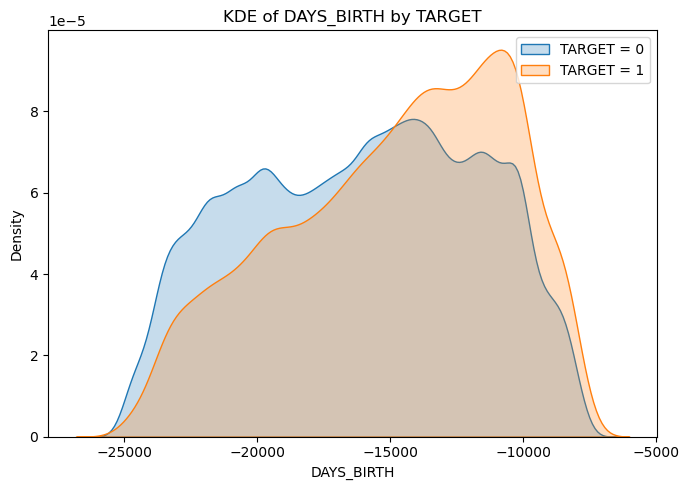

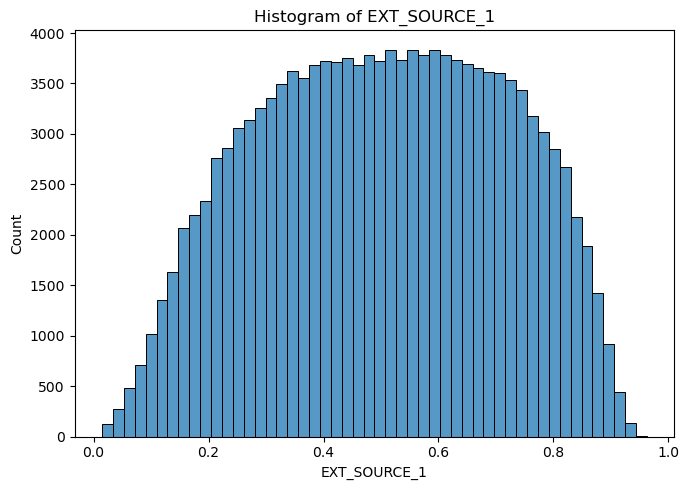

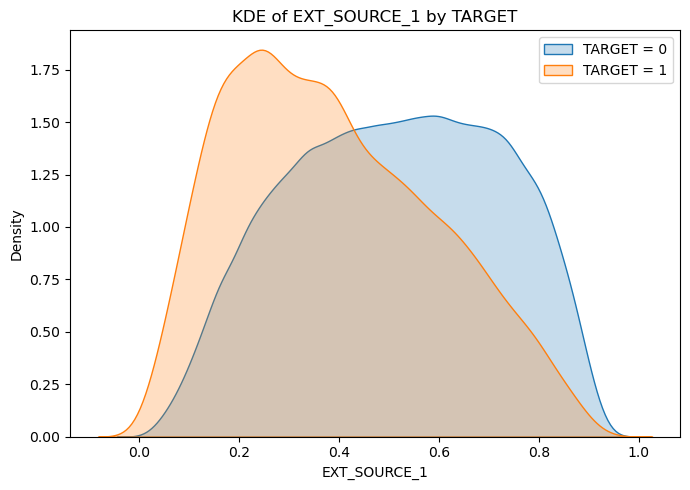

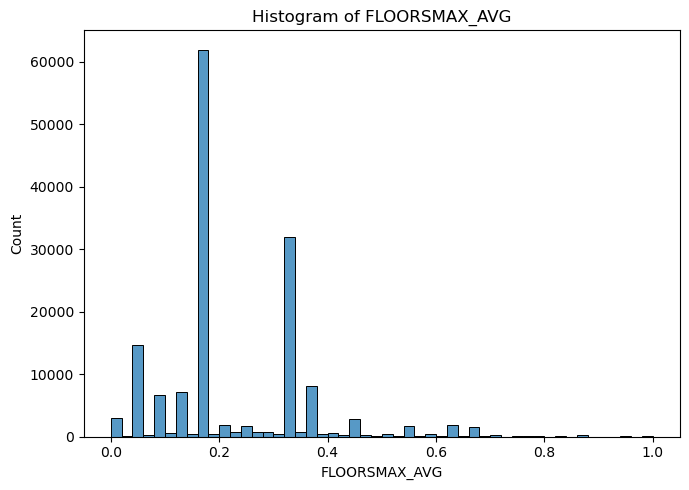

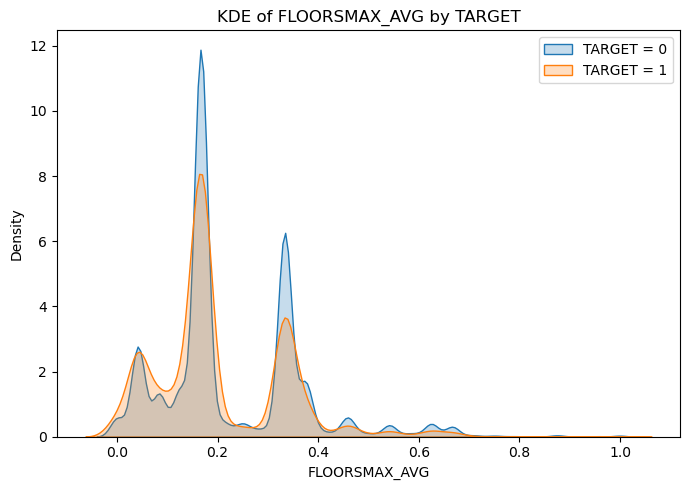

In [10]:
num_columns_to_plot = [
    'AMT_CREDIT',
    'AMT_ANNUITY',
    'DAYS_BIRTH',
    'EXT_SOURCE_1',
    'FLOORSMAX_AVG'
]

# Histograms (univariate)
for col in num_columns_to_plot:
    if col in df.columns:
        plot_histogram(df, col)
        plot_kde_by_target(df, col, target_col='TARGET')

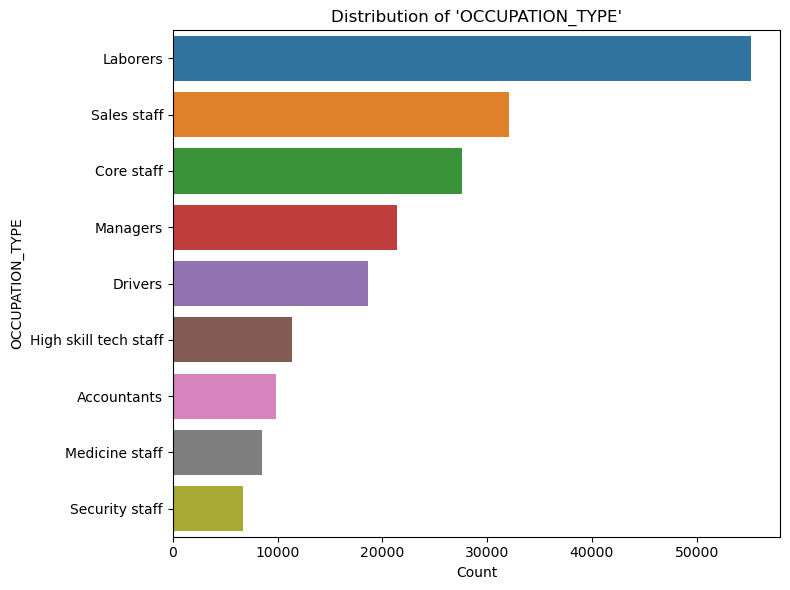

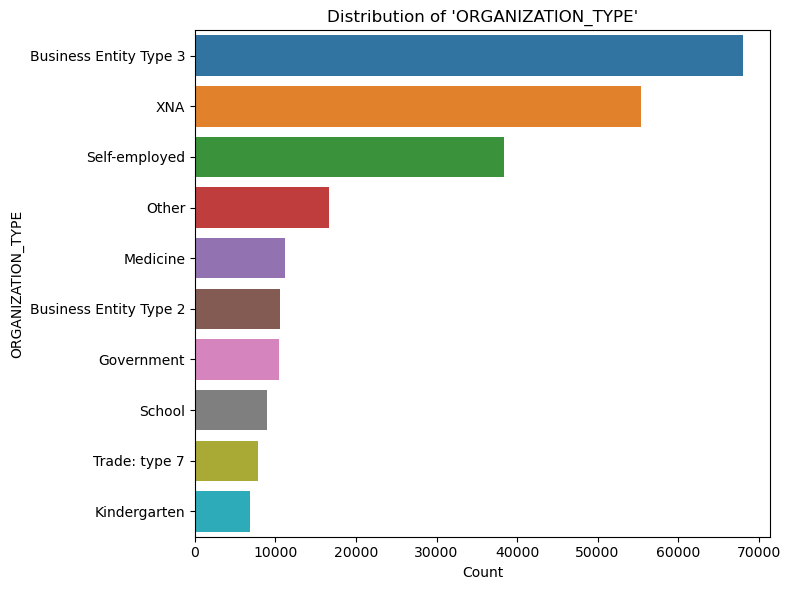

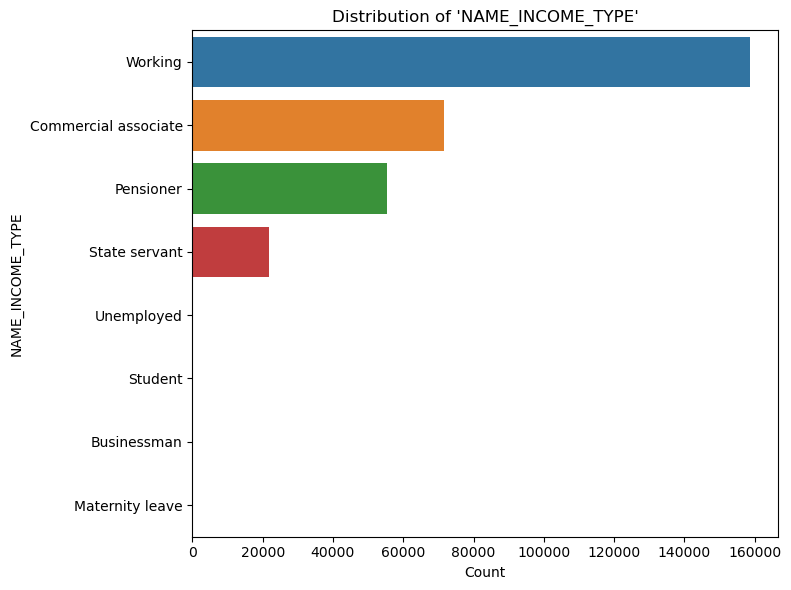

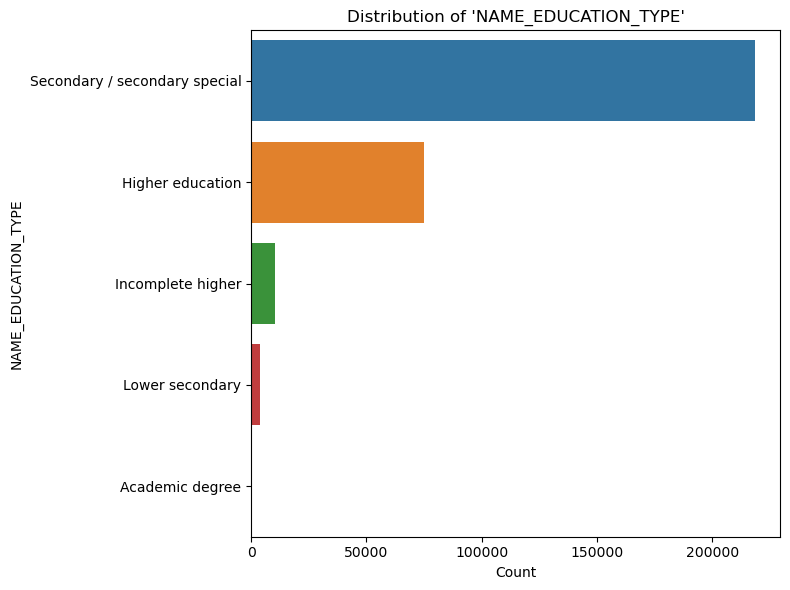

In [11]:
cat_columns_to_plot = [
    'OCCUPATION_TYPE',
    'ORGANIZATION_TYPE',
    'NAME_INCOME_TYPE',
    'NAME_EDUCATION_TYPE'
]

# Histograms (univariate)
for col in cat_columns_to_plot:
    if col in df.columns:
        plot_horizontal_categorical_bar(df, col, top_n=10)
    

Note: The empty looking bar charts are not actually empty. Eg There are 10 students under NAME_INCOME_TYPE

<h3> Checking for % Missing Values

In [12]:
missing = df.isnull().mean().sort_values(ascending=False)
missing = missing[missing > 0] * 100  # Show as percentage

pd.set_option('display.max_rows', None)
display(missing.reset_index().rename(columns={'index': 'Column', 0: 'Missing (%)'}))

Column  Missing (%)
0                COMMONAREA_MODE    69.872297
1                 COMMONAREA_AVG    69.872297
2                COMMONAREA_MEDI    69.872297
3       NONLIVINGAPARTMENTS_MEDI    69.432963
4       NONLIVINGAPARTMENTS_MODE    69.432963
5        NONLIVINGAPARTMENTS_AVG    69.432963
6             FONDKAPREMONT_MODE    68.386172
7          LIVINGAPARTMENTS_MEDI    68.354953
8           LIVINGAPARTMENTS_AVG    68.354953
9          LIVINGAPARTMENTS_MODE    68.354953
10                 FLOORSMIN_AVG    67.848630
11                FLOORSMIN_MODE    67.848630
12                FLOORSMIN_MEDI    67.848630
13              YEARS_BUILD_MEDI    66.497784
14              YEARS_BUILD_MODE    66.497784
15               YEARS_BUILD_AVG    66.497784
16                   OWN_CAR_AGE    65.990810
17                 LANDAREA_MEDI    59.376738
18                  LANDAREA_AVG    59.376738
19                 LANDAREA_MODE    59.376738
20             BASEMENTAREA_MEDI    58.515956
21              BASEMENTAREA_AVG    58.515956
22             BASEMENTAREA_MODE    58.515956
23                  EXT_SOURCE_1    56.381073
24             NONLIVINGAREA_AVG    55.179164
25            NONLIVINGAREA_MODE    55.179164
26            NONLIVINGAREA_MEDI    55.179164
27                ELEVATORS_MEDI    53.295980
28                ELEVATORS_MODE    53.295980
29                 ELEVATORS_AVG    53.295980
30            WALLSMATERIAL_MODE    50.840783
31               APARTMENTS_MEDI    50.749729
32                APARTMENTS_AVG    50.749729
33               APARTMENTS_MODE    50.749729
34                ENTRANCES_MEDI    50.348768
35                 ENTRANCES_AVG    50.348768
36                ENTRANCES_MODE    50.348768
37                LIVINGAREA_AVG    50.193326
38               LIVINGAREA_MODE    50.193326
39               LIVINGAREA_MEDI    50.193326
40                HOUSETYPE_MODE    50.176091
41                FLOORSMAX_MODE    49.760822
42                FLOORSMAX_MEDI    49.760822
43                 FLOORSMAX_AVG    49.760822
44  YEARS_BEGINEXPLUATATION_MODE    48.781019
45   YEARS_BEGINEXPLUATATION_AVG    48.781019
46  YEARS_BEGINEXPLUATATION_MEDI    48.781019
47                TOTALAREA_MODE    48.268517
48           EMERGENCYSTATE_MODE    47.398304
49               OCCUPATION_TYPE    31.345545
50     AMT_REQ_CREDIT_BUREAU_MON    13.501631
51     AMT_REQ_CREDIT_BUREAU_QRT    13.501631
52    AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
53     AMT_REQ_CREDIT_BUREAU_DAY    13.501631
54    AMT_REQ_CREDIT_BUREAU_HOUR    13.501631
55    AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
56               NAME_TYPE_SUITE     0.420148
57      DEF_30_CNT_SOCIAL_CIRCLE     0.332021
58      DEF_60_CNT_SOCIAL_CIRCLE     0.332021
59      OBS_60_CNT_SOCIAL_CIRCLE     0.332021
60      OBS_30_CNT_SOCIAL_CIRCLE     0.332021
61               AMT_GOODS_PRICE     0.090403
62                   AMT_ANNUITY     0.003902
63               CNT_FAM_MEMBERS     0.000650
64        DAYS_LAST_PHONE_CHANGE     0.000325

<h2> Flattening Bureau Data & Bureau Data EDA

In [13]:
bureau_df = pd.read_csv("BureauData.csv")
# Using domain logic to drop columns not useful for aggregation
bureau_df.info()
bureau_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE           object 
 3   CREDIT_CURRENCY         object 
 4   DAYS_CREDIT             int64  
 5   CREDIT_DAY_OVERDUE      int64  
 6   DAYS_CREDIT_ENDDATE     float64
 7   DAYS_ENDDATE_FACT       float64
 8   AMT_CREDIT_MAX_OVERDUE  float64
 9   CNT_CREDIT_PROLONG      int64  
 10  AMT_CREDIT_SUM          float64
 11  AMT_CREDIT_SUM_DEBT     float64
 12  AMT_CREDIT_SUM_LIMIT    float64
 13  AMT_CREDIT_SUM_OVERDUE  float64
 14  CREDIT_TYPE             object 
 15  DAYS_CREDIT_UPDATE      int64  
 16  AMT_ANNUITY             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 222.6+ MB


SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
0      215354       5714462        Closed      currency 1         -497   
1      215354       5714463        Active      currency 1         -208   
2      215354       5714464        Active      currency 1         -203   
3      215354       5714465        Active      currency 1         -203   
4      215354       5714466        Active      currency 1         -629   

   CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
0                   0               -153.0             -153.0   
1                   0               1075.0                NaN   
2                   0                528.0                NaN   
3                   0                  NaN                NaN   
4                   0               1197.0                NaN   

   AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  \
0                     NaN                   0         91323.0   
1                     NaN                   0        225000.0   
2                     NaN                   0        464323.5   
3                     NaN                   0         90000.0   
4                 77674.5                   0       2700000.0   

   AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  \
0                  0.0                   NaN                     0.0   
1             171342.0                   NaN                     0.0   
2                  NaN                   NaN                     0.0   
3                  NaN                   NaN                     0.0   
4                  NaN                   NaN                     0.0   

       CREDIT_TYPE  DAYS_CREDIT_UPDATE  AMT_ANNUITY  
0  Consumer credit                -131          NaN  
1      Credit card                 -20          NaN  
2  Consumer credit                 -16          NaN  
3      Credit card                 -16          NaN  
4  Consumer credit                 -21          NaN

In [14]:
missing = bureau_df.isnull().mean().sort_values(ascending=False)
missing = missing[missing > 0] * 100  # Show as percentage

pd.set_option('display.max_rows', None)
display(missing.reset_index().rename(columns={'index': 'Column', 0: 'Missing (%)'}))

Column  Missing (%)
0             AMT_ANNUITY    71.473490
1  AMT_CREDIT_MAX_OVERDUE    65.513264
2       DAYS_ENDDATE_FACT    36.916958
3    AMT_CREDIT_SUM_LIMIT    34.477415
4     AMT_CREDIT_SUM_DEBT    15.011932
5     DAYS_CREDIT_ENDDATE     6.149573
6          AMT_CREDIT_SUM     0.000757

<h3>Univariate Analysis

In [15]:
# Separating columns by type for visualisation
continuous_columns = [
    "DAYS_CREDIT",
    "CREDIT_DAY_OVERDUE",
    "DAYS_CREDIT_ENDDATE",
    "DAYS_ENDDATE_FACT",
    "AMT_CREDIT_MAX_OVERDUE",
    "CNT_CREDIT_PROLONG",
    "AMT_CREDIT_SUM",
    "AMT_CREDIT_SUM_DEBT",
    "AMT_CREDIT_SUM_LIMIT",
    "AMT_CREDIT_SUM_OVERDUE",
    "DAYS_CREDIT_UPDATE",
    "AMT_ANNUITY"
]

categorical_columns = [
    "CREDIT_ACTIVE",
    "CREDIT_CURRENCY",
    "CREDIT_TYPE"
]

Continuous Features (with log transform & outlier clipping)

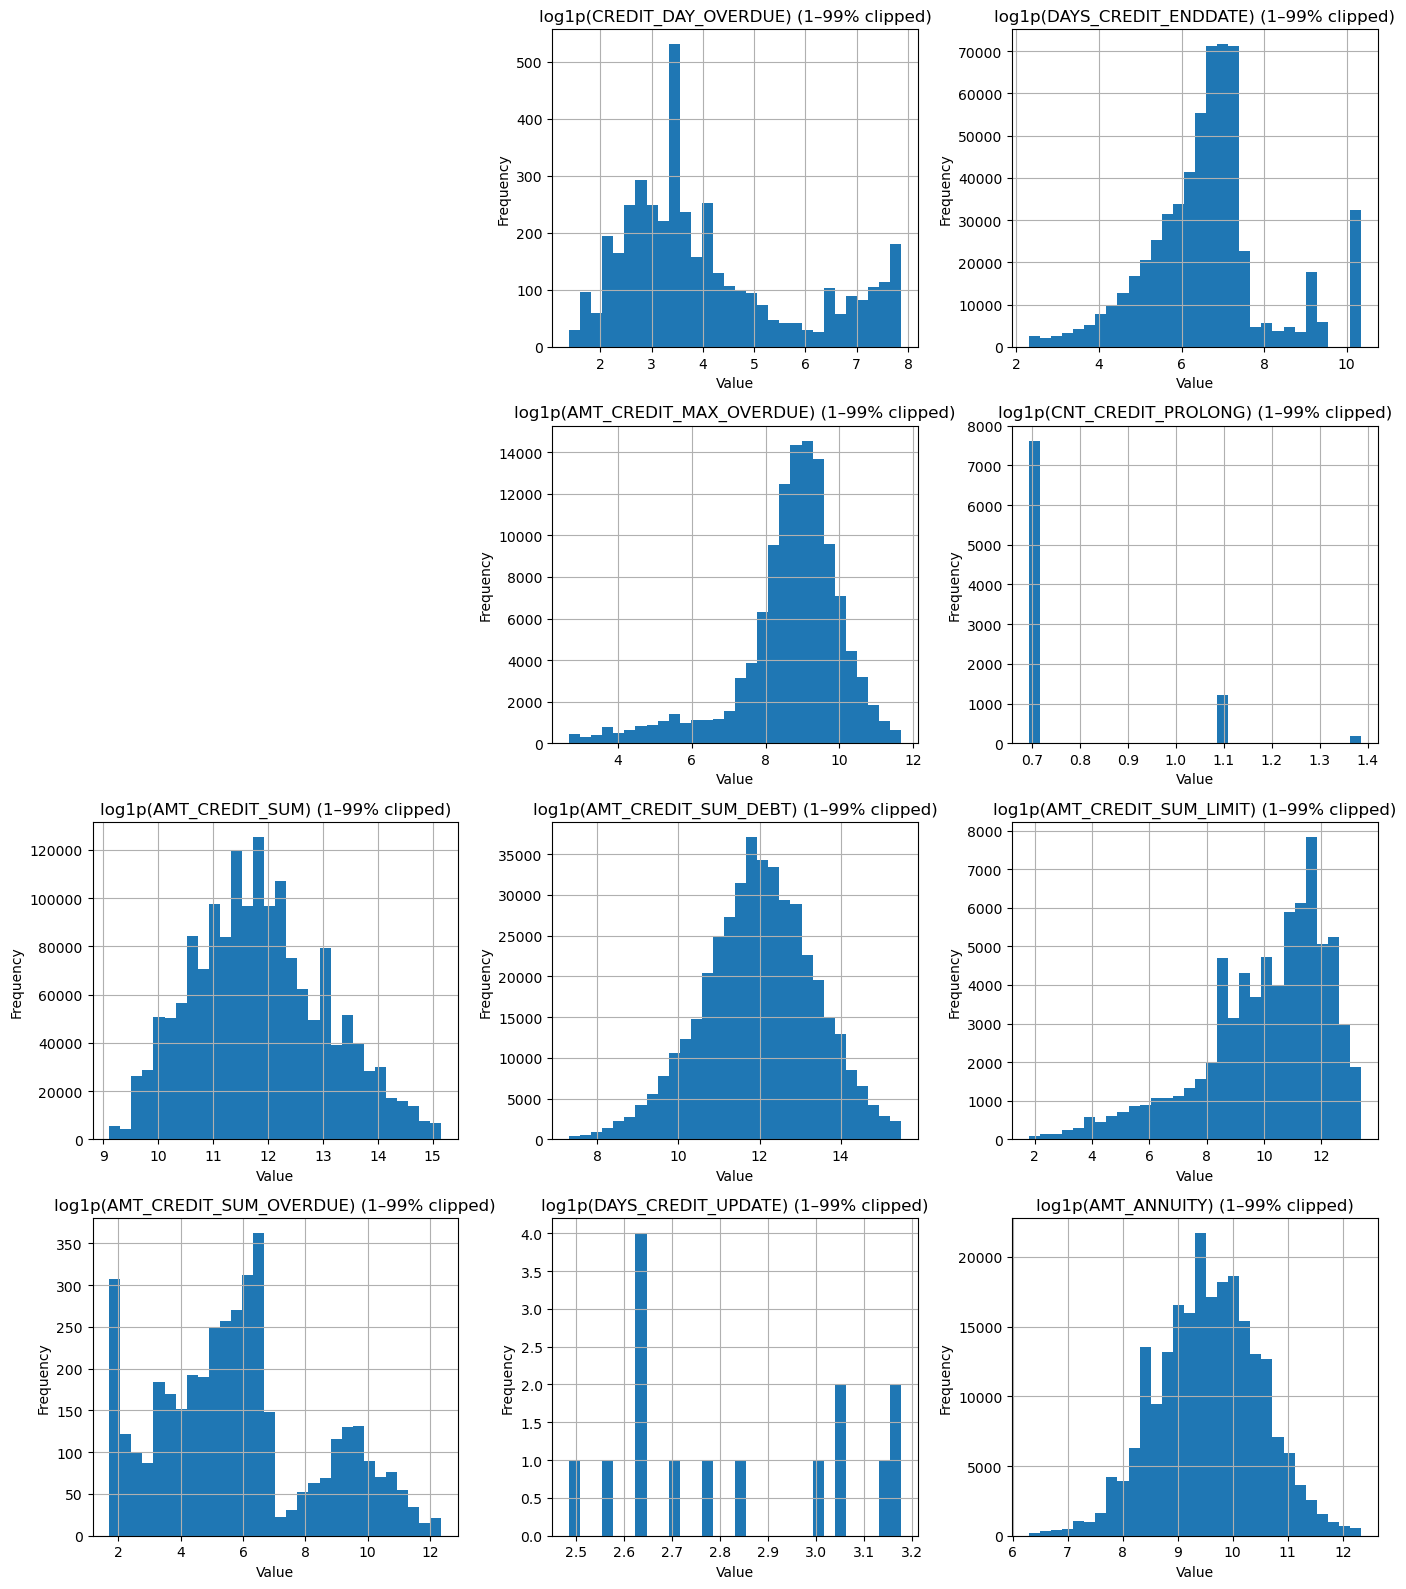

In [16]:
# Set up subplots
num_rows = (len(continuous_columns) + 2) // 3
num_cols = min(len(continuous_columns), 3)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(14, 4 * num_rows))
axes = axes.flatten()

# Plot each histogram
for i, column in enumerate(continuous_columns):
    data = bureau_df[column].dropna()
    data = data[data > 0]  # log1p requires > 0
    if not data.empty:
        data_log = np.log1p(data)
        q_low = data_log.quantile(0.01)
        q_high = data_log.quantile(0.99)
        data_clipped = data_log[(data_log >= q_low) & (data_log <= q_high)]
        data_clipped.hist(ax=axes[i], bins=30)
        axes[i].set_title(f"log1p({column}) (1–99% clipped)")
        axes[i].set_xlabel("Value")
        axes[i].set_ylabel("Frequency")
    else:
        axes[i].set_visible(False)  # skip empty plots

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Categorical Features

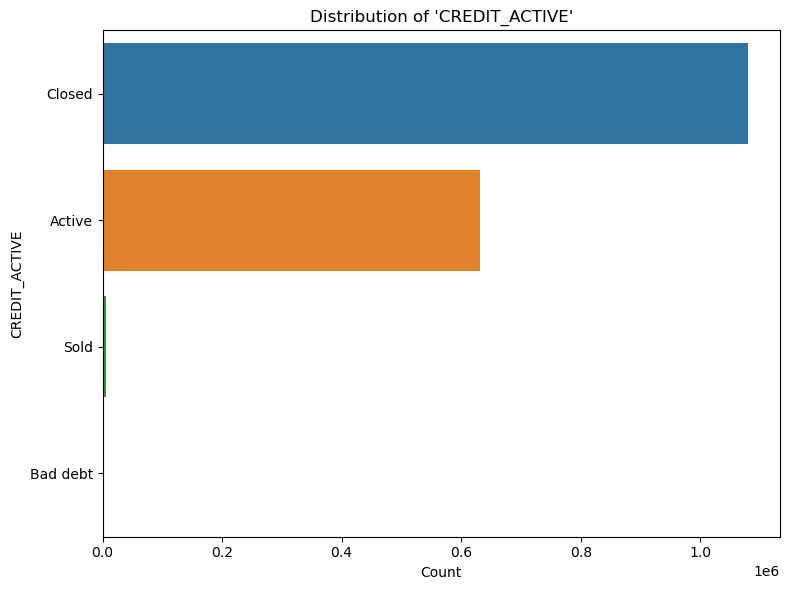

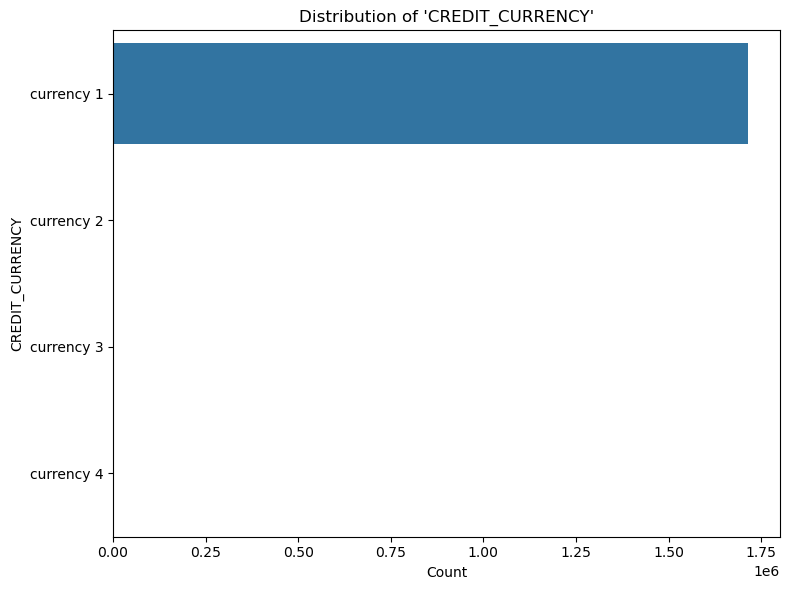

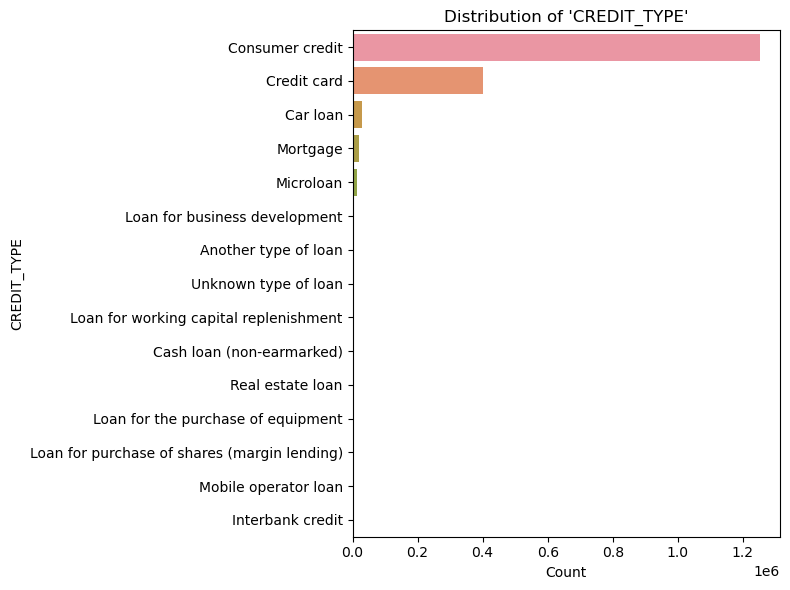

In [17]:
for col in categorical_columns:
    if col in bureau_df.columns:
        plot_horizontal_categorical_bar(bureau_df, col)

<h4> Dropping Columns based on EDA

In [18]:
bureau_df = bureau_df.drop(columns=[
    "SK_ID_BUREAU",        # Only identifies individual credit records
    "CREDIT_CURRENCY",     # 99.9% = currency 1
    "DAYS_CREDIT_UPDATE"   # Too redundant with DAYS_CREDIT / END_DATE
])

<h4> Grouping & Aggregation

In [19]:
# Step 2: Aggregation
agg_map = {
    "DAYS_CREDIT": "min",
    "DAYS_CREDIT_ENDDATE": "mean",
    "CREDIT_DAY_OVERDUE": "max",
    "AMT_CREDIT_MAX_OVERDUE": "max",
    "AMT_CREDIT_SUM_OVERDUE": "sum",
    "AMT_CREDIT_SUM": ["sum", "mean"],
    "AMT_CREDIT_SUM_DEBT": ["sum", "mean"],
    "CNT_CREDIT_PROLONG": "sum"
}

bureau_agg = bureau_df.groupby("SK_ID_CURR").agg(agg_map)
bureau_agg.columns = ['_'.join(col).strip('_') for col in bureau_agg.columns]
bureau_agg = bureau_agg.reset_index()

# Step 3: Pivot CREDIT_ACTIVE counts
status_counts = (
    bureau_df.pivot_table(index="SK_ID_CURR", columns="CREDIT_ACTIVE", values="AMT_CREDIT_SUM", aggfunc="count", fill_value=0)
    .reset_index()
)
status_counts.columns = ["SK_ID_CURR"] + [f"CREDIT_ACTIVE_{c}" for c in status_counts.columns[1:]]
# Step 4: Merge everything
bureau_flat = bureau_agg.merge(status_counts, on="SK_ID_CURR", how="left")

<h4> Merging </h4>

In [20]:
#Merge Datasets on SK_ID_CURR
merged_data = df.merge(bureau_flat, on="SK_ID_CURR", how="left")
merged_data.drop(columns="SK_ID_CURR",inplace=True)
#Save the Final Merged Data to CSV
merged_data.to_csv("after_merge.csv", index=False)
#Preview Merged Data
merged_data.isnull().sum()

TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE                     0
FLAG_PHONE               

<h1> Data Preparation

In [21]:
df = pd.read_csv('after_merge.csv')

<h3>Data Selection Via Domain Knowledge <br> House Improvement Loans : 
<br>1 Only for thow who own a house <br>
2 Age must be above 21 and less than 65 years (including leap years)
<h5>High % Missing Data that are not relevant to domain logic (Such as Ext_source 1/ Living_Area) are dropped. Please refer to excel file "Data Dict" for <b> each independant variable's domain logic</b>

In [22]:
df = df[
    (df['FLAG_OWN_REALTY'] == 'Y') &
    (df['DAYS_BIRTH'] < -7670) &
    (df['DAYS_BIRTH'] > -23741)
]

drop_cols = [
    # Identifiers
    'CODE_GENDER',

    # Redundant contact details
    'FLAG_MOBIL', 'FLAG_PHONE', 

    # Redundant address mismatch flags
    'REG_REGION_NOT_LIVE_REGION',
    'LIVE_REGION_NOT_WORK_REGION',
    'LIVE_CITY_NOT_WORK_CITY',
    'NAME_TYPE_SUITE','OWN_CAR_AGE',

    # Application timing info
    'WEEKDAY_APPR_PROCESS_START',
    'HOUR_APPR_PROCESS_START',

    # Low info / redundant / noisy house features
    'COMMONAREA_AVG', 'COMMONAREA_MODE', 'COMMONAREA_MEDI',
    'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAPARTMENTS_MEDI',
    'BASEMENTAREA_AVG', 'BASEMENTAREA_MODE', 'BASEMENTAREA_MEDI',
    'FLOORSMIN_AVG', 'FLOORSMIN_MODE', 'FLOORSMIN_MEDI',
    'ELEVATORS_AVG', 'ELEVATORS_MODE', 'ELEVATORS_MEDI',
    'ENTRANCES_AVG', 'ENTRANCES_MODE', 'ENTRANCES_MEDI',
    'LANDAREA_AVG', 'LANDAREA_MODE', 'LANDAREA_MEDI',
    'LIVINGAPARTMENTS_AVG', 'LIVINGAPARTMENTS_MODE', 'LIVINGAPARTMENTS_MEDI',
    'NONLIVINGAREA_AVG', 'NONLIVINGAREA_MODE', 'NONLIVINGAREA_MEDI',
    'APARTMENTS_AVG', 'APARTMENTS_MODE', 'APARTMENTS_MEDI',
    'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BEGINEXPLUATATION_MEDI',
    'YEARS_BUILD_MODE', 'YEARS_BUILD_MEDI', 'LIVINGAREA_MEDI'
    'FLOORSMAX_MODE', 'FLOORSMAX_MEDI', 'LANDAREA_MEDI','LIVINGAREA_MODE','YEARS_BUILD_AVG',
    'WALLSMATERIAL_MODE', 'HOUSETYPE_MODE', 'FONDKAPREMONT_MODE', 'EMERGENCYSTATE_MODE', 'LIVINGAREA_MEDI ',
    'TOTAL_AREA_MODE', 'REGION_RATING_CLIENT_W_CITY',

    # Credit bureau enquiry columns to drop
    'AMT_REQ_CREDIT_BUREAU_DAY',
    'AMT_REQ_CREDIT_BUREAU_WEEK',
    'AMT_REQ_CREDIT_BUREAU_QRT',

    # Weak social circle features
    'OBS_30_CNT_SOCIAL_CIRCLE',
    'OBS_60_CNT_SOCIAL_CIRCLE',
]

df.drop(columns=drop_cols, inplace=True, errors='ignore')

<h3> Dimensionality Reduction : </h3> 
<h4> Feature Extraction

In [23]:
# Combine FLAG_DOCUMENT_* into NUM_DOCS_PROVIDED
doc_cols = [col for col in df.columns if col.startswith('FLAG_DOCUMENT_')]
df['NUM_DOCS_PROVIDED'] = df[doc_cols].sum(axis=1)
df.drop(columns=doc_cols, inplace=True)

# Create RATIO_LIFE_EMPLOYED
df['RATIO_LIFE_EMPLOYED'] = np.where(
    df['DAYS_EMPLOYED'].notna() & df['DAYS_BIRTH'].notna(),
    df['DAYS_EMPLOYED'] / df['DAYS_BIRTH'],
    np.nan
)
# Create LOAN_TO_VALUE
df['LOAN_TO_VALUE'] = np.where(
    df['AMT_CREDIT'].notna() & df['AMT_GOODS_PRICE'].notna(),
    df['AMT_CREDIT'] / df['AMT_GOODS_PRICE'],
    np.nan
)
# Drop the original columns
df.drop(columns=['DAYS_EMPLOYED', 'DAYS_BIRTH','AMT_CREDIT', 'AMT_GOODS_PRICE'], inplace=True)
# Check the new columns
df[['RATIO_LIFE_EMPLOYED', 'LOAN_TO_VALUE']].describe()
pd.set_option('display.max_columns', None)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 207300 entries, 0 to 307509
Data columns (total 55 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   TARGET                       207300 non-null  int64  
 1   NAME_CONTRACT_TYPE           207300 non-null  object 
 2   FLAG_OWN_CAR                 207300 non-null  object 
 3   FLAG_OWN_REALTY              207300 non-null  object 
 4   CNT_CHILDREN                 207300 non-null  int64  
 5   AMT_INCOME_TOTAL             207300 non-null  float64
 6   AMT_ANNUITY                  207297 non-null  float64
 7   NAME_INCOME_TYPE             207300 non-null  object 
 8   NAME_EDUCATION_TYPE          207300 non-null  object 
 9   NAME_FAMILY_STATUS           207300 non-null  object 
 10  NAME_HOUSING_TYPE            207300 non-null  object 
 11  REGION_POPULATION_RELATIVE   207300 non-null  float64
 12  DAYS_REGISTRATION            207300 non-null  float64
 13  DAYS

<h4> Further Selection Based On Correlation </h4>

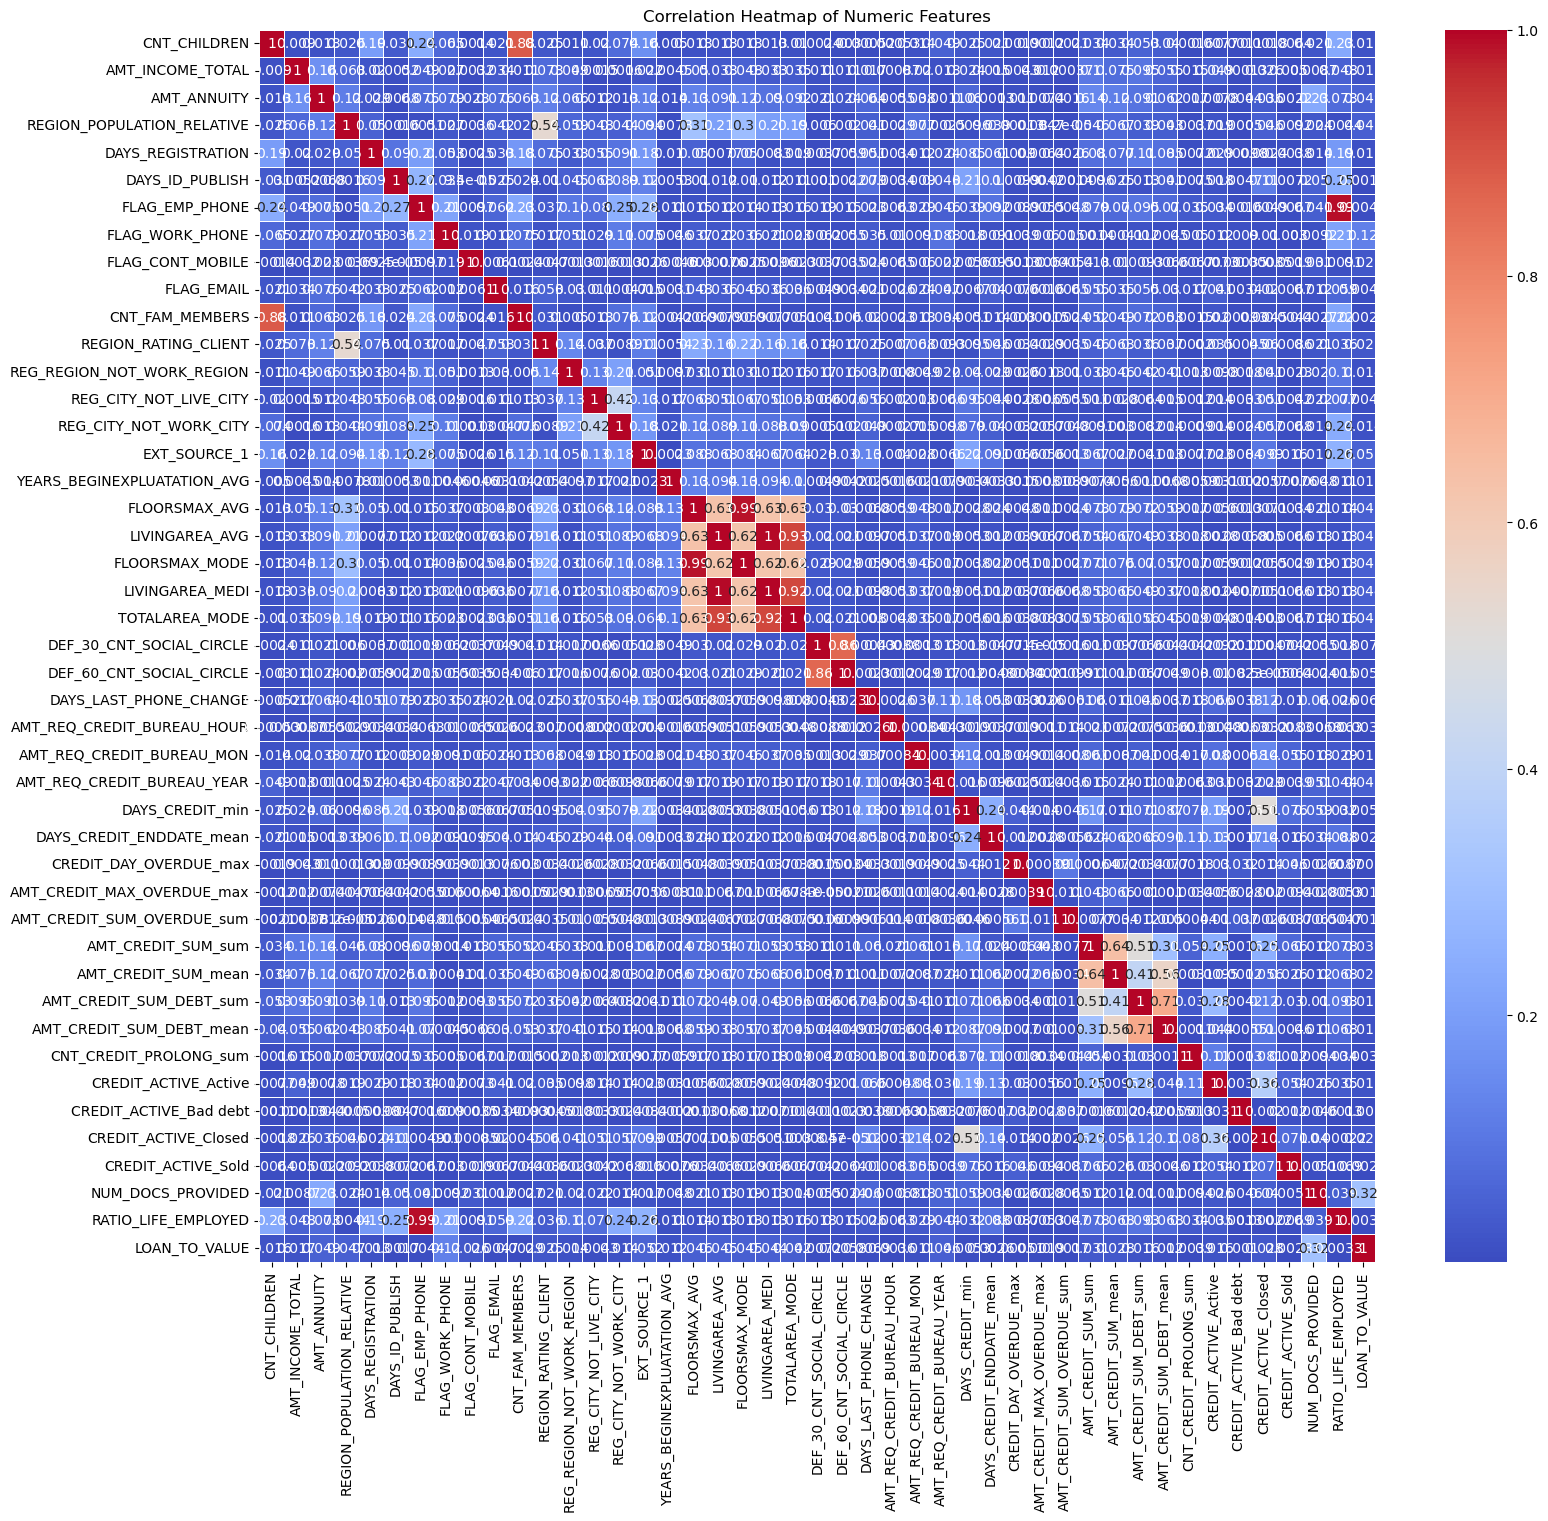

In [24]:
# Get numeric columns excluding target
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols.remove("TARGET")

numeric_df = df[numeric_cols]
corr_matrix = numeric_df.corr().abs()

# Set figure size
plt.figure(figsize=(18, 16))

# Create heatmap
sns.heatmap(corr_matrix, 
            annot=True,
            cmap='coolwarm', 
            linewidths=0.5,
            cbar=True)

plt.title("Correlation Heatmap of Numeric Features")
plt.show()

<h3>Deciding Which Variables To Drop : </h3><br>
REG_CITY_NOT_WORK_CITY vs REG_CITY_NOT_LIVE_CITY <br>
Both reflect potential instability in the client's residence or work life. Slighlty overlapping but not the same. <br><br>

FLOORSMAX_AVG vs LIVINGAREA_AVG <br>
Keep both — they capture different aspects of the property<br><br>

AMT_GOODS_PRICE vs AMT_ANNUITY <br>
Even though highly correlated, One is the size of the loan. The other is payment burden<br><br>

Verdict - We will not drop any of the 4 numerical data with higher than average correlation. 

In [25]:
df.to_csv('after_prep.csv', index=False)

<h1> Grouping And Screening

<h3> Fine Classing

In [26]:
df = pd.read_csv('after_prep.csv')
df_orig = df.copy() 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207300 entries, 0 to 207299
Data columns (total 55 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   TARGET                       207300 non-null  int64  
 1   NAME_CONTRACT_TYPE           207300 non-null  object 
 2   FLAG_OWN_CAR                 207300 non-null  object 
 3   FLAG_OWN_REALTY              207300 non-null  object 
 4   CNT_CHILDREN                 207300 non-null  int64  
 5   AMT_INCOME_TOTAL             207300 non-null  float64
 6   AMT_ANNUITY                  207297 non-null  float64
 7   NAME_INCOME_TYPE             207300 non-null  object 
 8   NAME_EDUCATION_TYPE          207300 non-null  object 
 9   NAME_FAMILY_STATUS           207300 non-null  object 
 10  NAME_HOUSING_TYPE            207300 non-null  object 
 11  REGION_POPULATION_RELATIVE   207300 non-null  float64
 12  DAYS_REGISTRATION            207300 non-null  float64
 13 

In [27]:
#convert to categorical
cols_to_object = [
    'NAME_CONTRACT_TYPE',
    'FLAG_OWN_CAR',
    'FLAG_OWN_REALTY',
    'NAME_INCOME_TYPE',
    'NAME_EDUCATION_TYPE',
    'NAME_FAMILY_STATUS',
    'NAME_HOUSING_TYPE',
    'OCCUPATION_TYPE',
    'ORGANIZATION_TYPE',
    'FLAG_EMP_PHONE',         # binary (0/1)
    'FLAG_WORK_PHONE',        # binary
    'FLAG_CONT_MOBILE',       # binary
    'FLAG_EMAIL',             # binary
    'REG_REGION_NOT_WORK_REGION',  # binary
    'REG_CITY_NOT_LIVE_CITY',      # binary
    'REG_CITY_NOT_WORK_CITY',      # binary
]
for col in cols_to_object:
    if col in df.columns:
        df[col] = df[col].astype(str).astype('object')

for col in df.columns:
    if col not in cols_to_object:
        df[col] = pd.to_numeric(df[col], errors='coerce')


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207300 entries, 0 to 207299
Data columns (total 55 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   TARGET                       207300 non-null  int64  
 1   NAME_CONTRACT_TYPE           207300 non-null  object 
 2   FLAG_OWN_CAR                 207300 non-null  object 
 3   FLAG_OWN_REALTY              207300 non-null  object 
 4   CNT_CHILDREN                 207300 non-null  int64  
 5   AMT_INCOME_TOTAL             207300 non-null  float64
 6   AMT_ANNUITY                  207297 non-null  float64
 7   NAME_INCOME_TYPE             207300 non-null  object 
 8   NAME_EDUCATION_TYPE          207300 non-null  object 
 9   NAME_FAMILY_STATUS           207300 non-null  object 
 10  NAME_HOUSING_TYPE            207300 non-null  object 
 11  REGION_POPULATION_RELATIVE   207300 non-null  float64
 12  DAYS_REGISTRATION            207300 non-null  float64
 13 

In [28]:
def calculate_iv_all(df, target_col='TARGET', bins=20):
    iv_summary = []
    
    # Separate numerical and categorical columns
    numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
    categorical_cols = df.select_dtypes(include='object').columns.tolist()

    # Remove target column from both
    numerical_cols = [col for col in numerical_cols if col != target_col]
    categorical_cols = [col for col in categorical_cols if col != target_col]

    # --- Numerical Features ---
    for col in numerical_cols:
        temp_df = df[[col, target_col]].copy()

        # Bin using qcut and fill missing with 'Missing'
        try:
            temp_df['Bin_Range'] = pd.qcut(temp_df[col], q=bins, duplicates='drop')
        except ValueError:
            print(f"Skipping {col} (not enough unique values to bin)")
            continue

        temp_df['Bin_Range'] = temp_df['Bin_Range'].astype(object).fillna('Missing')

        iv_summary.append({
            'Variable': col,
            'IV': _calculate_iv(temp_df, target_col)
        })

    # --- Categorical Features ---
    for col in categorical_cols:
        temp_df = df[[col, target_col]].copy()
        temp_df['Bin_Range'] = temp_df[col].astype(str).fillna('Missing')
        
        iv_summary.append({
            'Variable': col,
            'IV': _calculate_iv(temp_df, target_col)
        })

    # Return as sorted DataFrame
    iv_df = pd.DataFrame(iv_summary).sort_values(by='IV', ascending=False)
    return iv_df

# --- Helper Function ---
def _calculate_iv(temp_df, target_col):
    grouped = temp_df.groupby('Bin_Range')
    total_events = temp_df[target_col].sum()
    total_non_events = len(temp_df) - total_events

    iv_table = grouped.agg({target_col: ['count', 'sum']}).reset_index()
    iv_table.columns = ['Bin_Range', 'Count', 'Events']
    iv_table['Non_Events'] = iv_table['Count'] - iv_table['Events']
    iv_table['%_Events'] = iv_table['Events'] / total_events
    iv_table['%_Non_Events'] = iv_table['Non_Events'] / total_non_events

    # Avoid division by 0
    iv_table['WOE'] = np.log((iv_table['%_Non_Events'] + 1e-6) / (iv_table['%_Events'] + 1e-6))
    iv_table['IV'] = (iv_table['%_Non_Events'] - iv_table['%_Events']) * iv_table['WOE']

    return iv_table['IV'].sum()

In [29]:
train, test = sc.split_df(df, y = 'TARGET', ratio = .7).values()
print(train.shape)
print(test.shape)

(145110, 55)
(62190, 55)


### lab says only need to use training set to train model and fineclass and coarse hence only trainiv is adjusted then whatever is supposed to be dropped will be dropped on test as well

In [30]:
# iv_df = calculate_iv_all(df, target_col='TARGET', bins=20)
# print(iv_df)

train_iv_df = calculate_iv_all(train, target_col='TARGET', bins=20)
print(train_iv_df)

                       Variable            IV
8                  EXT_SOURCE_1  1.629145e-01
37                LOAN_TO_VALUE  9.461927e-02
36          RATIO_LIFE_EMPLOYED  8.726264e-02
21              DAYS_CREDIT_min  8.425047e-02
22     DAYS_CREDIT_ENDDATE_mean  7.930151e-02
49              OCCUPATION_TYPE  7.625227e-02
53            ORGANIZATION_TYPE  7.500725e-02
17       DAYS_LAST_PHONE_CHANGE  5.208366e-02
29     AMT_CREDIT_SUM_DEBT_mean  5.193154e-02
41             NAME_INCOME_TYPE  5.173677e-02
31         CREDIT_ACTIVE_Active  5.112539e-02
42          NAME_EDUCATION_TYPE  5.037716e-02
28      AMT_CREDIT_SUM_DEBT_sum  4.652146e-02
3    REGION_POPULATION_RELATIVE  4.514693e-02
5               DAYS_ID_PUBLISH  4.342992e-02
10                FLOORSMAX_AVG  4.001797e-02
12               FLOORSMAX_MODE  3.934750e-02
14               TOTALAREA_MODE  3.812600e-02
11               LIVINGAREA_AVG  3.669374e-02
13              LIVINGAREA_MEDI  3.654049e-02
33         CREDIT_ACTIVE_Closed  3

<h3> Characteristic Screening

In [31]:
important_vars = [
    'EXT_SOURCE_1',                   # 0.156003
    'LOAN_TO_VALUE',                  # 0.091847
    'RATIO_LIFE_EMPLOYED',           # 0.088309
    'OCCUPATION_TYPE',               # 0.080222
    'DAYS_CREDIT_min',               # 0.078569 (most recent credit record)
    'DAYS_CREDIT_ENDDATE_mean',      # 0.075526 (avg number of days until loan end)
    'ORGANIZATION_TYPE',             # 0.068933
    'AMT_CREDIT_SUM_DEBT_mean',      # 0.054111 (avg debt per credit)
    'CREDIT_ACTIVE_Active',          # 0.053558 (count of active credits)
    'NAME_INCOME_TYPE',              # 0.050930
    'DAYS_LAST_PHONE_CHANGE',        # 0.048573
    'NAME_EDUCATION_TYPE',           # 0.048123
    'AMT_CREDIT_SUM_DEBT_sum',       # 0.047867 (total debt from bureau)
    'REGION_POPULATION_RELATIVE',    # 0.040241
    'FLOORSMAX_AVG',                 # 0.039137
    'DAYS_ID_PUBLISH',               # 0.037855
    'TARGET'                         # target label for supervised learning
]

# df.drop(columns=[col for col in df.columns if col not in important_vars], inplace=True)
# df.info()

train.drop(columns=[col for col in df.columns if col not in important_vars], inplace=True)
print(train.info())
test.drop(columns=[col for col in df.columns if col not in important_vars], inplace=True)
print(test.info())

<class 'pandas.core.frame.DataFrame'>
Index: 145110 entries, 0 to 207299
Data columns (total 17 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   TARGET                      145110 non-null  int64  
 1   NAME_INCOME_TYPE            145110 non-null  object 
 2   NAME_EDUCATION_TYPE         145110 non-null  object 
 3   REGION_POPULATION_RELATIVE  145110 non-null  float64
 4   DAYS_ID_PUBLISH             145110 non-null  int64  
 5   OCCUPATION_TYPE             145110 non-null  object 
 6   ORGANIZATION_TYPE           145110 non-null  object 
 7   EXT_SOURCE_1                62444 non-null   float64
 8   FLOORSMAX_AVG               73800 non-null   float64
 9   DAYS_LAST_PHONE_CHANGE      145110 non-null  float64
 10  DAYS_CREDIT_min             123772 non-null  float64
 11  DAYS_CREDIT_ENDDATE_mean    122768 non-null  float64
 12  AMT_CREDIT_SUM_DEBT_sum     123772 non-null  float64
 13  AMT_CREDIT_SUM_DEBT

### Train and test data after fine classed

In [32]:
train.to_csv("after_fine_classing_train.csv", index=False)
test.to_csv("after_fine_classing_test.csv", index=False)

<h3>Functions for Coarse Classing (Manual Binning)

In [33]:
def woe_iv(data, variable_name):
    working_data = data.copy()
    working_data['Bin_Range'] = working_data['Bin_Range'].astype(str).fillna('Missing')

    variable_data = pd.DataFrame()
    variable_data['Bin_Range'] = working_data.groupby('Bin_Range', as_index=False).count()['Bin_Range']
    variable_data['Count'] = working_data.groupby('Bin_Range')['TARGET'].count().values
    variable_data['Events'] = working_data.groupby('Bin_Range')['TARGET'].sum().values
    variable_data['Non_Events'] = variable_data['Count'] - variable_data['Events']

    variable_data['%_of_Events'] = variable_data['Events'] / sum(variable_data['Events'])
    variable_data['%_of_Non_Events'] = variable_data['Non_Events'] / sum(variable_data['Non_Events'])

    variable_data['WOE'] = np.log((variable_data['%_of_Non_Events'] + 1e-6) / (variable_data['%_of_Events'] + 1e-6))
    variable_data['IV'] = (variable_data['%_of_Non_Events'] - variable_data['%_of_Events']) * variable_data['WOE']

    IV = variable_data['IV'].sum()
    return IV, variable_data

In [34]:
def woe_iv_plot(data, variable_name):
    IV, variable_data = woe_iv(data, variable_name)
    print(f"IV for {variable_name} with {variable_data.shape[0]} bins: {round(IV, 4)}")

    fig_width = max(20, len(variable_data['Bin_Range']) * 0.6)
    fig, ax1 = plt.subplots(figsize=(fig_width, 6))
    variable_data = variable_data.copy()
    variable_data['Bin_Range'] = variable_data['Bin_Range'].astype(str)

    # Plot WOE line
    sns.lineplot(data=variable_data, x='Bin_Range', y='WOE', marker='o', ax=ax1, label='WOE', color='black')
    for i, row in variable_data.iterrows():
        ax1.text(i, row['WOE'], f"{row['WOE']:.2f}", ha='center', va='bottom', fontsize=10, color='black')
    ax1.set_ylabel("WOE", fontsize=12)
    ax1.tick_params(axis='x', rotation=45)

    # Plot stacked bar for good and bad percentages
    ax2 = ax1.twinx()
    width = 0.5
    r = np.arange(len(variable_data))
    ax2.bar(r, variable_data['%_of_Events'], width=width, label='% Good', color='green', alpha=0.3)
    ax2.bar(r, variable_data['%_of_Non_Events'], width=width, bottom=variable_data['%_of_Events'], label='% Bad', color='red', alpha=0.6)
    ax2.set_ylabel("Proportion of Records", fontsize=12)
    ax2.set_xticks(r)
    ax2.set_xticklabels(variable_data['Bin_Range'], rotation=45)

    ax2.legend(loc='upper right')
    plt.title(f"WOE Plot for {variable_name}")
    plt.tight_layout()
    plt.show()

In [35]:
def plot_numeric_woe(df, variable, bins):
    df[variable] = pd.to_numeric(df[variable], errors='coerce')
    woe_bin_data = df[[variable, "TARGET"]].copy()
    woe_bin_data['Bin_Range'] = pd.qcut(woe_bin_data[variable], q=bins, duplicates='drop')
    woe_bin_data['Bin_Range'] = woe_bin_data['Bin_Range'].astype(str).fillna('Missing')
    woe_iv_plot(woe_bin_data, variable)
    
def plot_numeric_woe_manual(df, variable, bin_edges):
    df = df[[variable, 'TARGET']].copy()
    df[variable] = pd.to_numeric(df[variable], errors='coerce')
    df['Bin_Range'] = pd.cut(df[variable], bins=bin_edges, include_lowest=True)
    df['Bin_Range'] = df['Bin_Range'].astype(str).fillna('Missing')

    IV, variable_data = woe_iv(df, variable)
    variable_data = variable_data.sort_values(by='WOE').reset_index(drop=True)

    print(f"\nIV for {variable} with {variable_data.shape[0]} bins: {round(IV, 4)}")
    print("WOE values per Bin_Range:")
    for _, row in variable_data.iterrows():
        print(f"  {row['Bin_Range']}: WOE = {row['WOE']:.6f}")
    
    woe_iv_plot(df, variable)

In [36]:
def woe_iv_plot_categorical(df, variable_name, target_name='TARGET'):
    """
    Plots WOE values for a categorical variable, with % good and bad bars stacked.
    Also displays IV on the plot.
    """
    working_data = df[[variable_name, target_name]].copy()
    working_data[variable_name] = working_data[variable_name].fillna('Missing')
    working_data['Bin_Range'] = working_data[variable_name].astype(str)

    IV, variable_data = woe_iv(working_data, variable_name)
    variable_data = variable_data.sort_values(by='WOE', ascending=True).reset_index(drop=True)

    fig_width = max(20, len(variable_data['Bin_Range']) * 0.6)
    fig, ax1 = plt.subplots(figsize=(fig_width, 6))

    r = range(len(variable_data))
    width = 0.5
    ax2 = ax1.twinx()
    ax2.bar(r, variable_data['%_of_Events'], width=width, label='% Good', color='green', alpha=0.3)
    ax2.bar(r, variable_data['%_of_Non_Events'], bottom=variable_data['%_of_Events'],
            width=width, label='% Bad', color='red', alpha=0.3)
    ax2.set_ylabel("Event Distribution", fontsize=12)
    ax2.set_xticks(r)
    ax2.set_xticklabels(variable_data['Bin_Range'], rotation=45, ha='right', fontsize=10)
    ax2.tick_params(axis='x', labelsize=10)

    sns.lineplot(x=r, y=variable_data['WOE'], marker='o', ax=ax1, color='black', label='WOE')
    ax1.set_ylabel("WOE", fontsize=12)

    # Display IV in plot title
    plt.title(f"WOE Plot for {variable_name}\nInformation Value (IV) = {IV:.6f}", fontsize=14)
    fig.legend(loc='upper right')
    plt.tight_layout()
    plt.show()
    
def woe_iv_plot_categorical_manual(df, variable_name, cut_indices, target_name='TARGET'):
    """
    Manually groups categories based on cut indices, plots WOE, and prints IV before/after and WOE values per grouped bin.
    """
    working_data = df[[variable_name, target_name]].copy()
    working_data[variable_name] = working_data[variable_name].fillna('Missing')
    working_data['Bin_Range'] = working_data[variable_name].astype(str)

    # Step 1: Original WOE and IV (before binning)
    IV_before, variable_data_before = woe_iv(working_data, variable_name)
    sorted_categories = variable_data_before.sort_values('WOE')['Bin_Range'].tolist()

    # Step 2: Group categories based on cut_indices
    grouped_mapping = {}
    group_labels = []
    raw_group_labels = []  # For printing purposes

    for i in range(len(cut_indices) - 1):
        group = sorted_categories[cut_indices[i]:cut_indices[i + 1]]
        raw_label = ', '.join(group)
        label_wrapped = textwrap.fill(raw_label, width=30)
        group_labels.append(label_wrapped)
        raw_group_labels.append(raw_label)
        for cat in group:
            grouped_mapping[cat] = label_wrapped

    # Step 3: Apply grouped binning
    working_data['Bin_Range'] = working_data['Bin_Range'].map(grouped_mapping).fillna(working_data['Bin_Range'])

    # Step 4: Recalculate WOE and IV (after binning)
    IV_after, variable_data_grouped = woe_iv(working_data, variable_name)
    variable_data_grouped = variable_data_grouped.sort_values(by='WOE').reset_index(drop=True)

    # Step 5: Plot
    fig_width = max(22, len(variable_data_grouped['Bin_Range']) * 0.9)
    fig, ax1 = plt.subplots(figsize=(fig_width, 6))
    r = range(len(variable_data_grouped))
    width = 0.5

    ax2 = ax1.twinx()
    ax2.bar(r, variable_data_grouped['%_of_Events'], width=width, label='% Good', color='green', alpha=0.3)
    ax2.bar(r, variable_data_grouped['%_of_Non_Events'], bottom=variable_data_grouped['%_of_Events'],
            width=width, label='% Bad', color='red', alpha=0.3)
    ax2.set_ylabel("Event Distribution", fontsize=12)
    ax2.set_xticks(r)
    ax2.set_xticklabels(variable_data_grouped['Bin_Range'], rotation=30, ha='right', fontsize=9)

    sns.lineplot(x=r, y=variable_data_grouped['WOE'], marker='o', ax=ax1, color='black', label='WOE')
    for i, row in variable_data_grouped.iterrows():
        ax1.text(i, row['WOE'], f"{row['WOE']:.6f}", ha='center', va='bottom', fontsize=9, color='black')

    ax1.set_ylabel("WOE", fontsize=12)
    plt.title(
        f"WOE Plot (Grouped) for {variable_name}\nIV Before Binning = {IV_before:.6f} | IV After Binning = {IV_after:.6f}",
        fontsize=13
    )
    fig.legend(loc='upper right')
    plt.tight_layout(pad=2)
    plt.show()

    # Step 6: Print summary
    print(f"\nInformation Value (IV) Before Binning: {IV_before:.6f}")
    print(f"Information Value (IV) After Binning:  {IV_after:.6f}")
    print("\nWOE for each grouped bin:")
    for i, row in variable_data_grouped.iterrows():
        print(f"Group {i + 1}:")
        print(f"  Categories: {raw_group_labels[i]}")
        print(f"  WOE: {row['WOE']:.6f}\n")

<h2> Coarse Classing

In [37]:
train_df = pd.read_csv('after_fine_classing_train.csv')
test_df = pd.read_csv('after_fine_classing_test.csv')

df = train_df.copy()
df["TARGET"] = pd.to_numeric(df["TARGET"], errors='coerce')
df.info() # df us training set

df1 = test_df.copy() #df1 is test set
df["TARGET"] = pd.to_numeric(df["TARGET"], errors='coerce')



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145110 entries, 0 to 145109
Data columns (total 17 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   TARGET                      145110 non-null  int64  
 1   NAME_INCOME_TYPE            145110 non-null  object 
 2   NAME_EDUCATION_TYPE         145110 non-null  object 
 3   REGION_POPULATION_RELATIVE  145110 non-null  float64
 4   DAYS_ID_PUBLISH             145110 non-null  int64  
 5   OCCUPATION_TYPE             100272 non-null  object 
 6   ORGANIZATION_TYPE           145110 non-null  object 
 7   EXT_SOURCE_1                62444 non-null   float64
 8   FLOORSMAX_AVG               73800 non-null   float64
 9   DAYS_LAST_PHONE_CHANGE      145110 non-null  float64
 10  DAYS_CREDIT_min             123772 non-null  float64
 11  DAYS_CREDIT_ENDDATE_mean    122768 non-null  float64
 12  AMT_CREDIT_SUM_DEBT_sum     123772 non-null  float64
 13  AMT_CREDIT_SUM

IV for EXT_SOURCE_1 with 21 bins: 0.1629


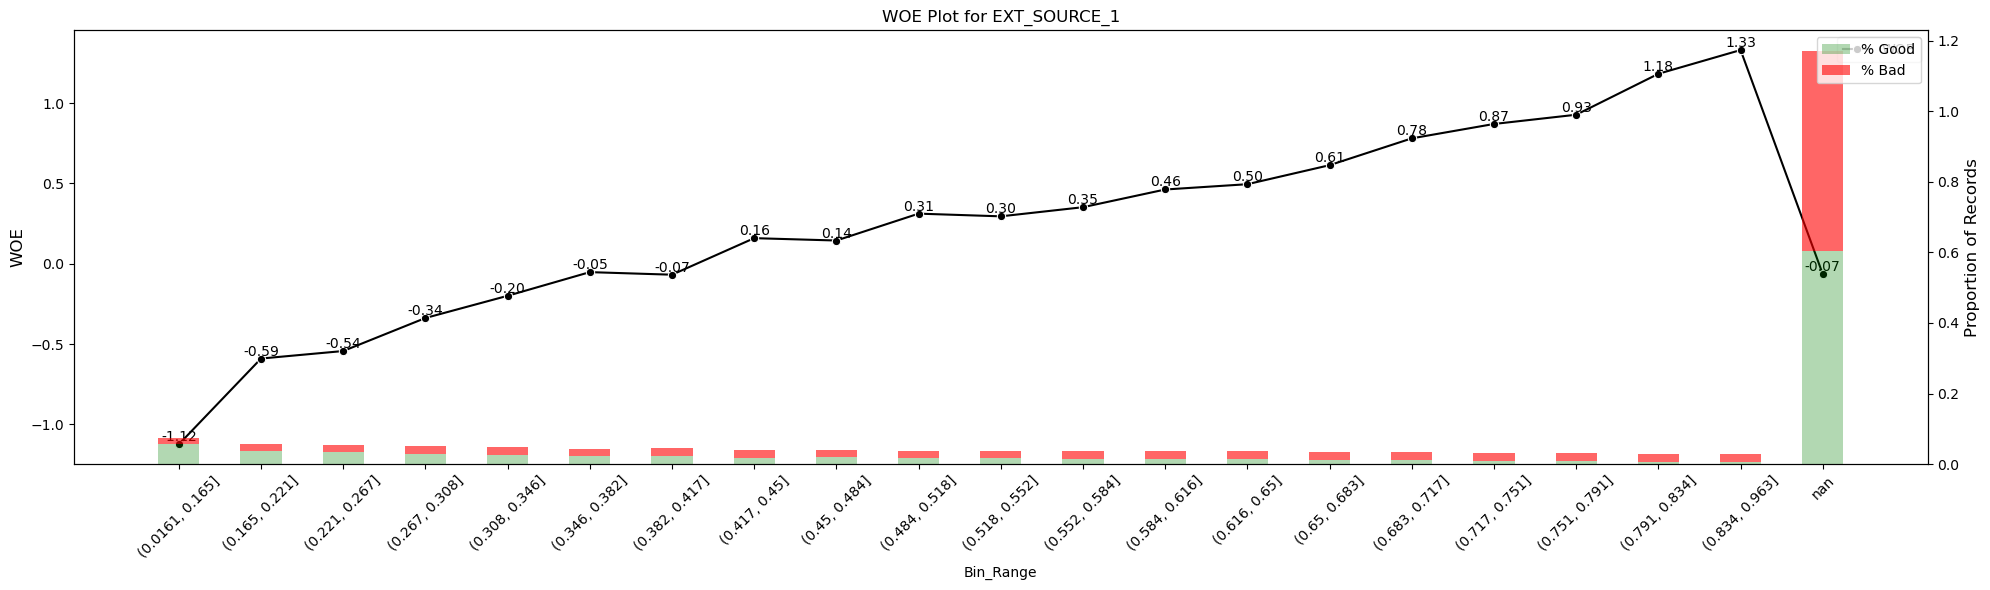


IV for EXT_SOURCE_1 with 6 bins: 0.1529
WOE values per Bin_Range:
  (-0.001, 0.2]: WOE = -0.971003
  (0.2, 0.4]: WOE = -0.292831
  nan: WOE = -0.065028
  (0.4, 0.6]: WOE = 0.231614
  (0.6, 0.8]: WOE = 0.713261
  (0.8, 1.0]: WOE = 1.330819
IV for EXT_SOURCE_1 with 6 bins: 0.1529


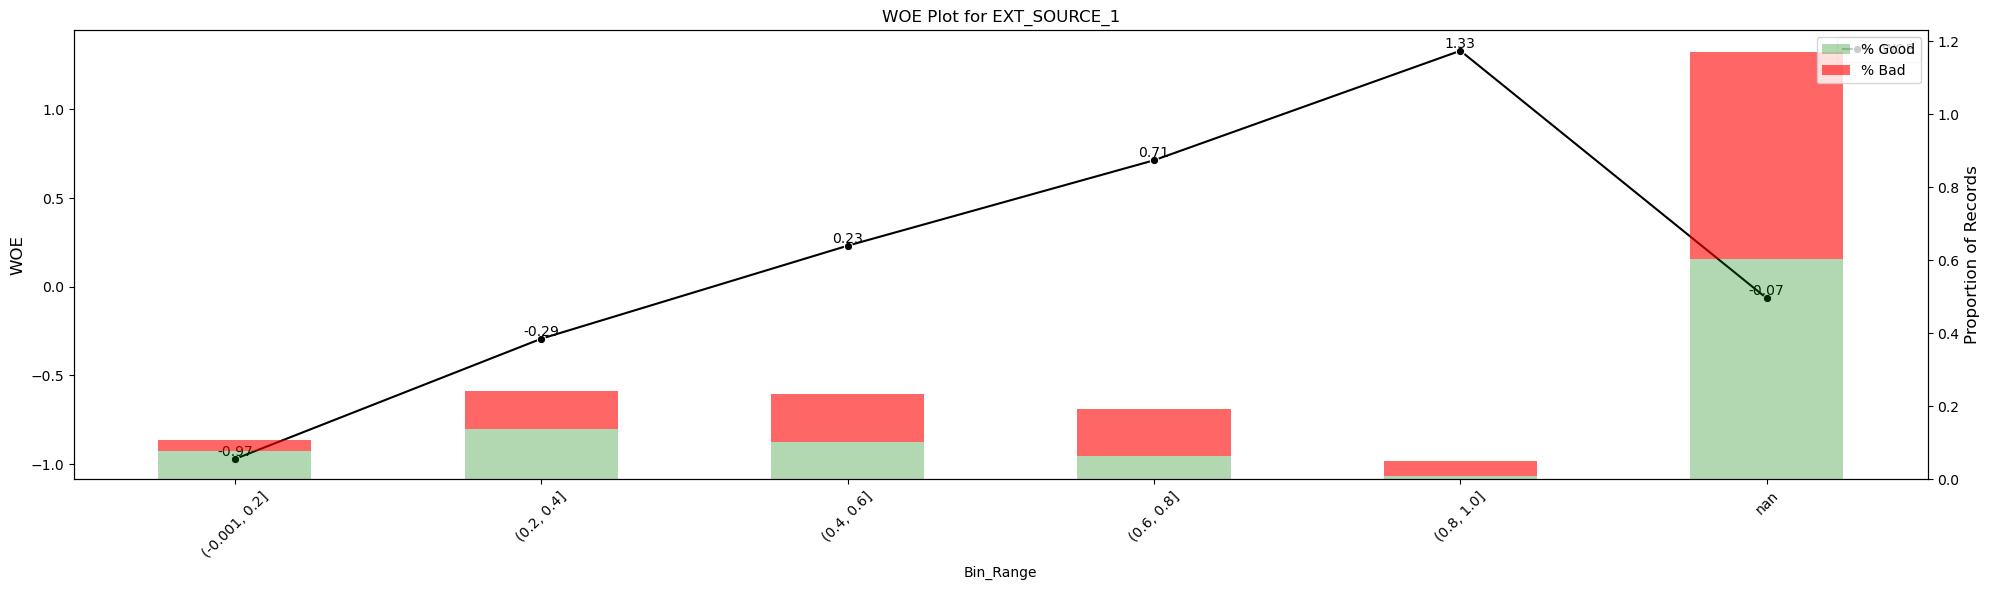

In [38]:

plot_numeric_woe(df, 'EXT_SOURCE_1', 20)
plot_numeric_woe_manual(df, 'EXT_SOURCE_1', [0,0.2, 0.4, 0.6,0.8,1])

IV for LOAN_TO_VALUE with 15 bins: 0.0946


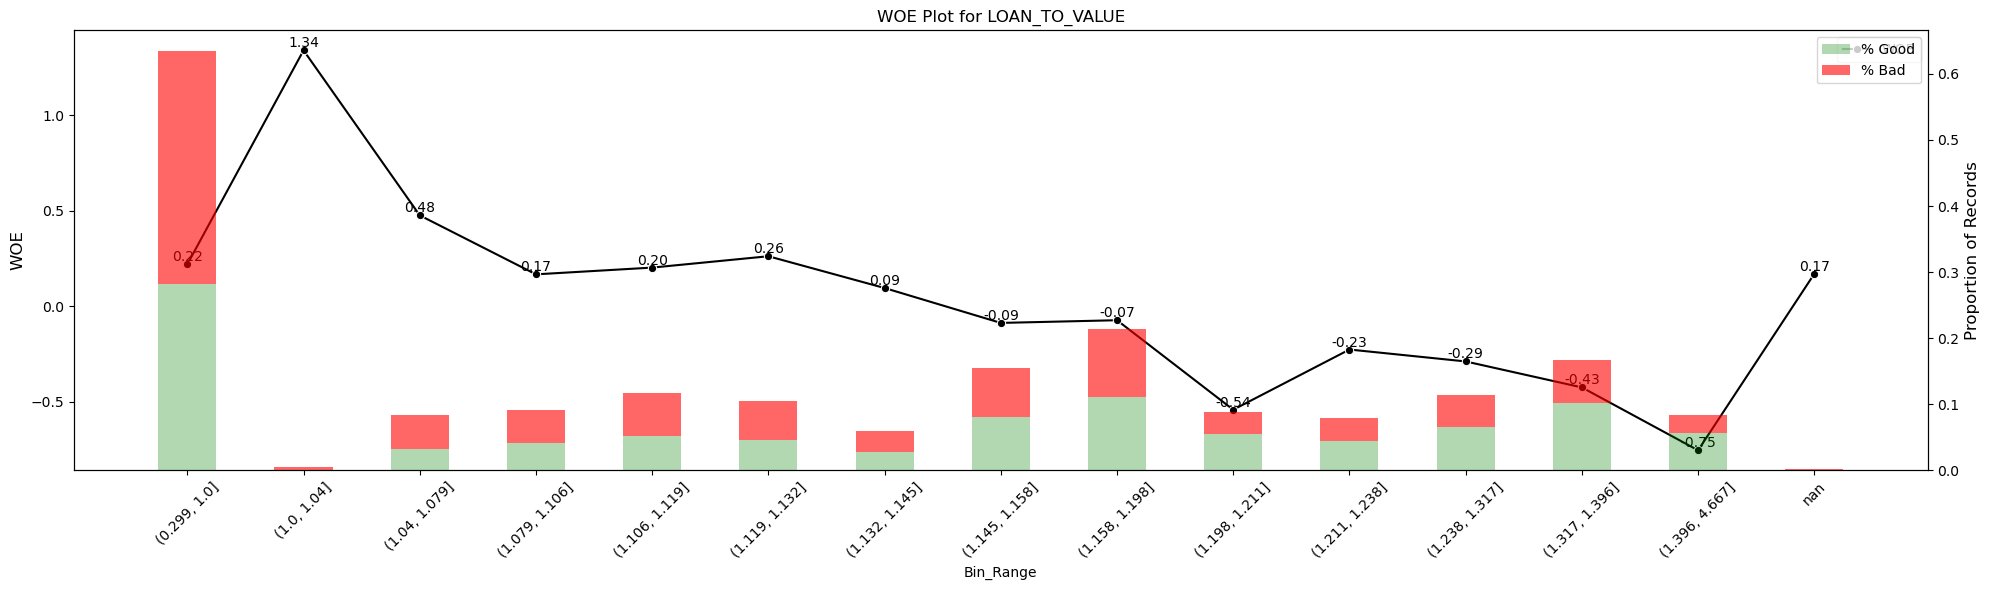


IV for LOAN_TO_VALUE with 3 bins: 0.0223
WOE values per Bin_Range:
  (1.0, 6.0]: WOE = -0.101822
  nan: WOE = 0.169211
  (-0.001, 1.0]: WOE = 0.219101
IV for LOAN_TO_VALUE with 3 bins: 0.0223


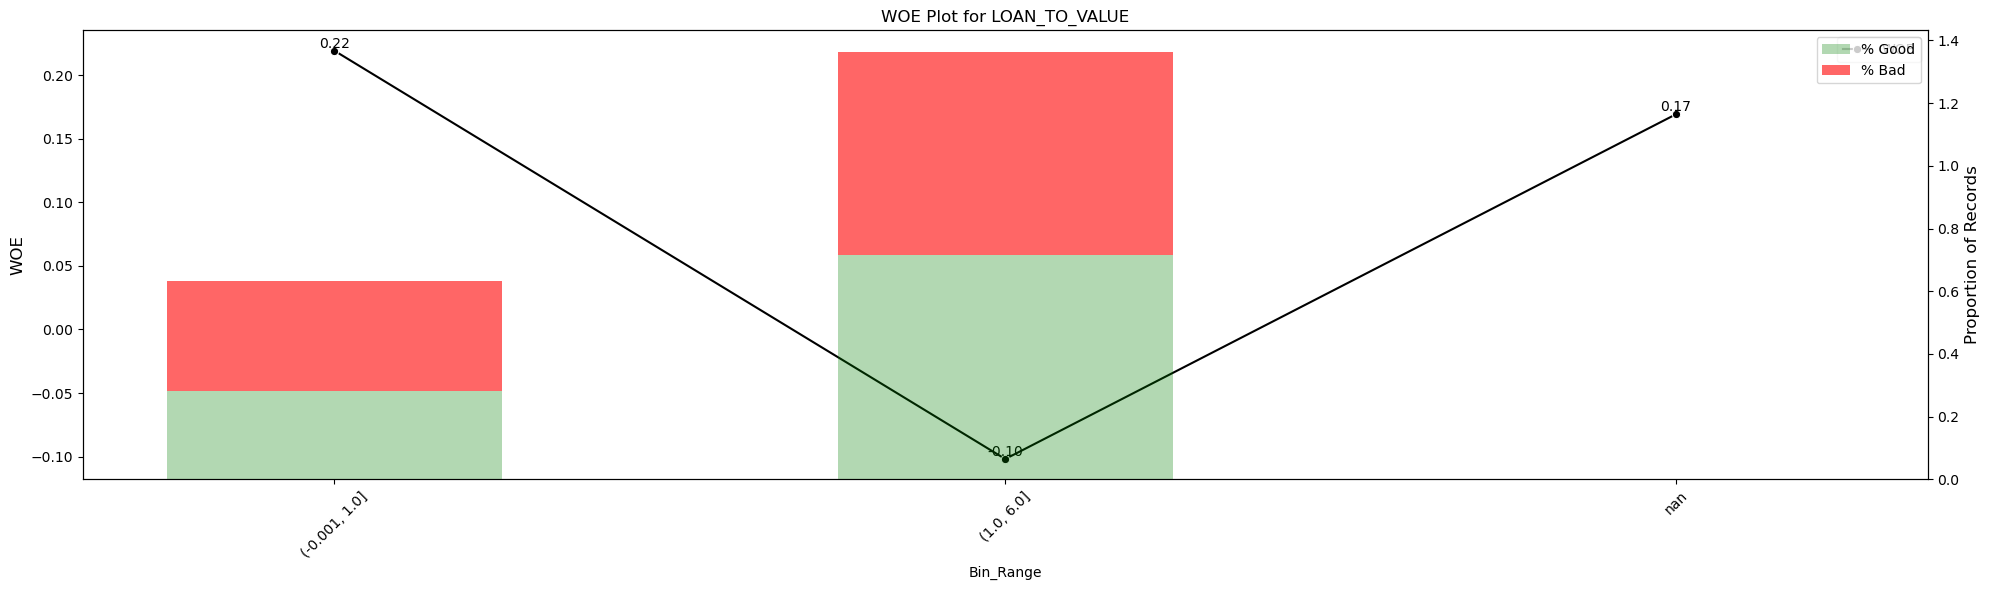

In [39]:
plot_numeric_woe(df, 'LOAN_TO_VALUE', 20)
plot_numeric_woe_manual(df, 'LOAN_TO_VALUE', [0,1,6])

IV for RATIO_LIFE_EMPLOYED with 20 bins: 0.0873


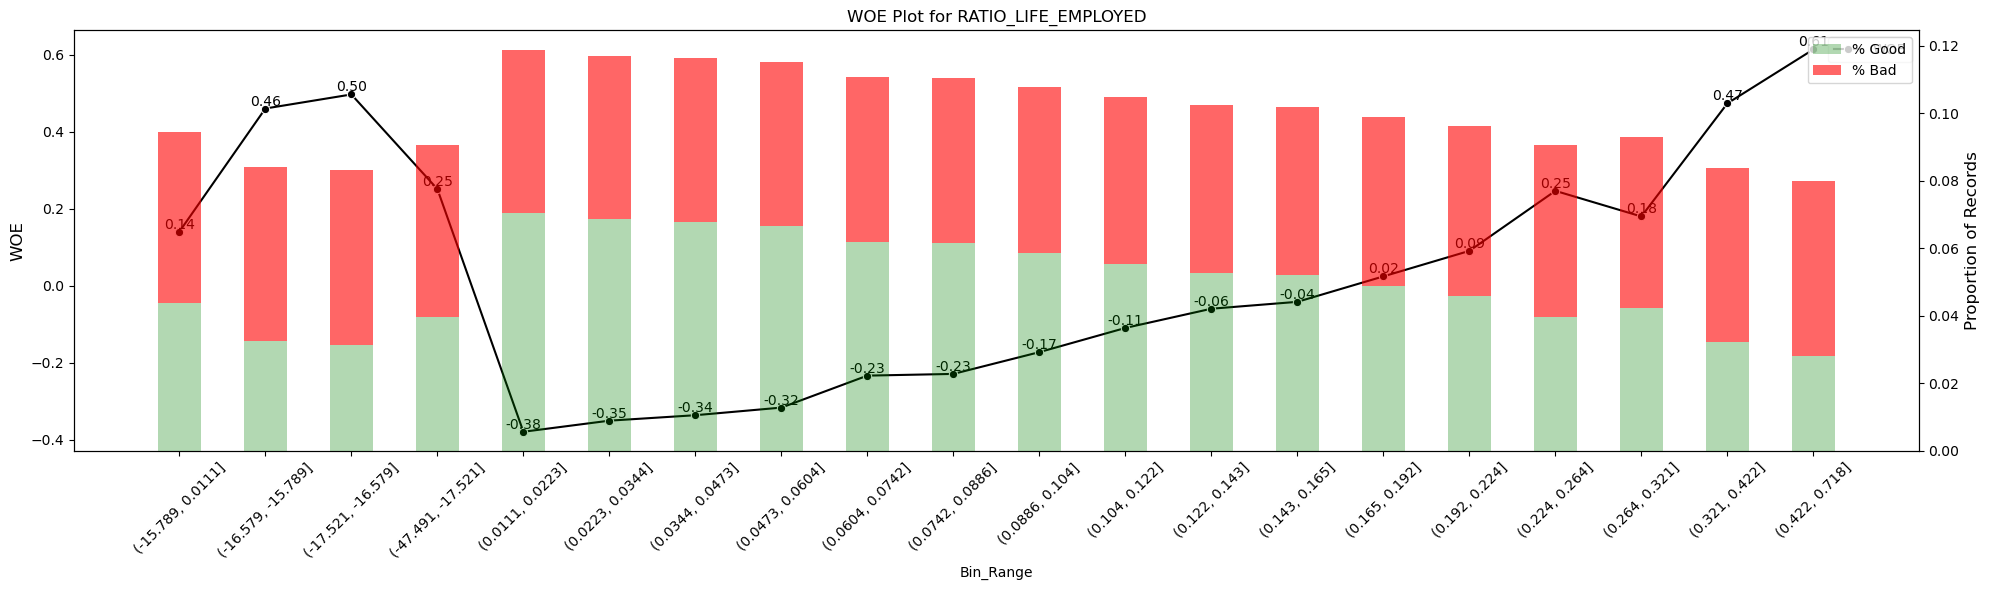


IV for RATIO_LIFE_EMPLOYED with 5 bins: 0.084
WOE values per Bin_Range:
  (0.0, 0.1]: WOE = -0.286514
  (0.1, 0.2]: WOE = -0.046043
  (0.2, 0.3]: WOE = 0.184006
  (-47.001, 0.0]: WOE = 0.401626
  nan: WOE = 0.483352
IV for RATIO_LIFE_EMPLOYED with 5 bins: 0.084


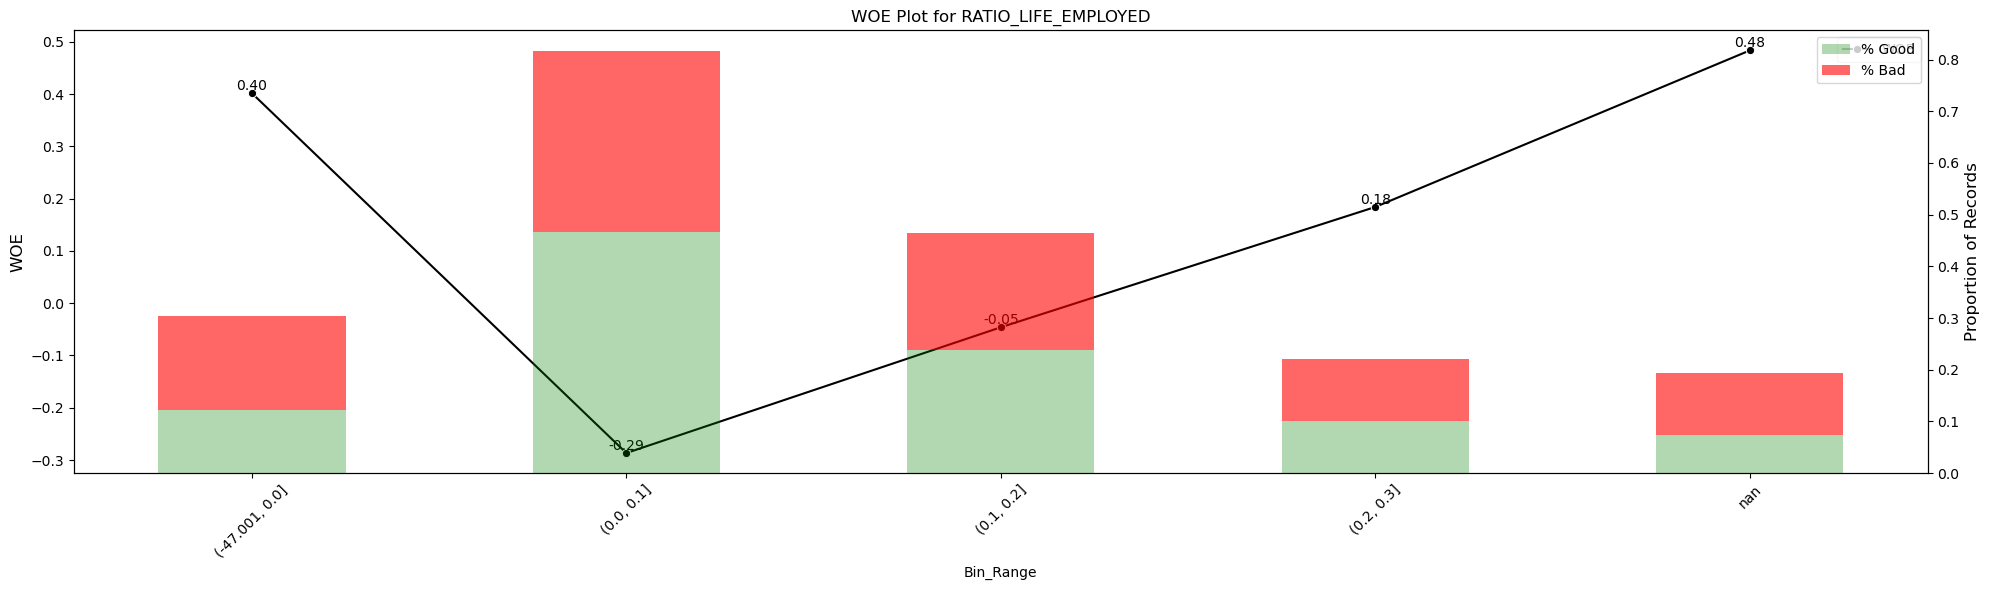

In [40]:
plot_numeric_woe(df, 'RATIO_LIFE_EMPLOYED', 20)
plot_numeric_woe_manual(df, 'RATIO_LIFE_EMPLOYED', [-47,0, 0.1, 0.2 ,0.3])

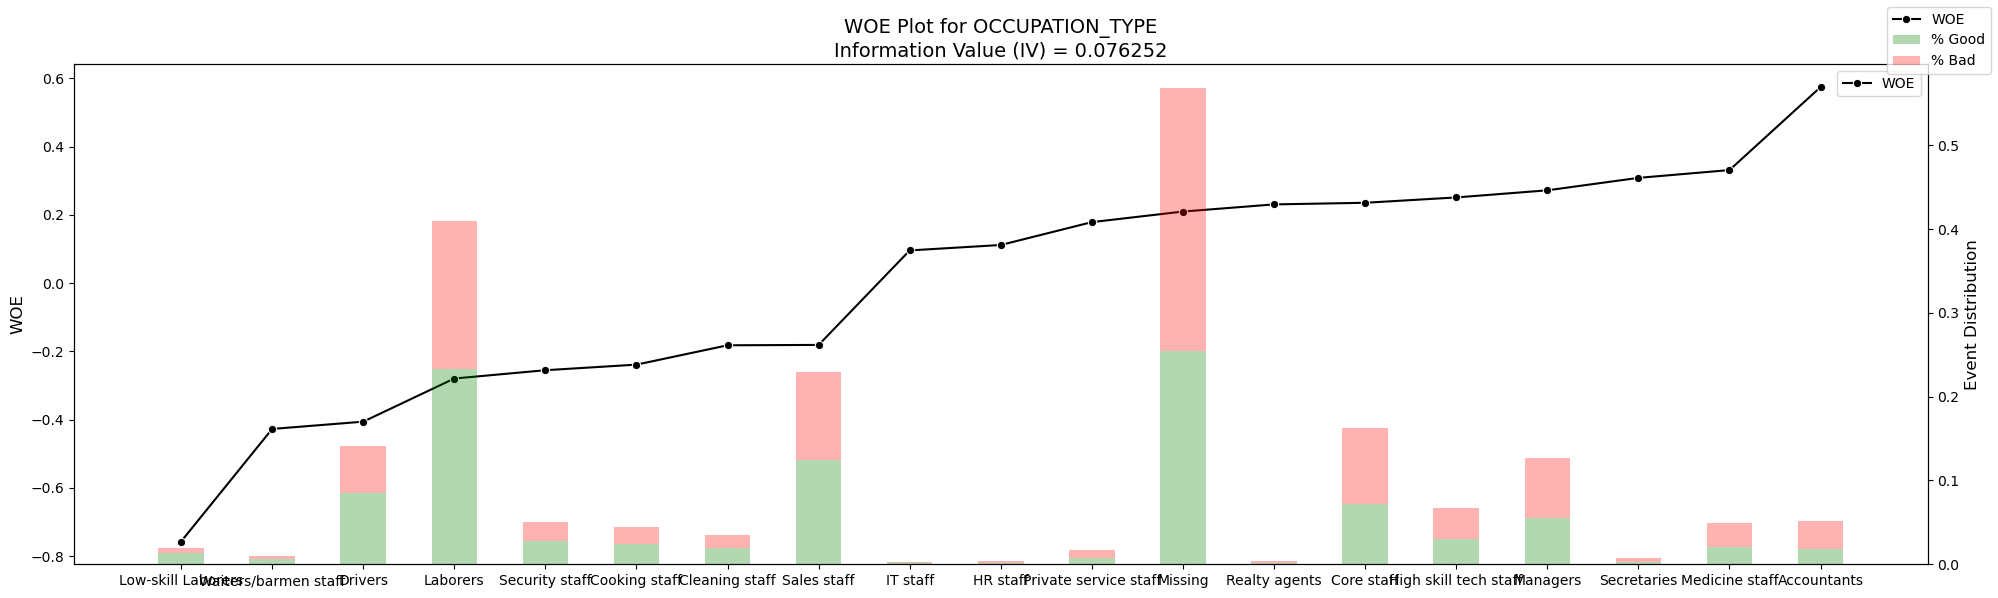

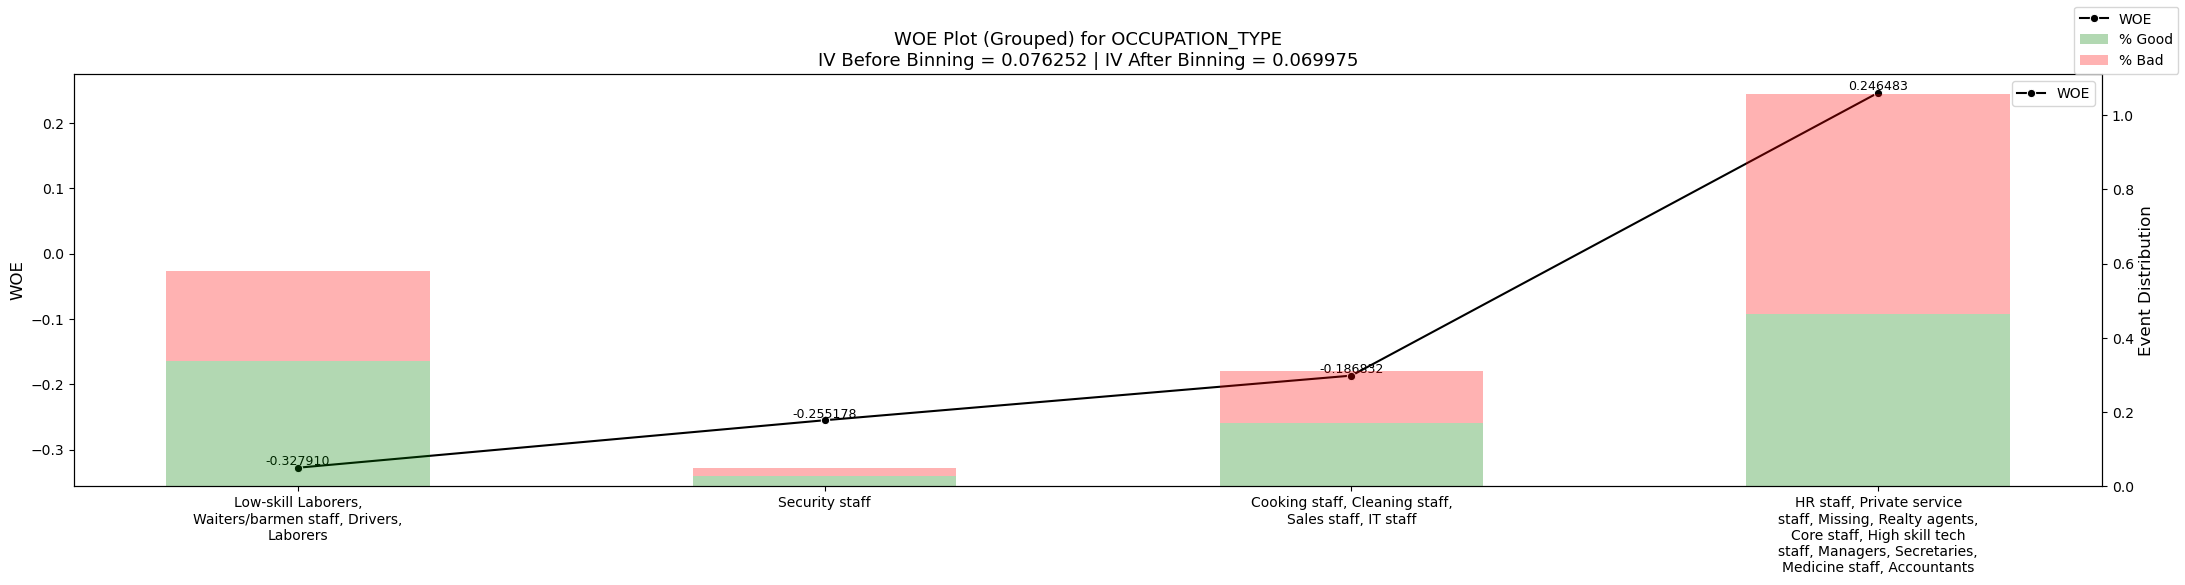


Information Value (IV) Before Binning: 0.076252
Information Value (IV) After Binning:  0.069975

WOE for each grouped bin:
Group 1:
  Categories: Low-skill Laborers, Waiters/barmen staff, Drivers, Laborers
  WOE: -0.327910

Group 2:
  Categories: Security staff
  WOE: -0.255178

Group 3:
  Categories: Cooking staff, Cleaning staff, Sales staff, IT staff
  WOE: -0.186832

Group 4:
  Categories: HR staff, Private service staff, Missing, Realty agents, Core staff, High skill tech staff, Managers, Secretaries, Medicine staff, Accountants
  WOE: 0.246483



In [41]:
woe_iv_plot_categorical(df, "OCCUPATION_TYPE", target_name='TARGET')
woe_iv_plot_categorical_manual(df, "OCCUPATION_TYPE", [0,4,5,9,19], target_name='TARGET')

IV for DAYS_CREDIT_min with 21 bins: 0.0843


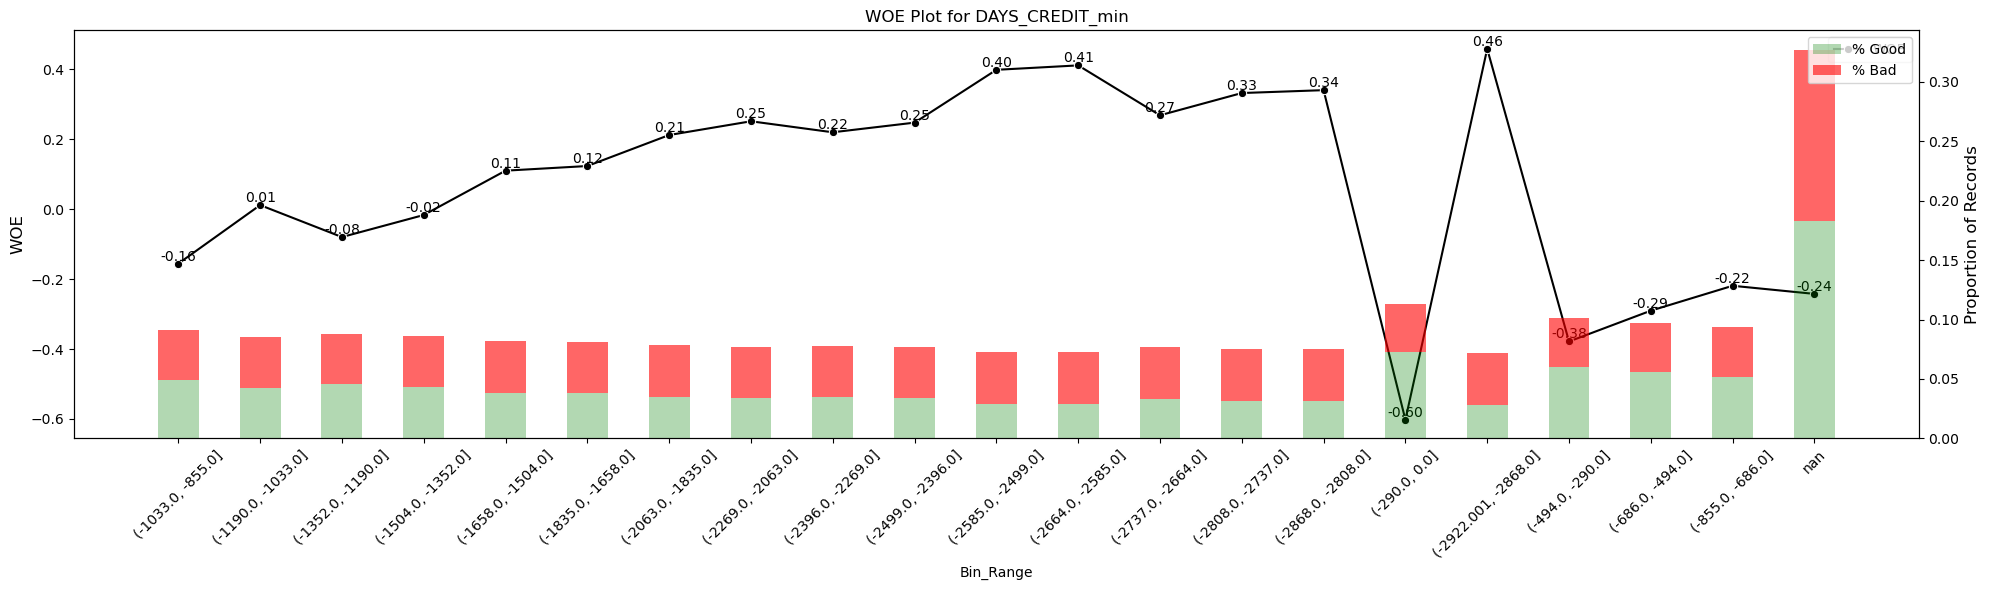


IV for DAYS_CREDIT_min with 5 bins: 0.0682
WOE values per Bin_Range:
  (-1000.0, -200.0]: WOE = -0.299397
  nan: WOE = -0.255686
  (-1500.0, -1000.0]: WOE = -0.039710
  (-2500.0, -1500.0]: WOE = 0.193110
  (-2900.001, -2500.0]: WOE = 0.363737
IV for DAYS_CREDIT_min with 5 bins: 0.0682


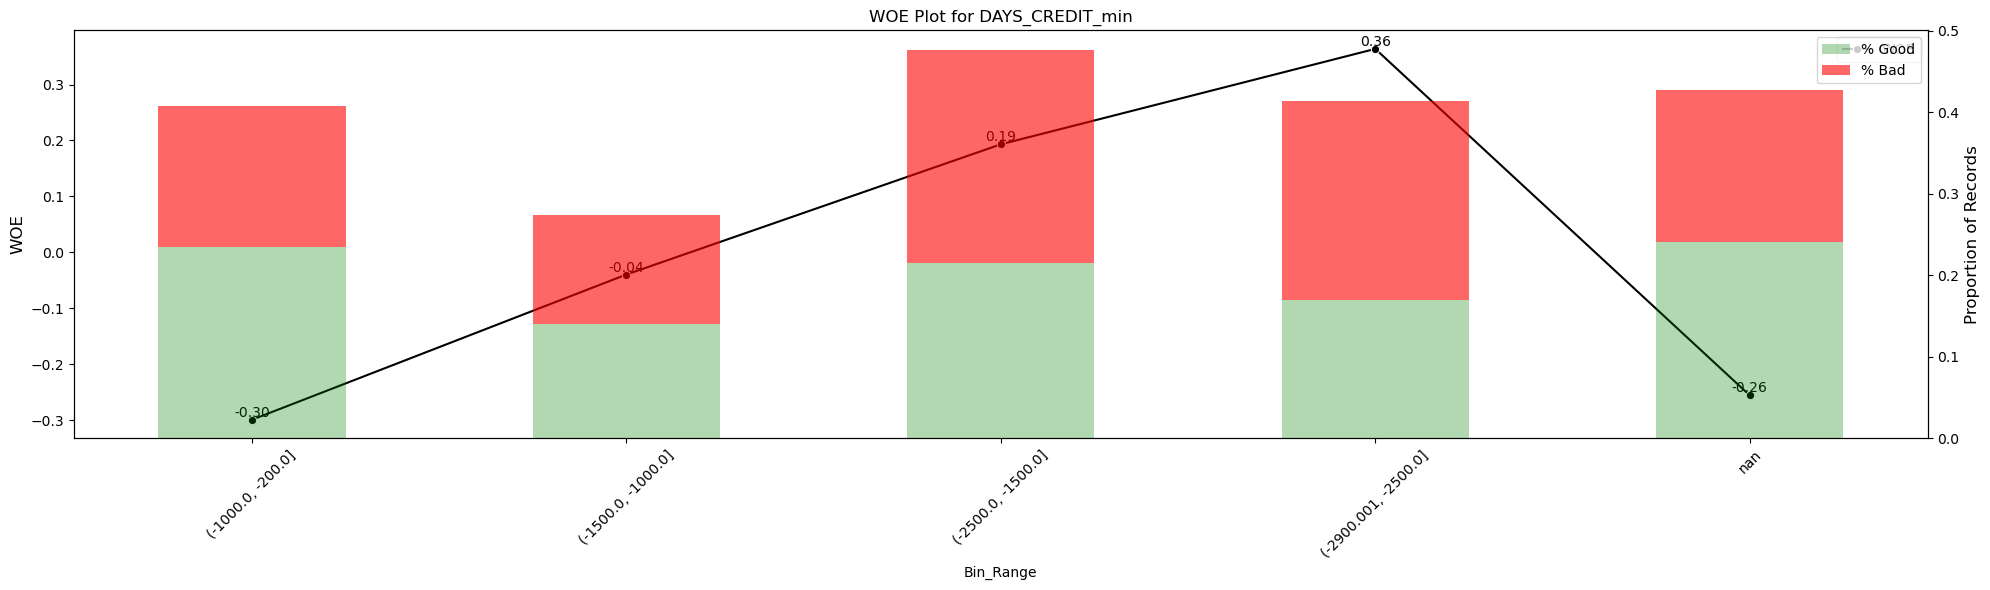

In [42]:
plot_numeric_woe(df, 'DAYS_CREDIT_min', 20)
plot_numeric_woe_manual(df, 'DAYS_CREDIT_min', [-2900,-2500,-1500, -1000, -200])

IV for DAYS_CREDIT_ENDDATE_mean with 21 bins: 0.0793


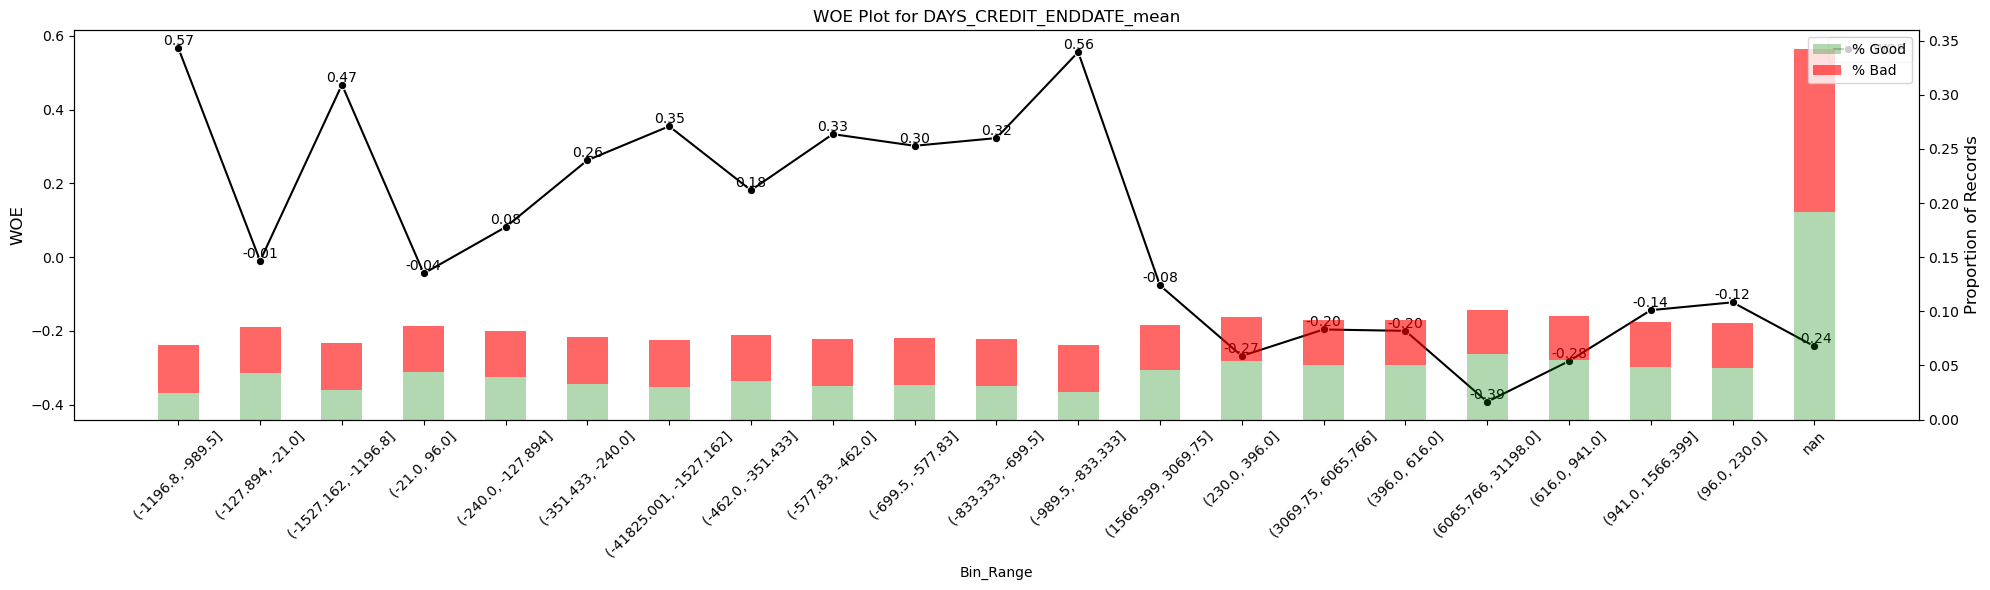


IV for DAYS_CREDIT_ENDDATE_mean with 5 bins: 0.0729
WOE values per Bin_Range:
  nan: WOE = -0.241979
  (200.0, 32000.0]: WOE = -0.225333
  (-200.0, 200.0]: WOE = -0.033907
  (-500.0, -200.0]: WOE = 0.231916
  (-41800.001, -500.0]: WOE = 0.411492
IV for DAYS_CREDIT_ENDDATE_mean with 5 bins: 0.0729


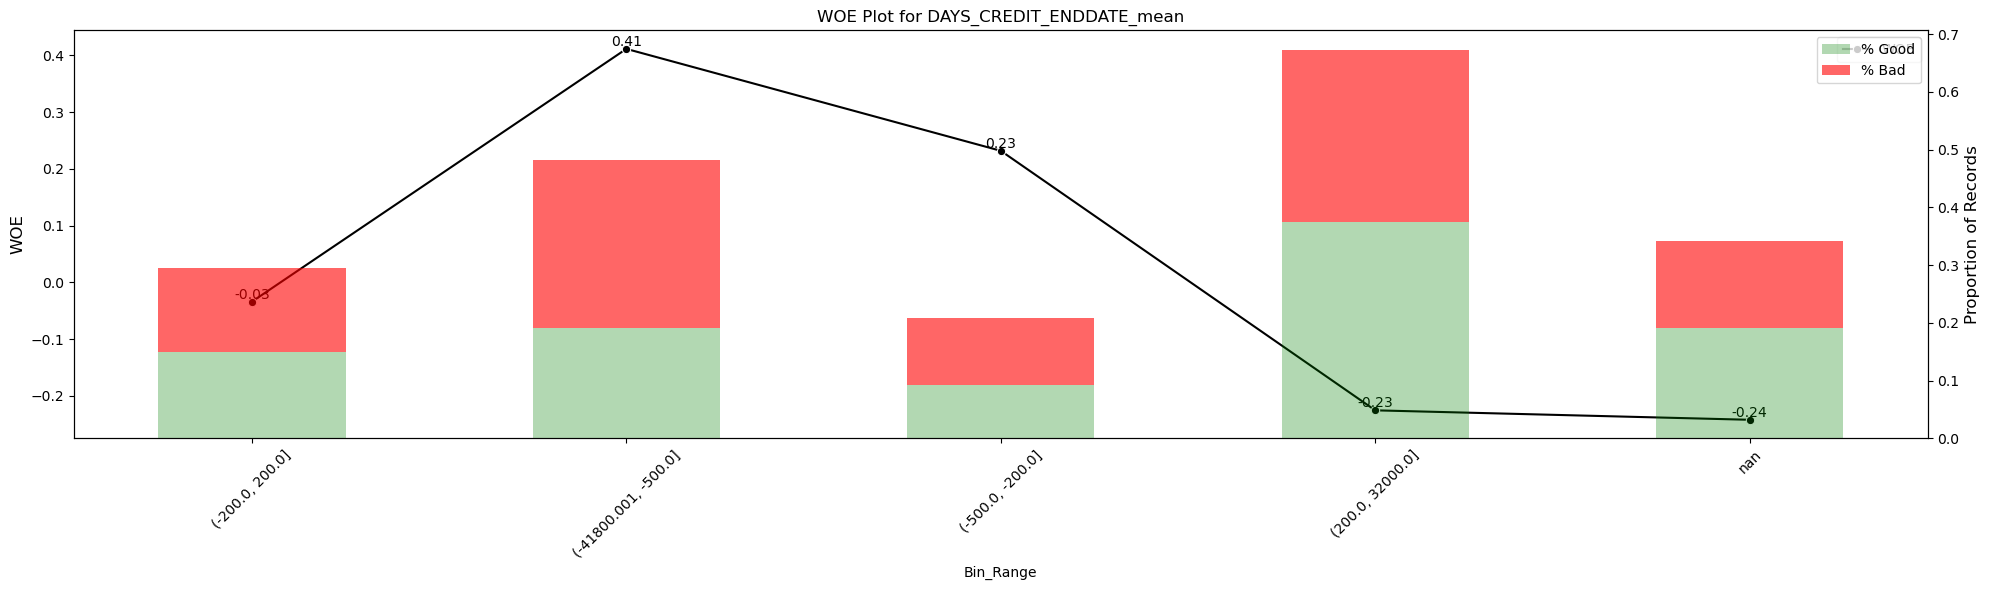

In [43]:
plot_numeric_woe(df, 'DAYS_CREDIT_ENDDATE_mean', 20)
plot_numeric_woe_manual(df, 'DAYS_CREDIT_ENDDATE_mean', [-41800,-500,-200, 200, 32000])

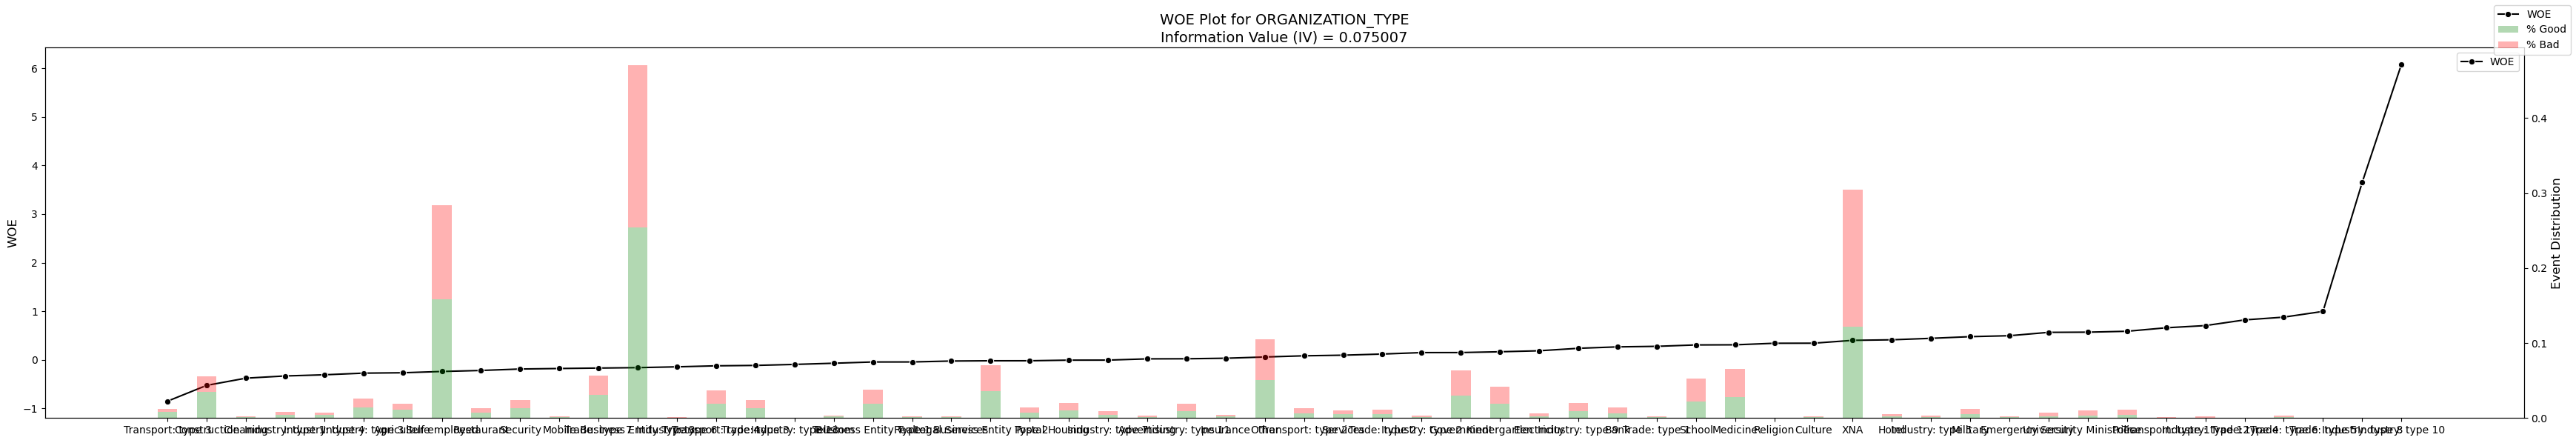

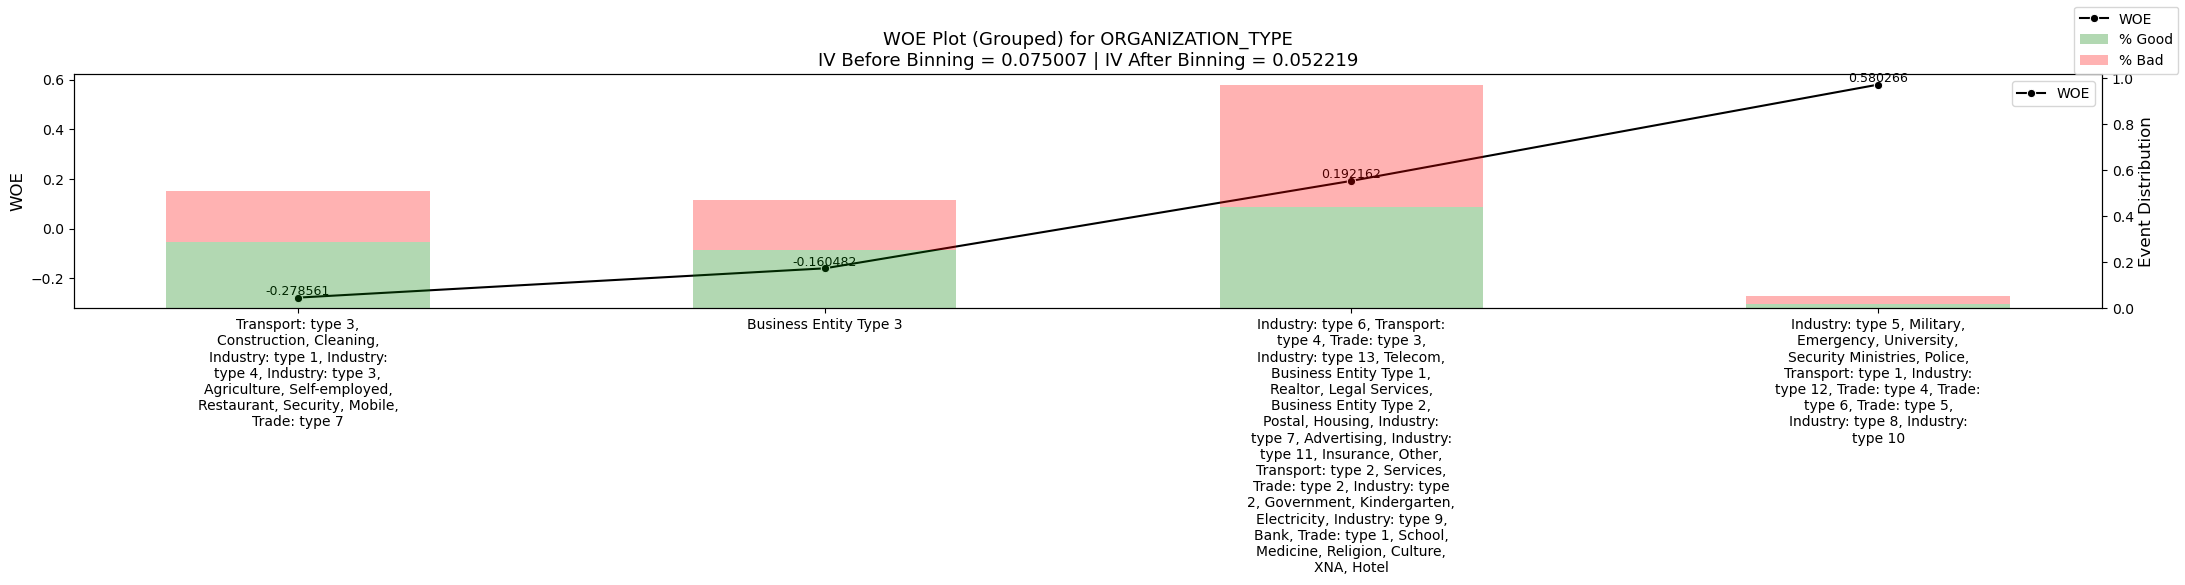


Information Value (IV) Before Binning: 0.075007
Information Value (IV) After Binning:  0.052219

WOE for each grouped bin:
Group 1:
  Categories: Transport: type 3, Construction, Cleaning, Industry: type 1, Industry: type 4, Industry: type 3, Agriculture, Self-employed, Restaurant, Security, Mobile, Trade: type 7
  WOE: -0.278561

Group 2:
  Categories: Business Entity Type 3
  WOE: -0.160482

Group 3:
  Categories: Industry: type 6, Transport: type 4, Trade: type 3, Industry: type 13, Telecom, Business Entity Type 1, Realtor, Legal Services, Business Entity Type 2, Postal, Housing, Industry: type 7, Advertising, Industry: type 11, Insurance, Other, Transport: type 2, Services, Trade: type 2, Industry: type 2, Government, Kindergarten, Electricity, Industry: type 9, Bank, Trade: type 1, School, Medicine, Religion, Culture, XNA, Hotel
  WOE: 0.192162

Group 4:
  Categories: Industry: type 5, Military, Emergency, University, Security Ministries, Police, Transport: type 1, Industry: type

In [44]:
woe_iv_plot_categorical(df, "ORGANIZATION_TYPE", target_name='TARGET')
woe_iv_plot_categorical_manual(df, "ORGANIZATION_TYPE", [0,12,13,45,60], target_name='TARGET')

IV for AMT_CREDIT_SUM_DEBT_mean with 17 bins: 0.0519


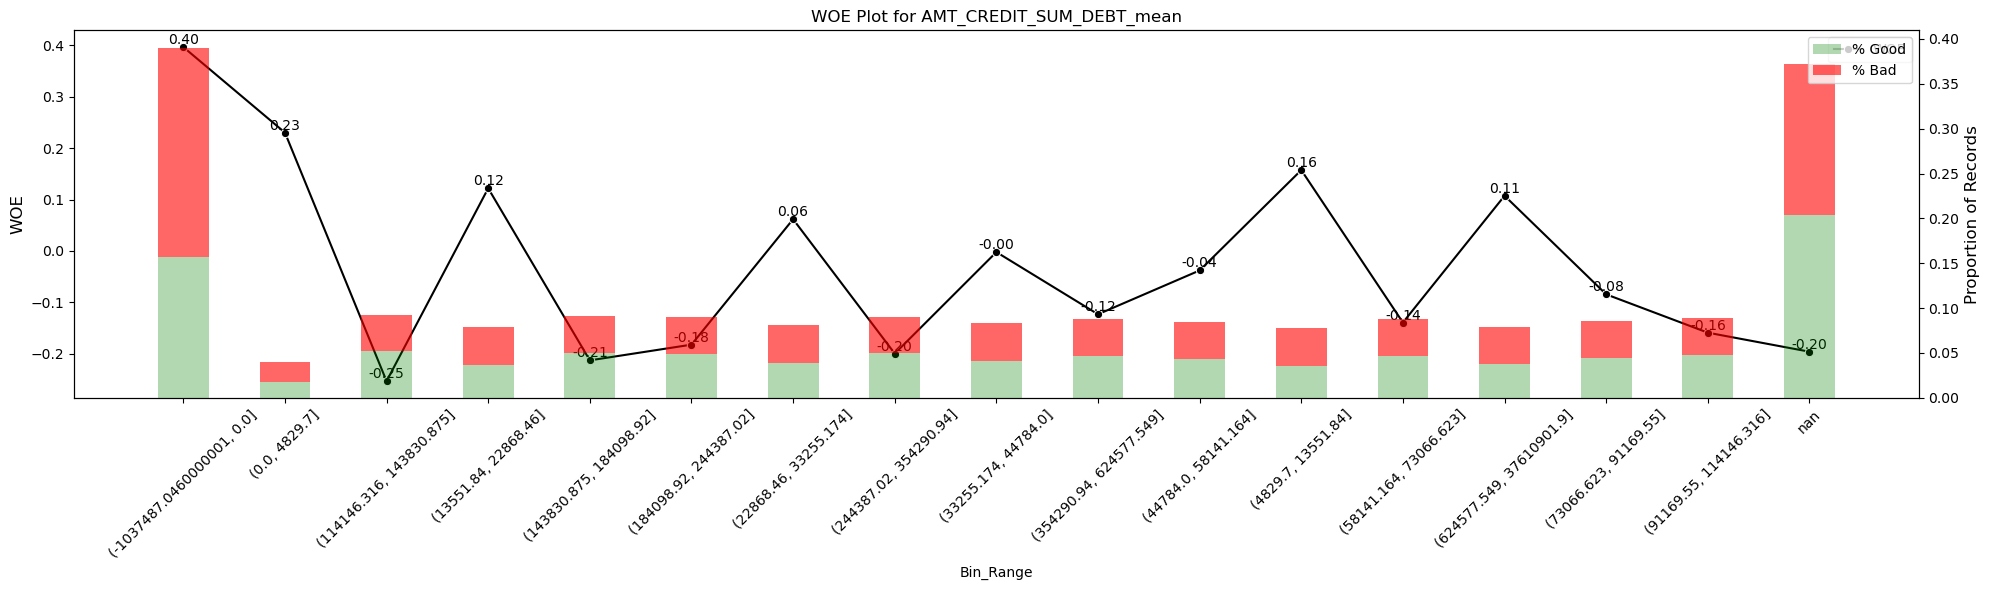


IV for AMT_CREDIT_SUM_DEBT_mean with 3 bins: 0.042
WOE values per Bin_Range:
  nan: WOE = -0.166677
  (2000.0, 120000.0]: WOE = -0.011299
  (-2000000.001, 2000.0]: WOE = 0.384418
IV for AMT_CREDIT_SUM_DEBT_mean with 3 bins: 0.042


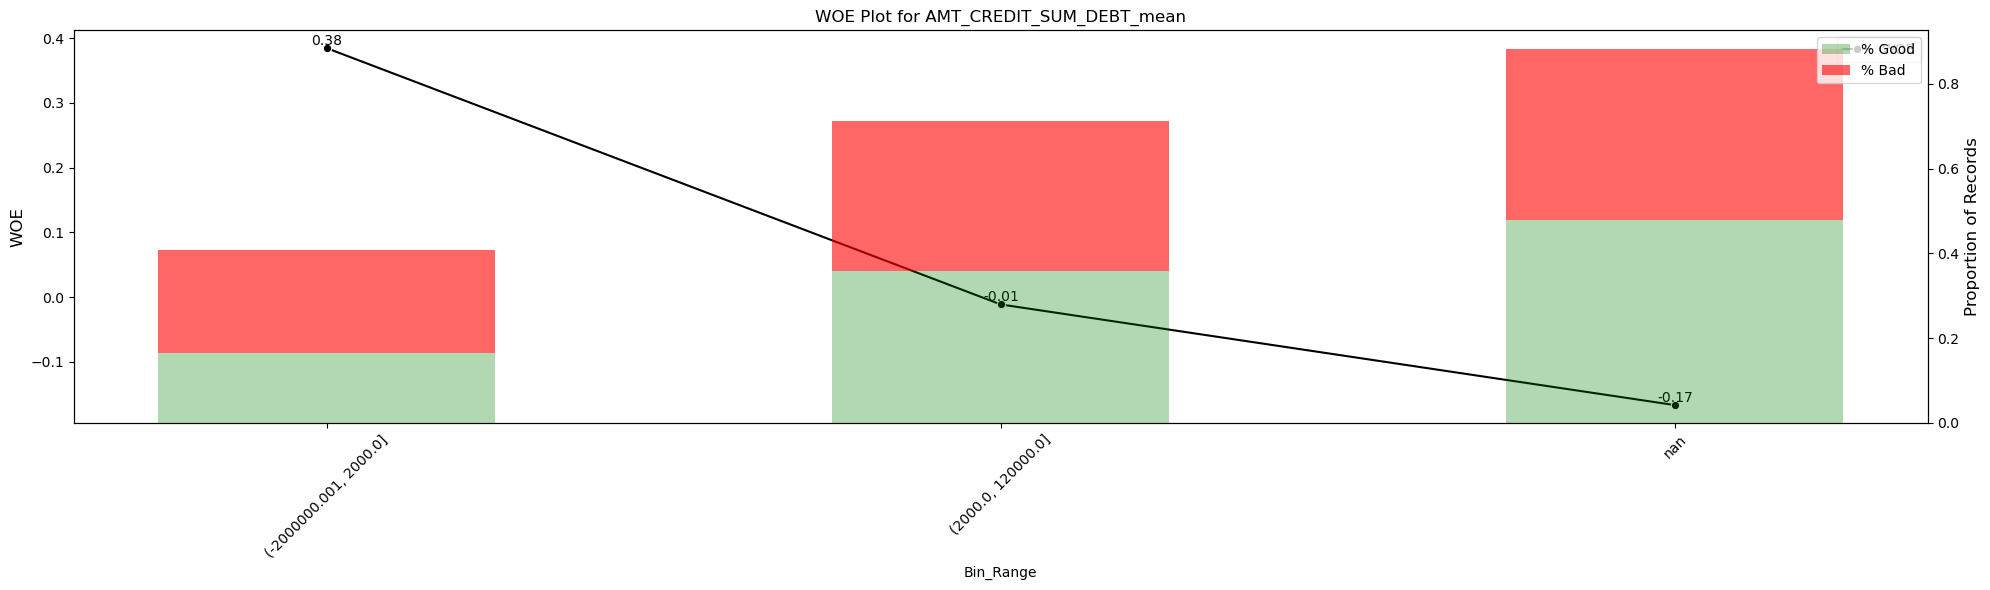

In [45]:
plot_numeric_woe(df, 'AMT_CREDIT_SUM_DEBT_mean', 20)
plot_numeric_woe_manual(df, 'AMT_CREDIT_SUM_DEBT_mean', [-2000000,2000, 120000])
# why are the ranges so weird? what does this even mean

IV for CREDIT_ACTIVE_Active with 7 bins: 0.0511


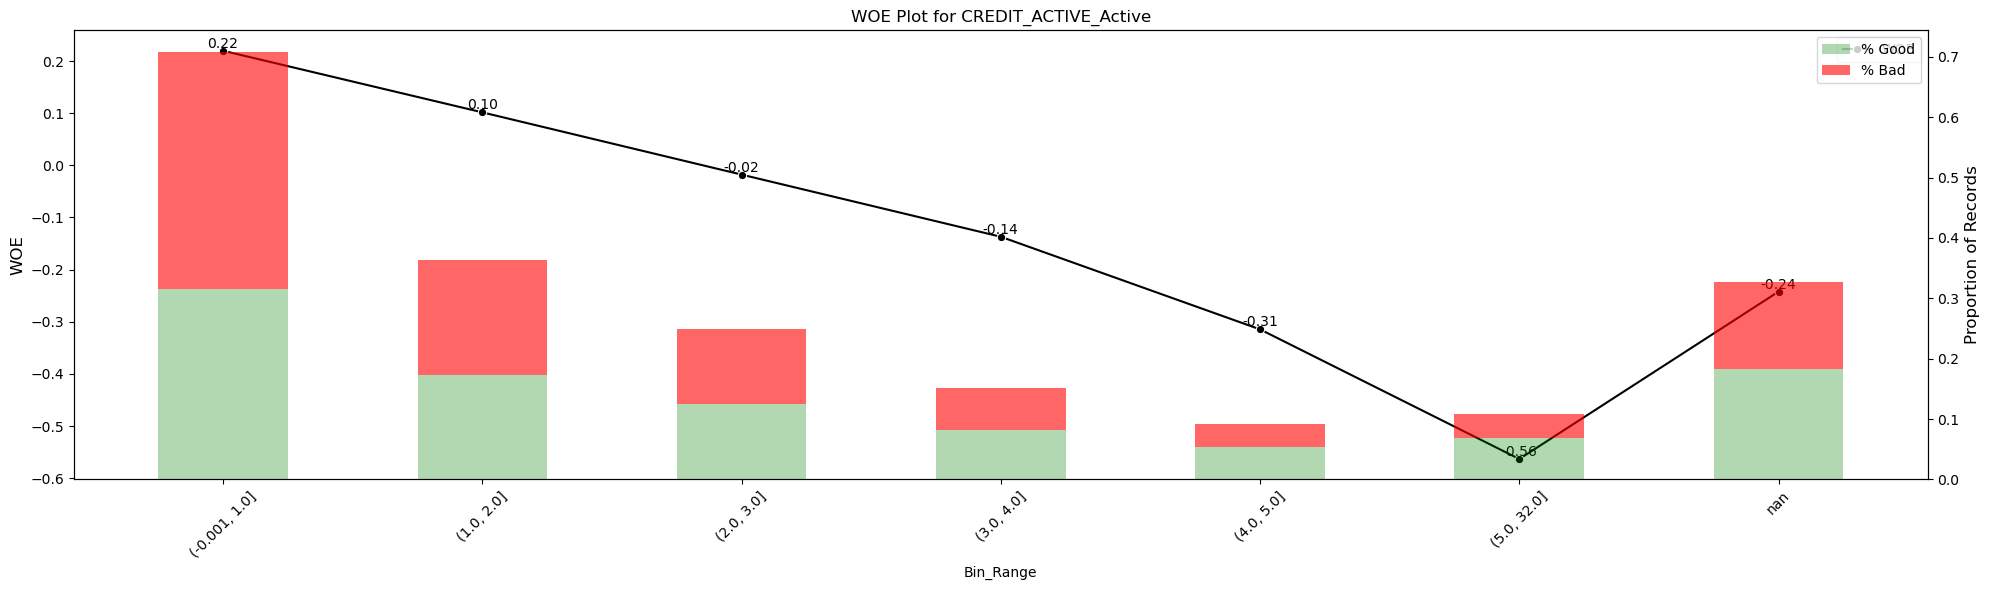


IV for CREDIT_ACTIVE_Active with 4 bins: 0.0444
WOE values per Bin_Range:
  (3.0, 32.0]: WOE = -0.311623
  nan: WOE = -0.242155
  (1.0, 3.0]: WOE = 0.053109
  (-0.001, 1.0]: WOE = 0.219705
IV for CREDIT_ACTIVE_Active with 4 bins: 0.0444


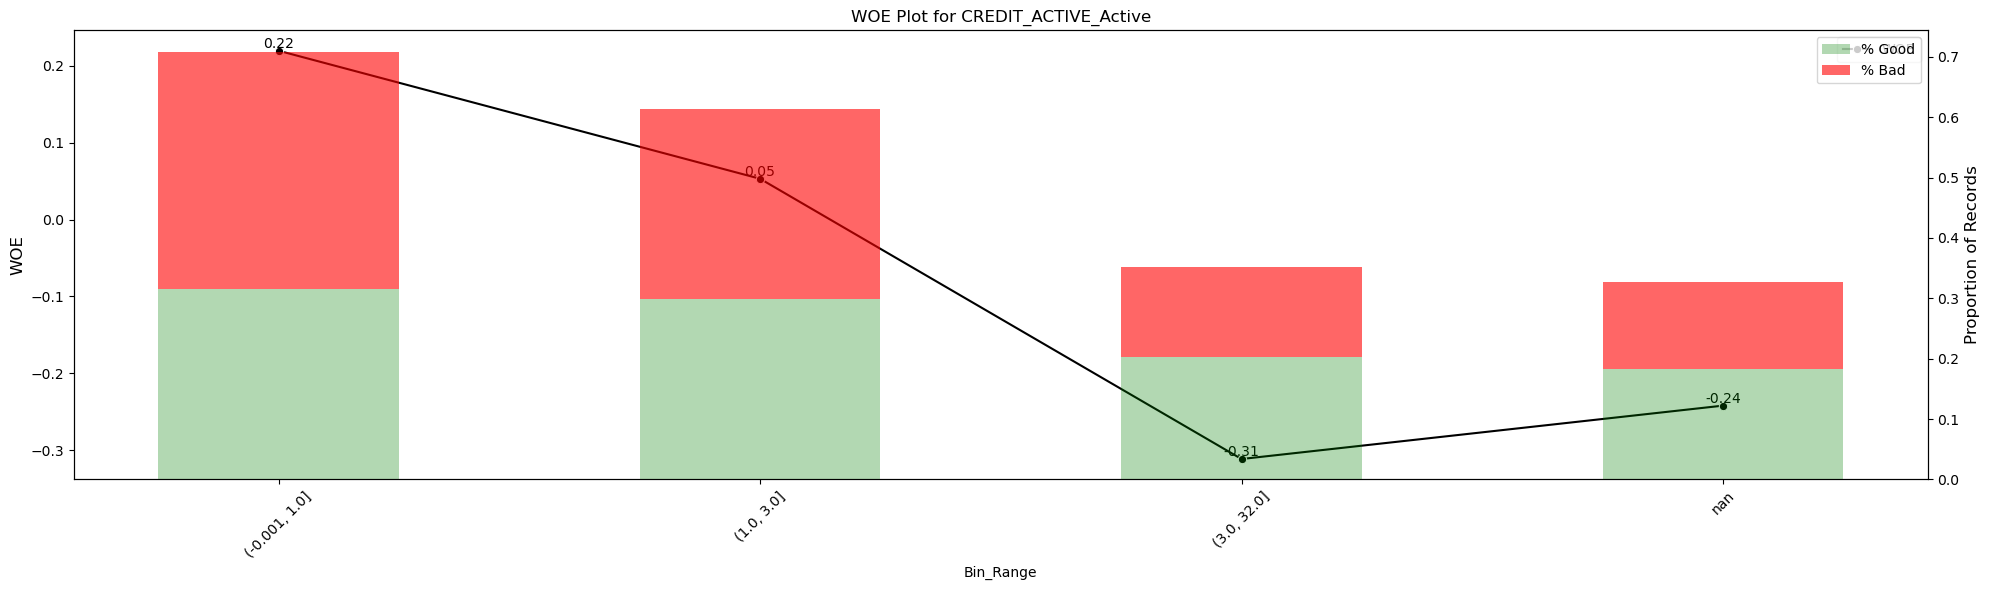

In [46]:
# df.info()
plot_numeric_woe(df, 'CREDIT_ACTIVE_Active', 20)
plot_numeric_woe_manual(df, 'CREDIT_ACTIVE_Active', [0,1,3,32])

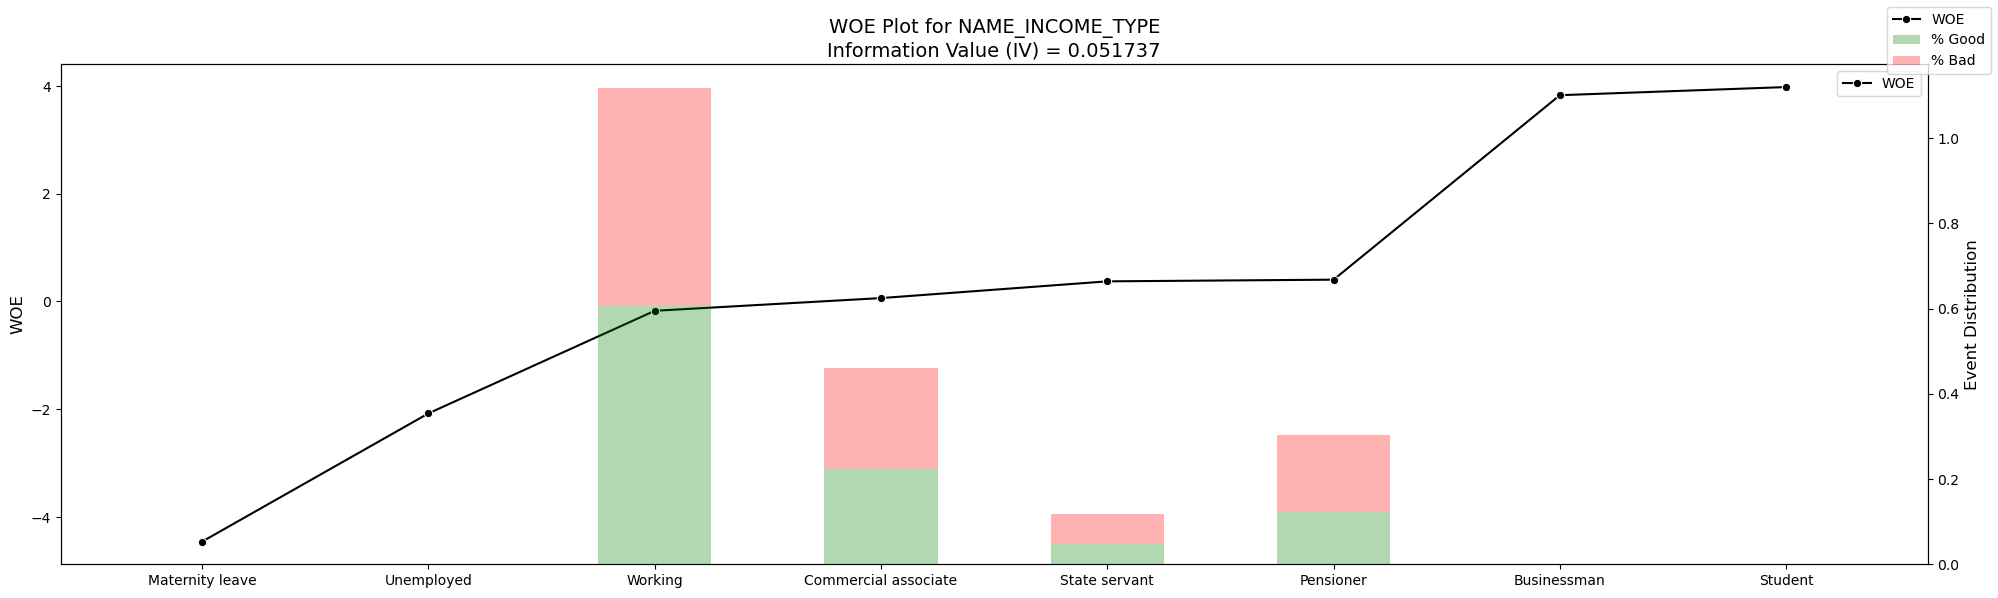

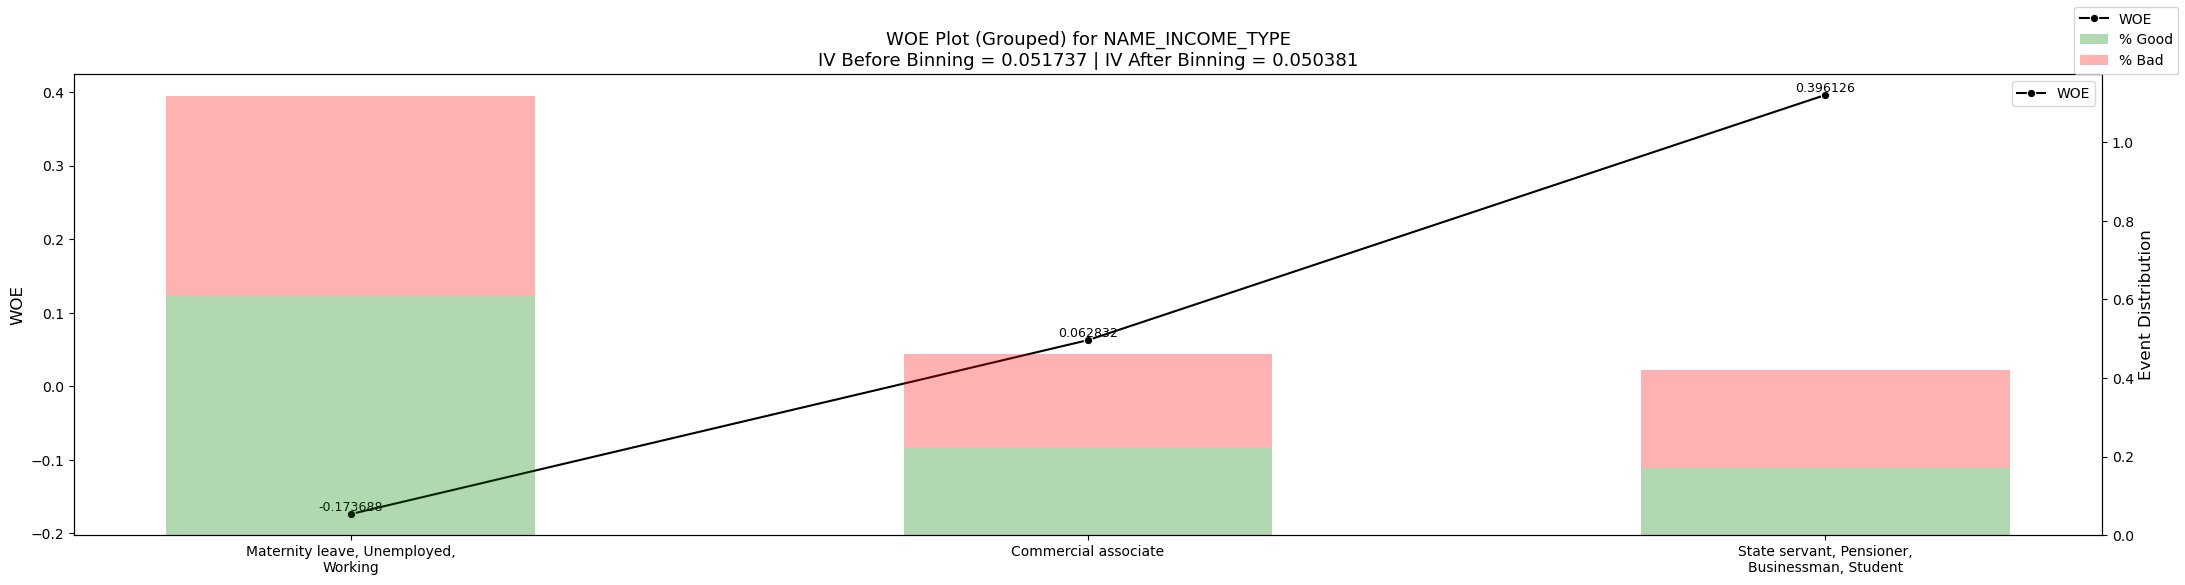


Information Value (IV) Before Binning: 0.051737
Information Value (IV) After Binning:  0.050381

WOE for each grouped bin:
Group 1:
  Categories: Maternity leave, Unemployed, Working
  WOE: -0.173688

Group 2:
  Categories: Commercial associate
  WOE: 0.062832

Group 3:
  Categories: State servant, Pensioner, Businessman, Student
  WOE: 0.396126



In [47]:
woe_iv_plot_categorical(df, "NAME_INCOME_TYPE", target_name='TARGET')
woe_iv_plot_categorical_manual(df, "NAME_INCOME_TYPE", [0,3,4,8], target_name='TARGET')

IV for DAYS_LAST_PHONE_CHANGE with 18 bins: 0.0521


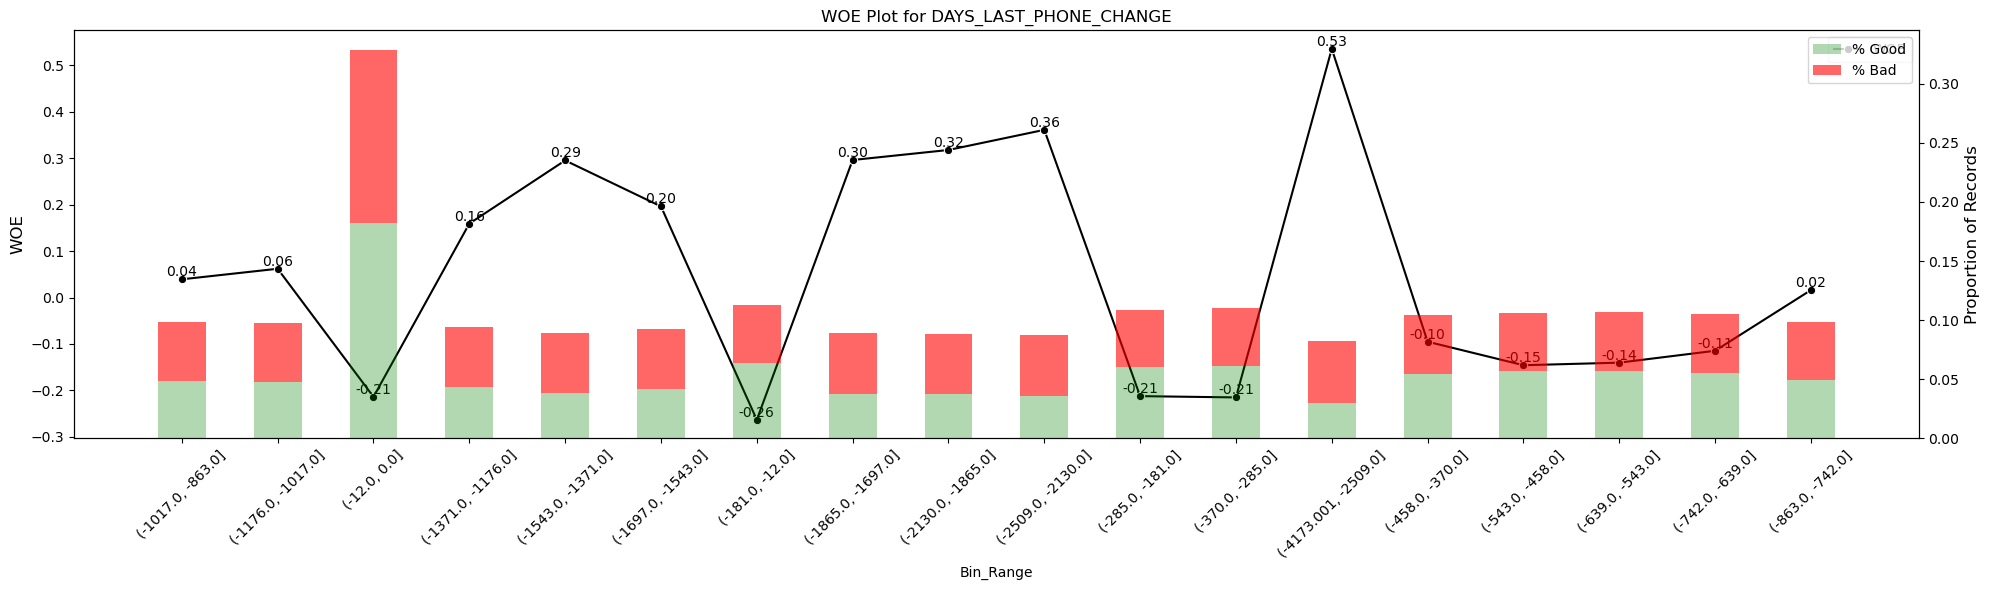


IV for DAYS_LAST_PHONE_CHANGE with 5 bins: 0.0495
WOE values per Bin_Range:
  nan: WOE = -0.213731
  (-750.0, -10.0]: WOE = -0.169176
  (-1400.0, -750.0]: WOE = 0.069524
  (-2100.0, -1400.0]: WOE = 0.279122
  (-4200.001, -2100.0]: WOE = 0.444128
IV for DAYS_LAST_PHONE_CHANGE with 5 bins: 0.0495


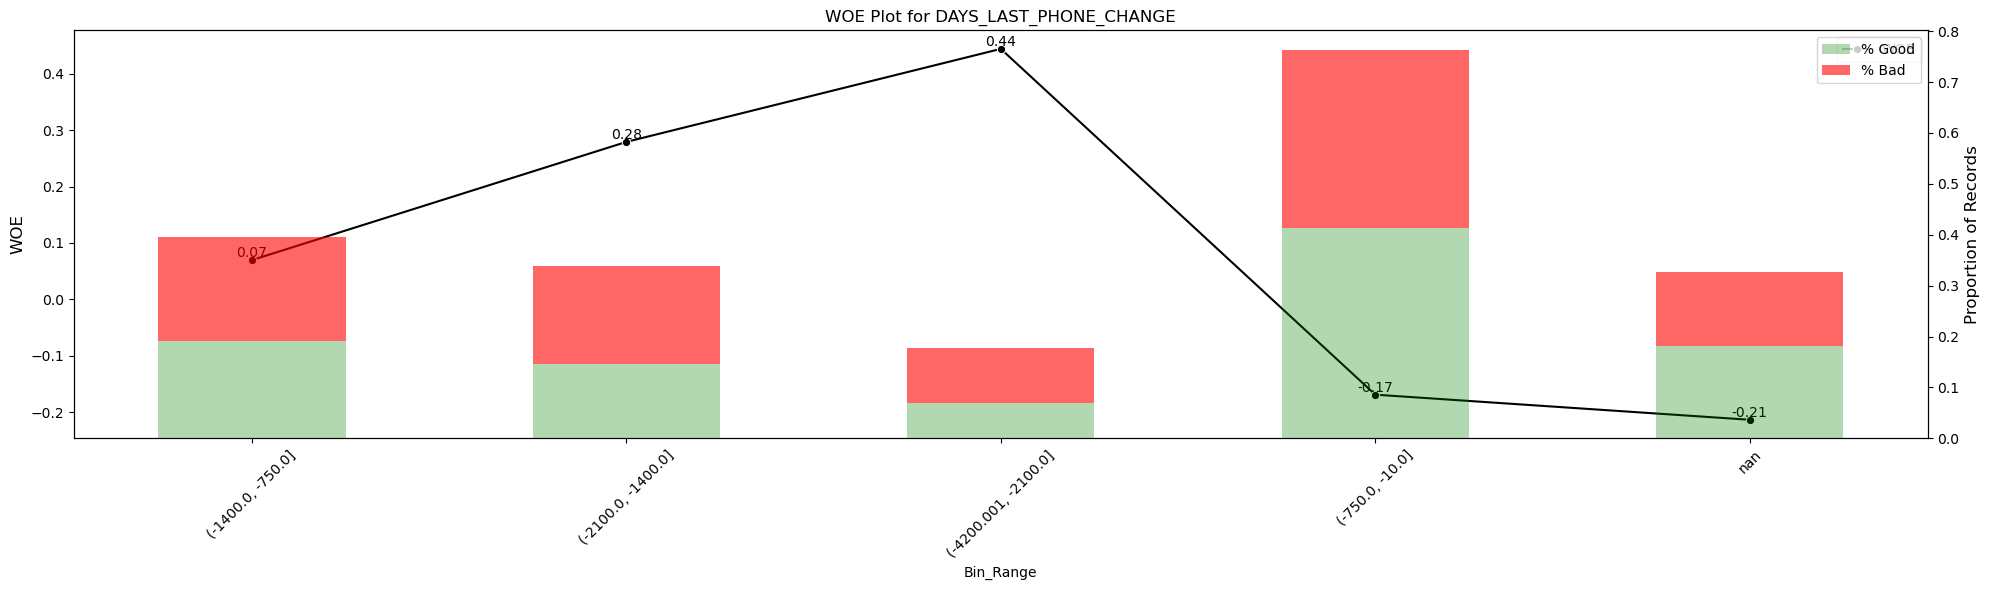

In [48]:
plot_numeric_woe(df, 'DAYS_LAST_PHONE_CHANGE', 20)
plot_numeric_woe_manual(df, 'DAYS_LAST_PHONE_CHANGE', [-4200,-2100, -1400, -750, -10])

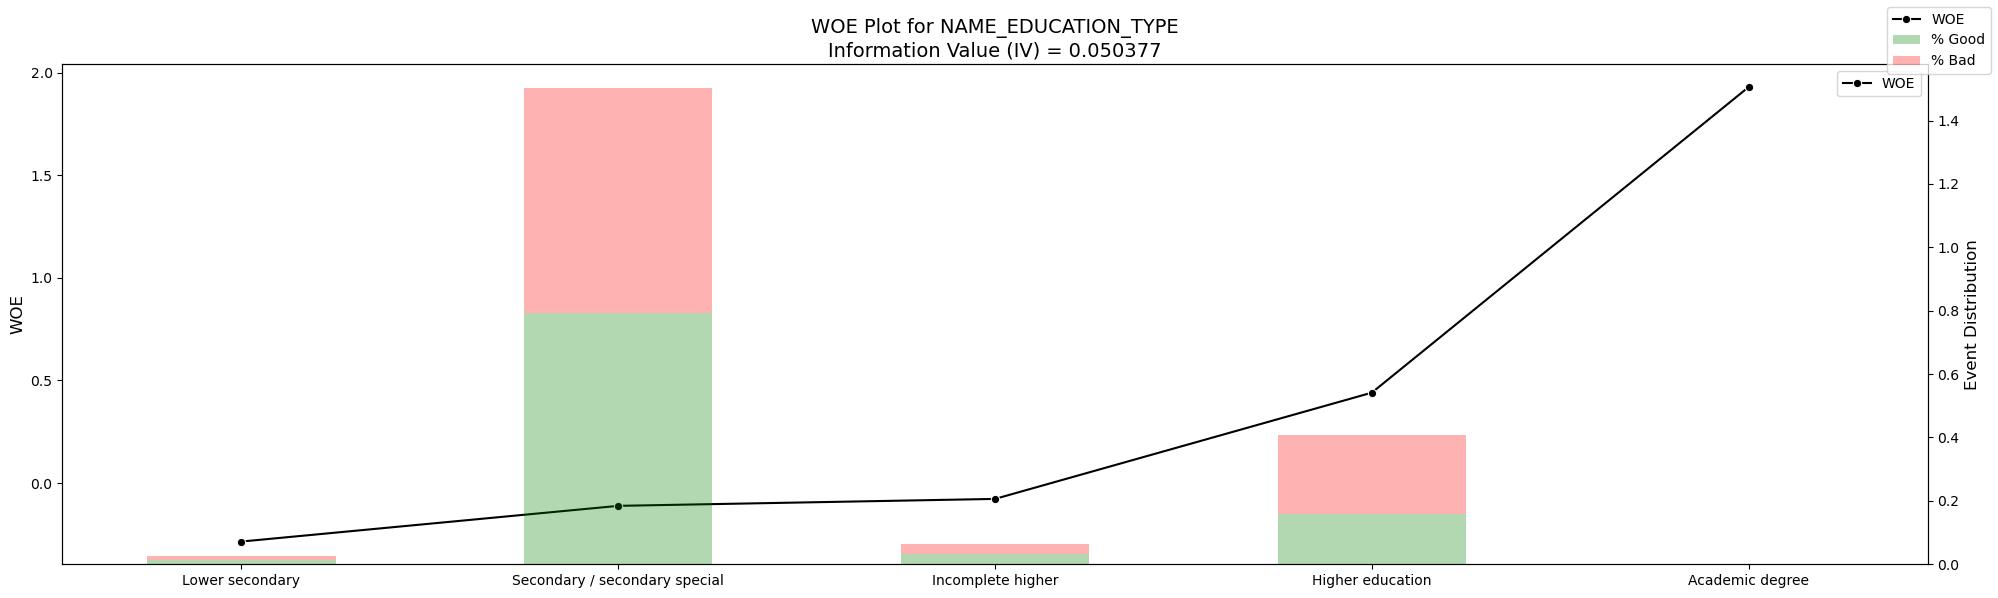

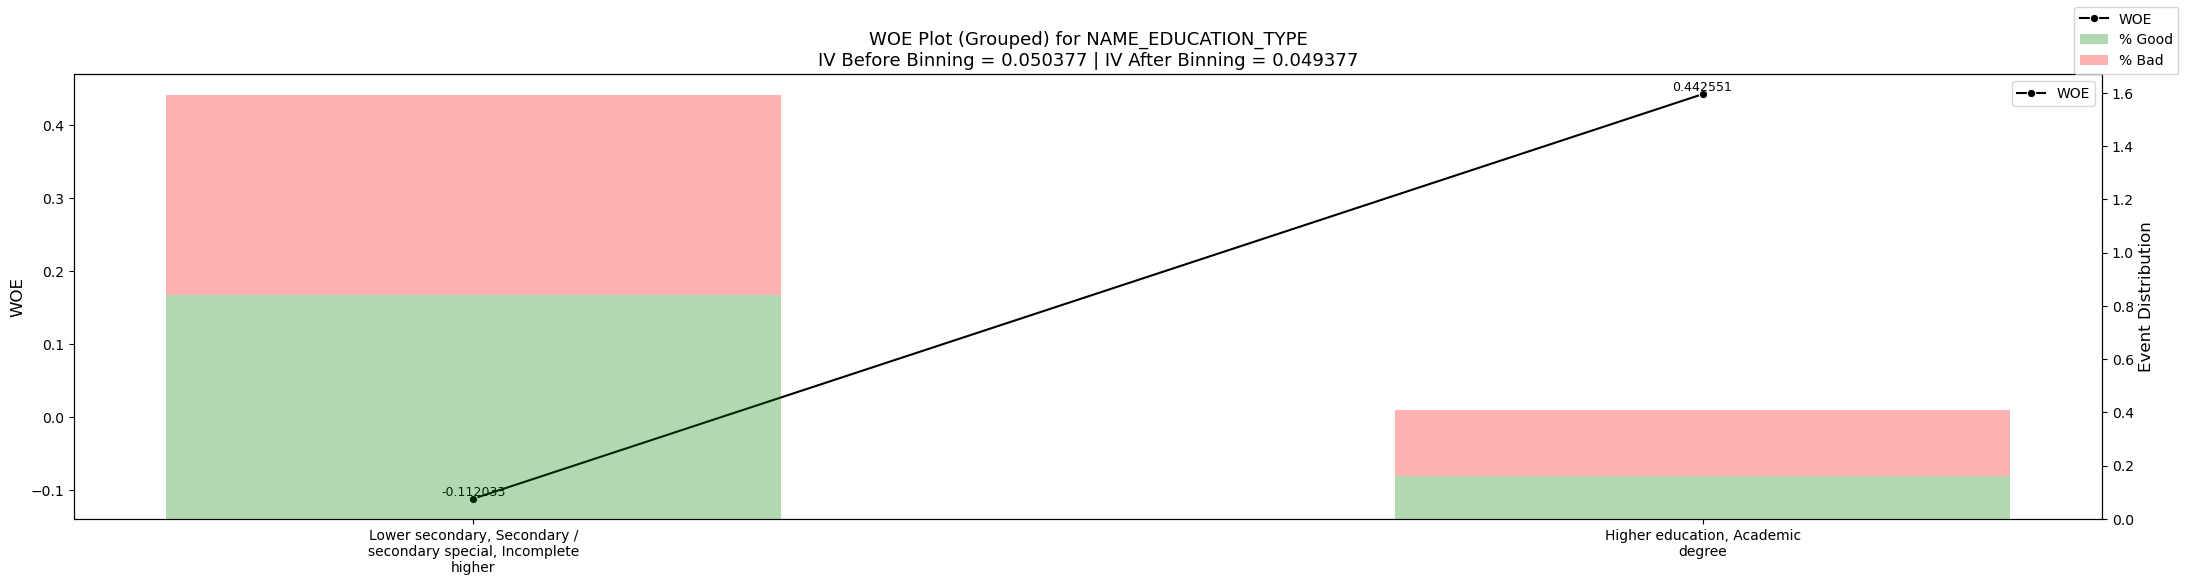


Information Value (IV) Before Binning: 0.050377
Information Value (IV) After Binning:  0.049377

WOE for each grouped bin:
Group 1:
  Categories: Lower secondary, Secondary / secondary special, Incomplete higher
  WOE: -0.112033

Group 2:
  Categories: Higher education, Academic degree
  WOE: 0.442551



In [49]:
woe_iv_plot_categorical(df, "NAME_EDUCATION_TYPE", target_name='TARGET')
woe_iv_plot_categorical_manual(df, "NAME_EDUCATION_TYPE", [0,3,5], target_name='TARGET')

IV for AMT_CREDIT_SUM_DEBT_sum with 17 bins: 0.0465


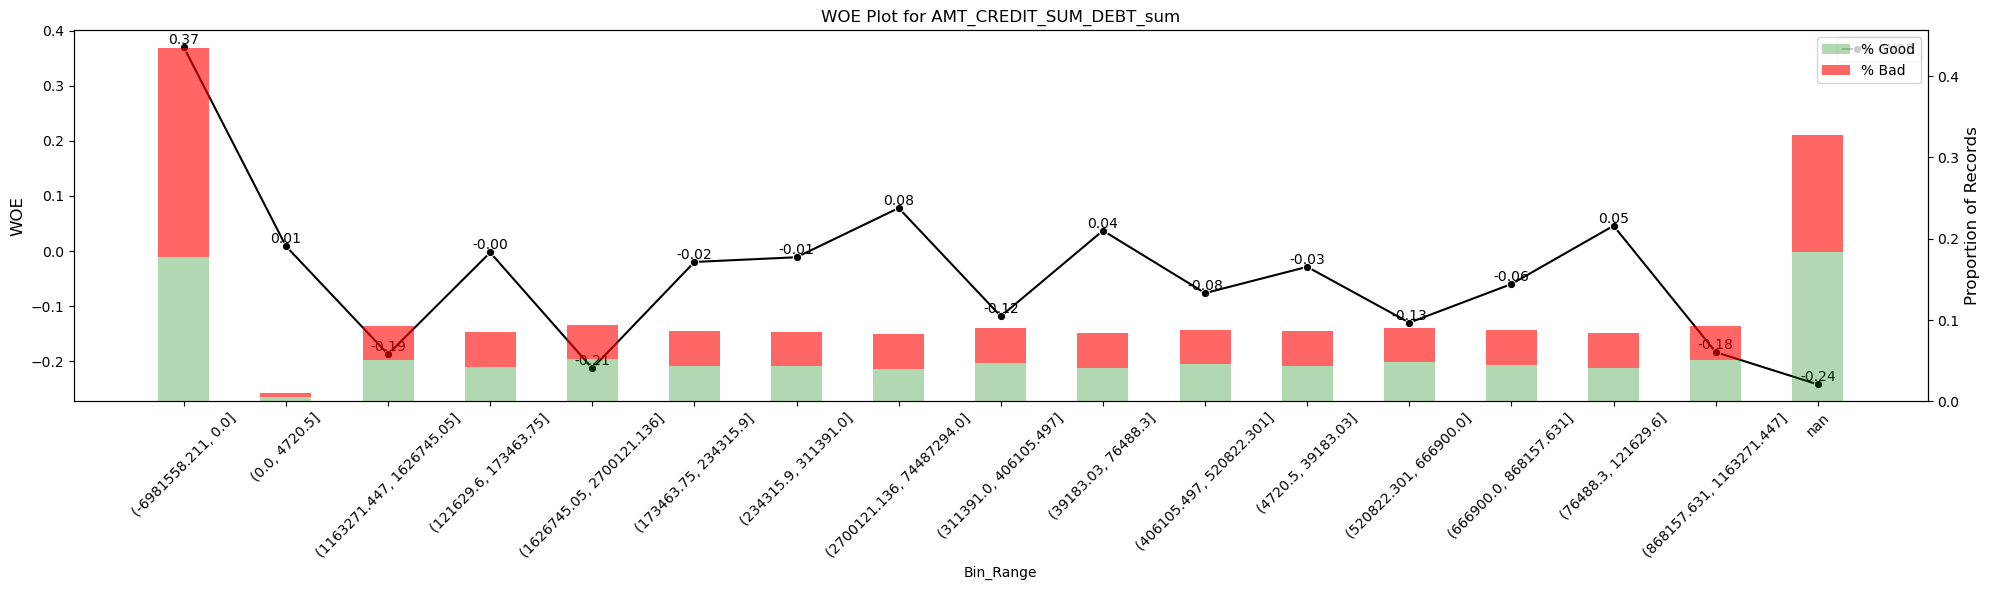


IV for AMT_CREDIT_SUM_DEBT_sum with 4 bins: 0.0424
WOE values per Bin_Range:
  nan: WOE = -0.185487
  (300000.0, 1200000.0]: WOE = -0.110509
  (0.0, 300000.0]: WOE = 0.002592
  (-70000000.001, 0.0]: WOE = 0.370085
IV for AMT_CREDIT_SUM_DEBT_sum with 4 bins: 0.0424


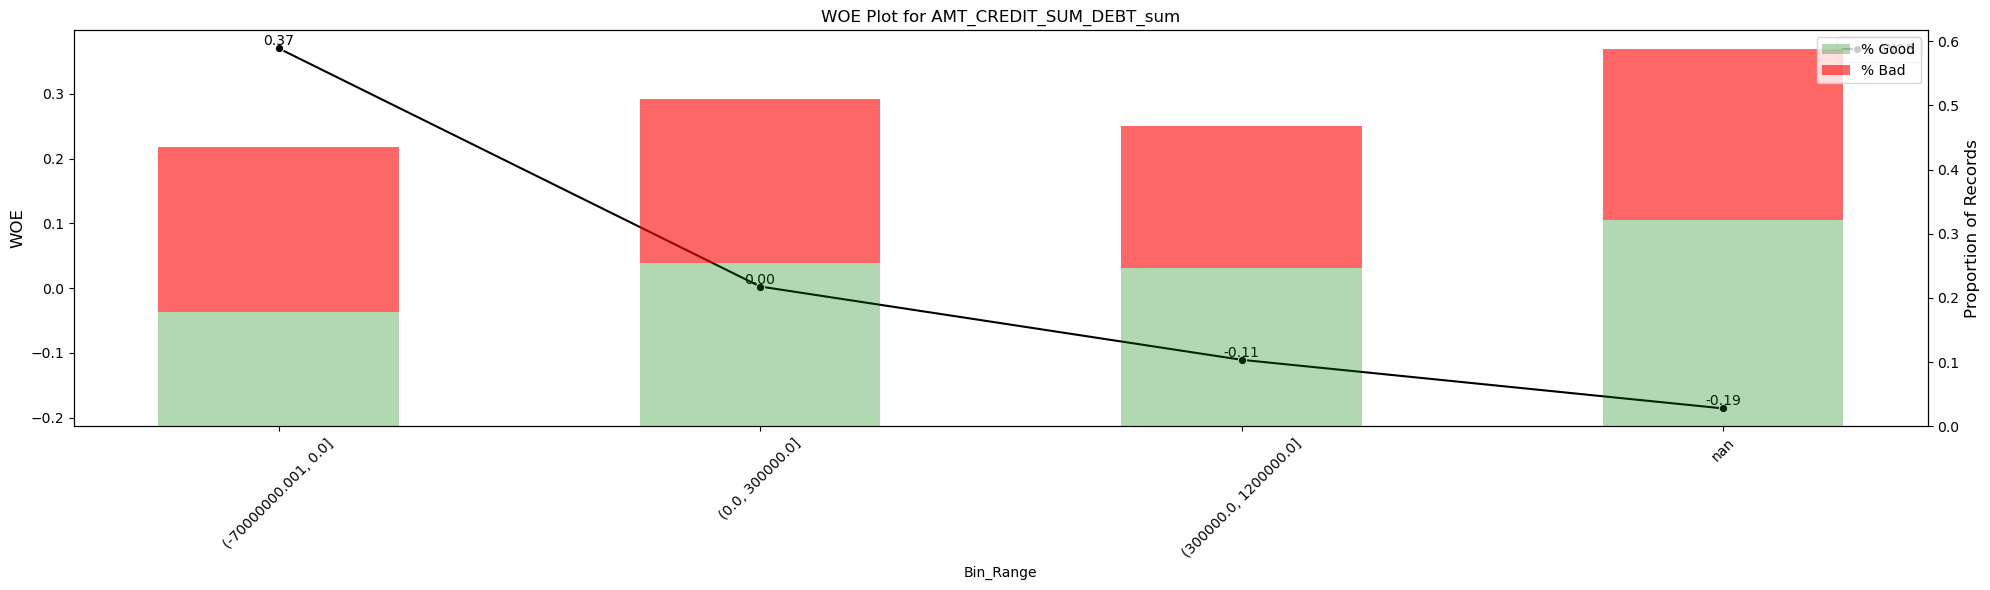

In [50]:

plot_numeric_woe(df, 'AMT_CREDIT_SUM_DEBT_sum', 20)
plot_numeric_woe_manual(df, 'AMT_CREDIT_SUM_DEBT_sum', [-70000000, 0, 300000, 1200000])

IV for REGION_POPULATION_RELATIVE with 20 bins: 0.0451


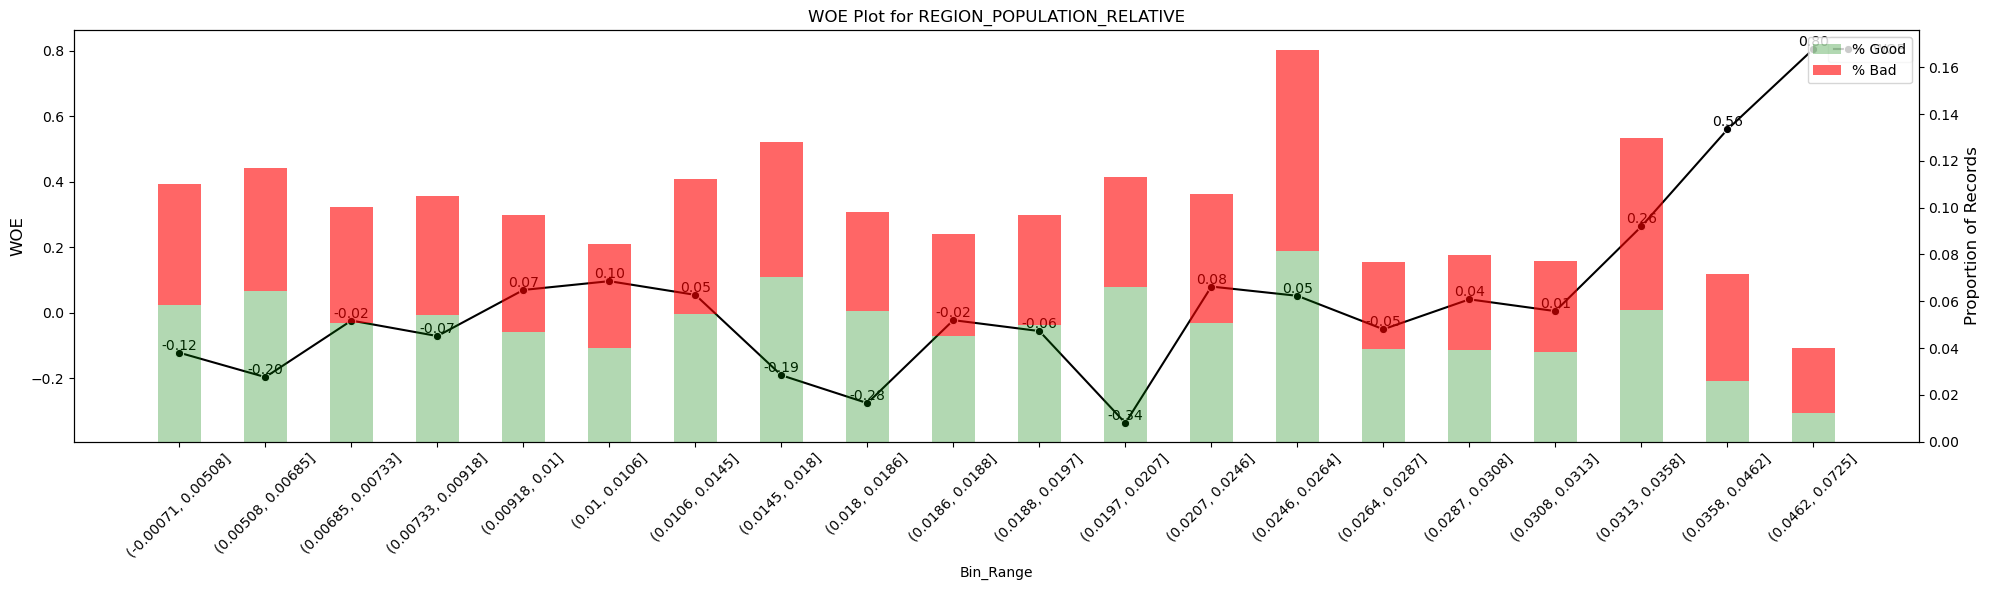


IV for REGION_POPULATION_RELATIVE with 3 bins: 0.0143
WOE values per Bin_Range:
  (-1.001, 0.01]: WOE = -0.089135
  (0.01, 0.05]: WOE = 0.008514
  (0.05, 1.0]: WOE = 0.804657
IV for REGION_POPULATION_RELATIVE with 3 bins: 0.0143


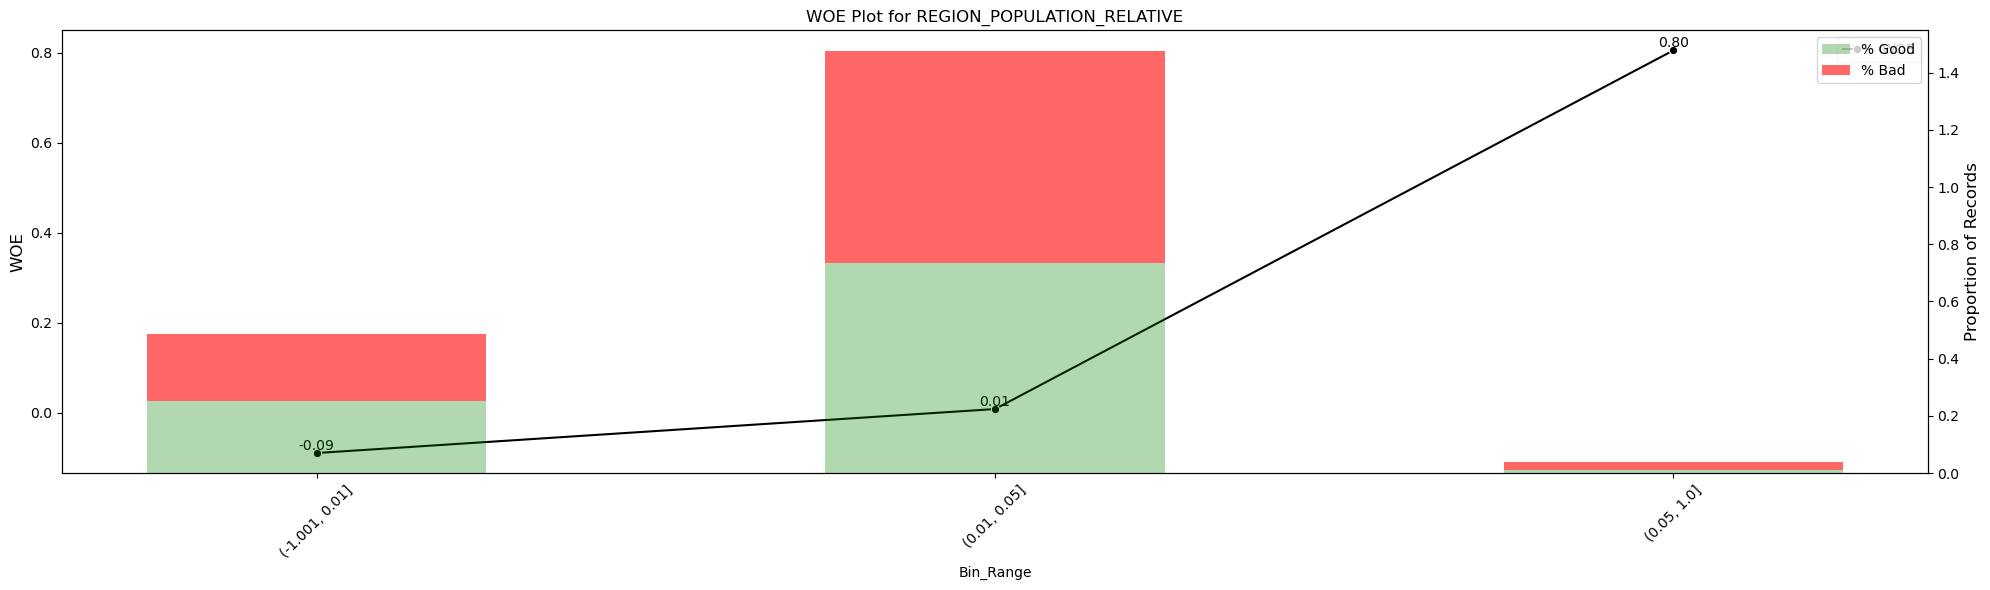

In [51]:
plot_numeric_woe(df, 'REGION_POPULATION_RELATIVE', 20)
plot_numeric_woe_manual(df, 'REGION_POPULATION_RELATIVE', [-1, 0.01, 0.05 ,1])

IV for FLOORSMAX_AVG with 10 bins: 0.04


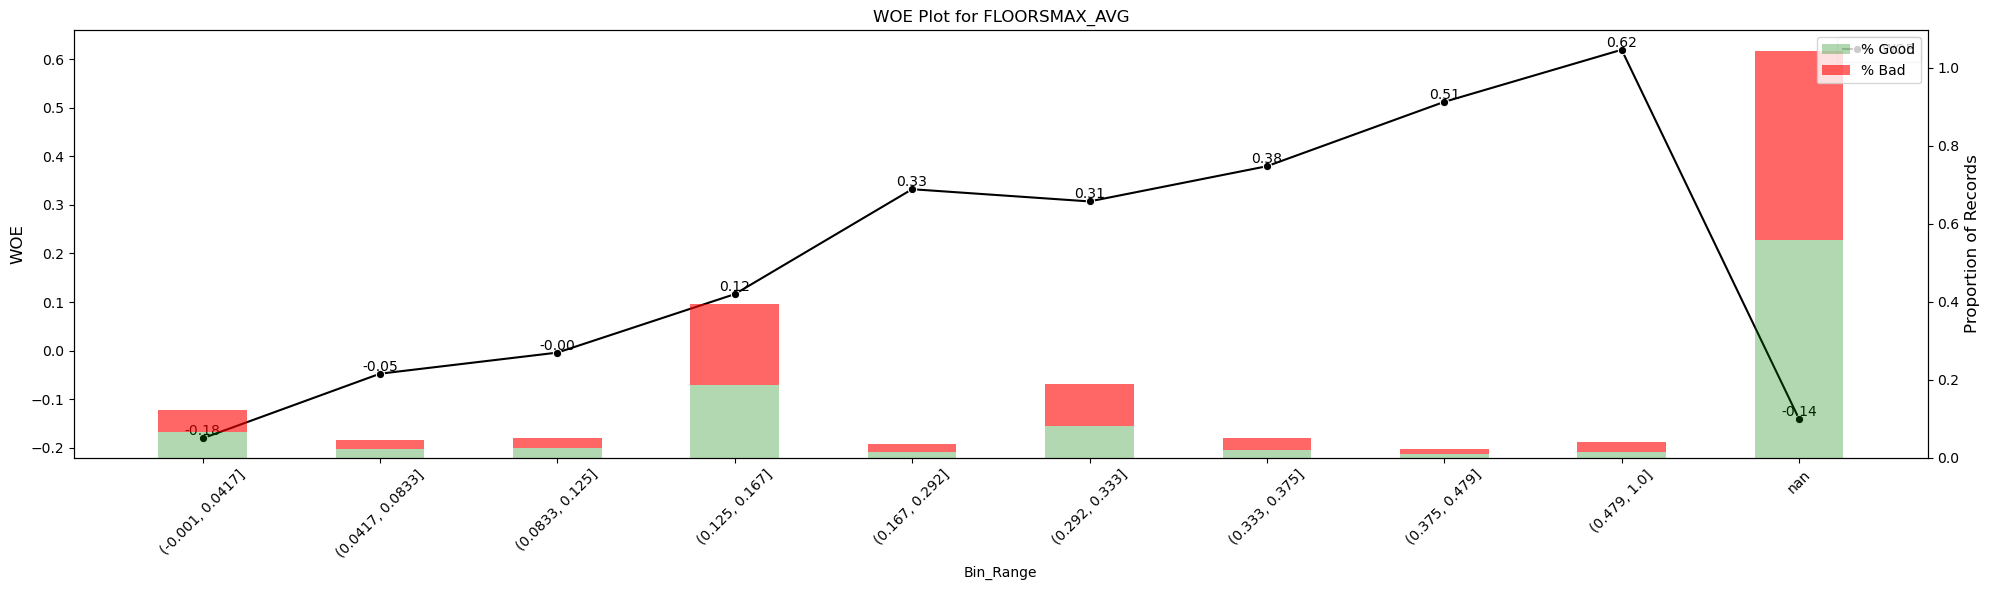


IV for FLOORSMAX_AVG with 4 bins: 0.0367
WOE values per Bin_Range:
  nan: WOE = -0.140397
  (-0.001, 0.15]: WOE = -0.109530
  (0.15, 0.3]: WOE = 0.134812
  (0.3, 1.0]: WOE = 0.374953
IV for FLOORSMAX_AVG with 4 bins: 0.0367


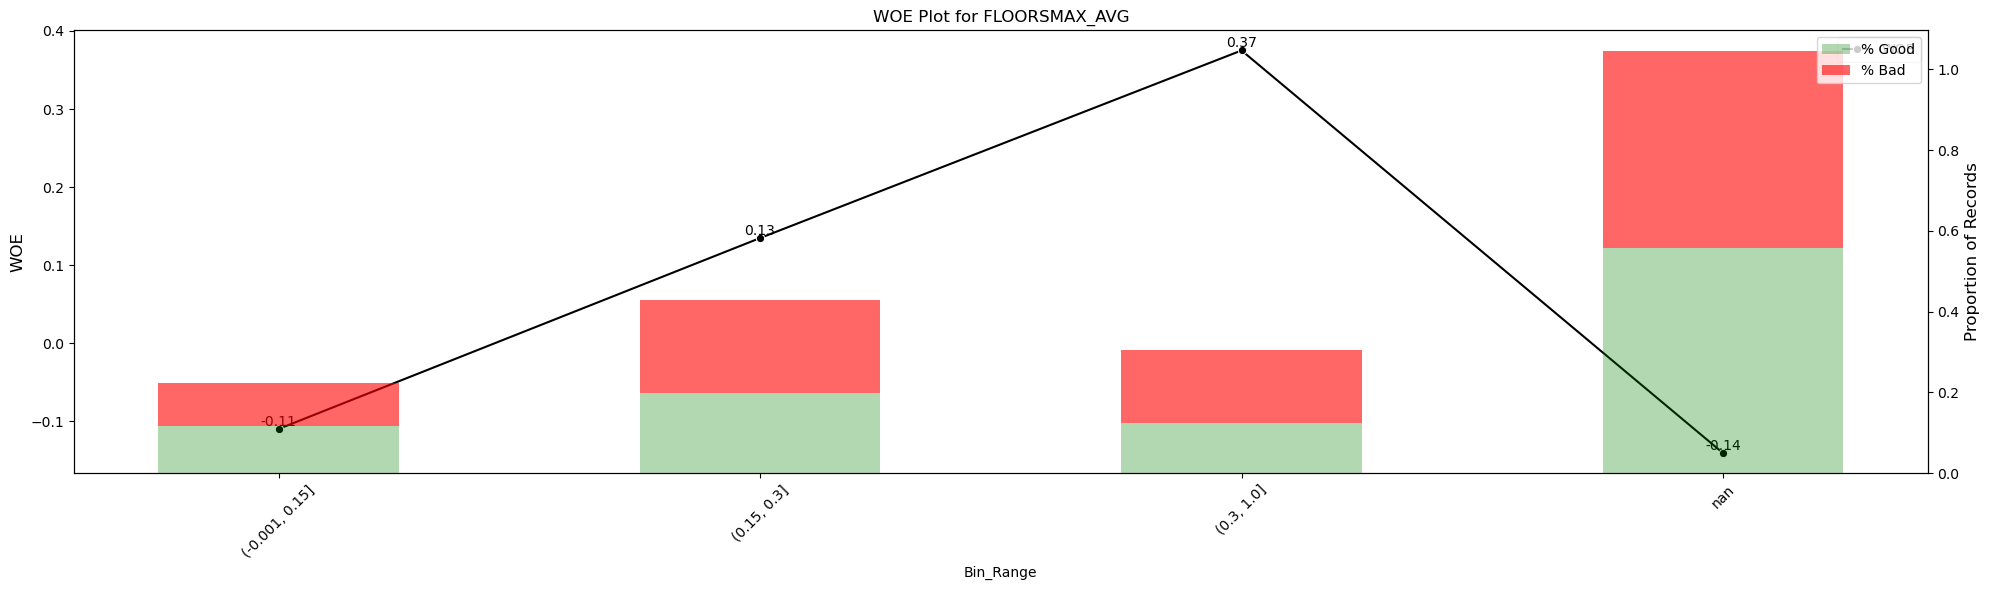

In [52]:
plot_numeric_woe(df, 'FLOORSMAX_AVG', 20)
plot_numeric_woe_manual(df, 'FLOORSMAX_AVG', [0, 0.15, 0.3, 1])

IV for DAYS_ID_PUBLISH with 20 bins: 0.0434


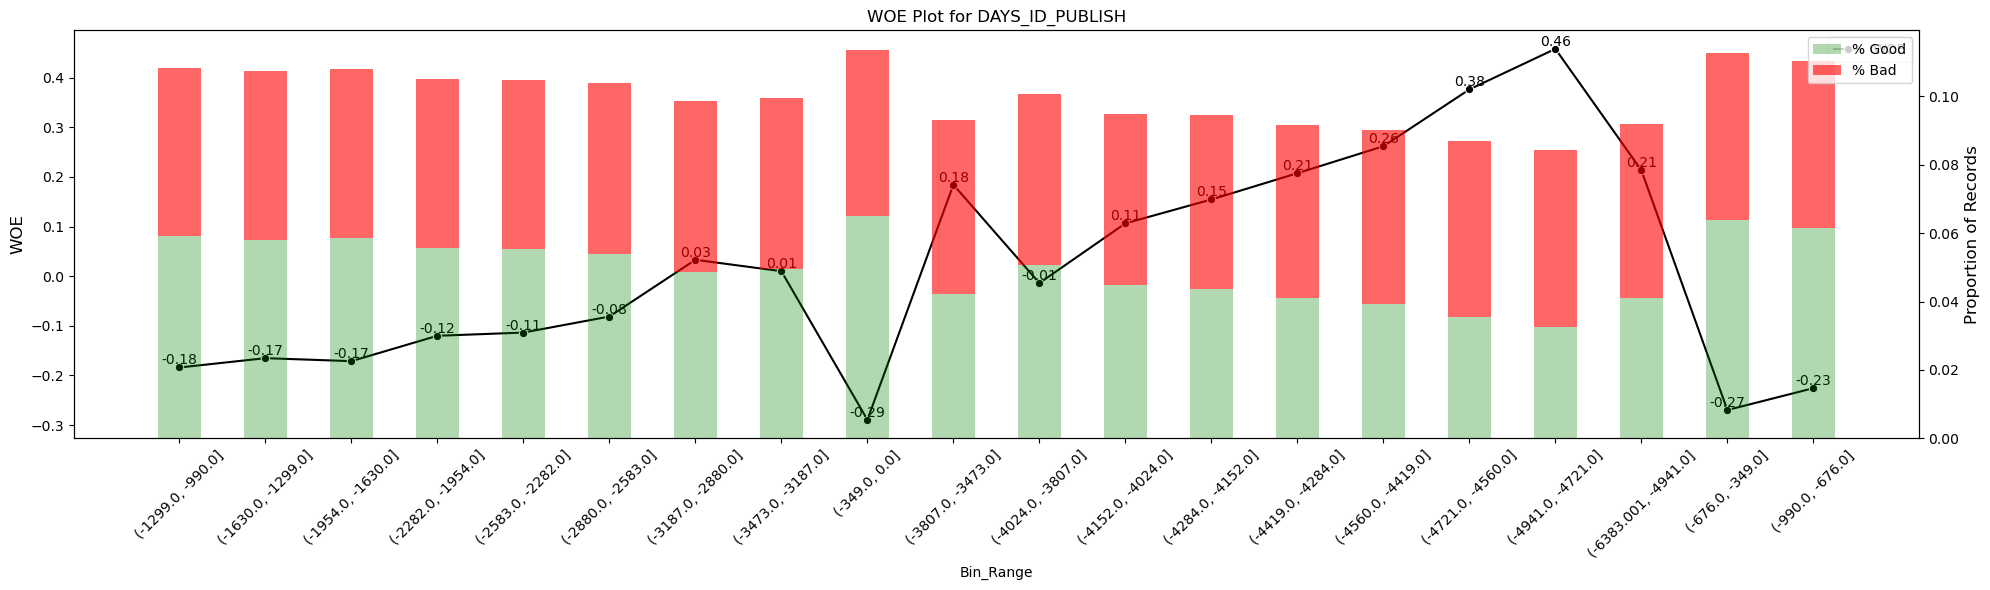


IV for DAYS_ID_PUBLISH with 4 bins: 0.0364
WOE values per Bin_Range:
  (-2000.0, 0.0]: WOE = -0.212013
  (-3000.0, -2000.0]: WOE = -0.100155
  (-4000.0, -3000.0]: WOE = 0.058005
  (-6551.001, -4000.0]: WOE = 0.242266
IV for DAYS_ID_PUBLISH with 4 bins: 0.0364


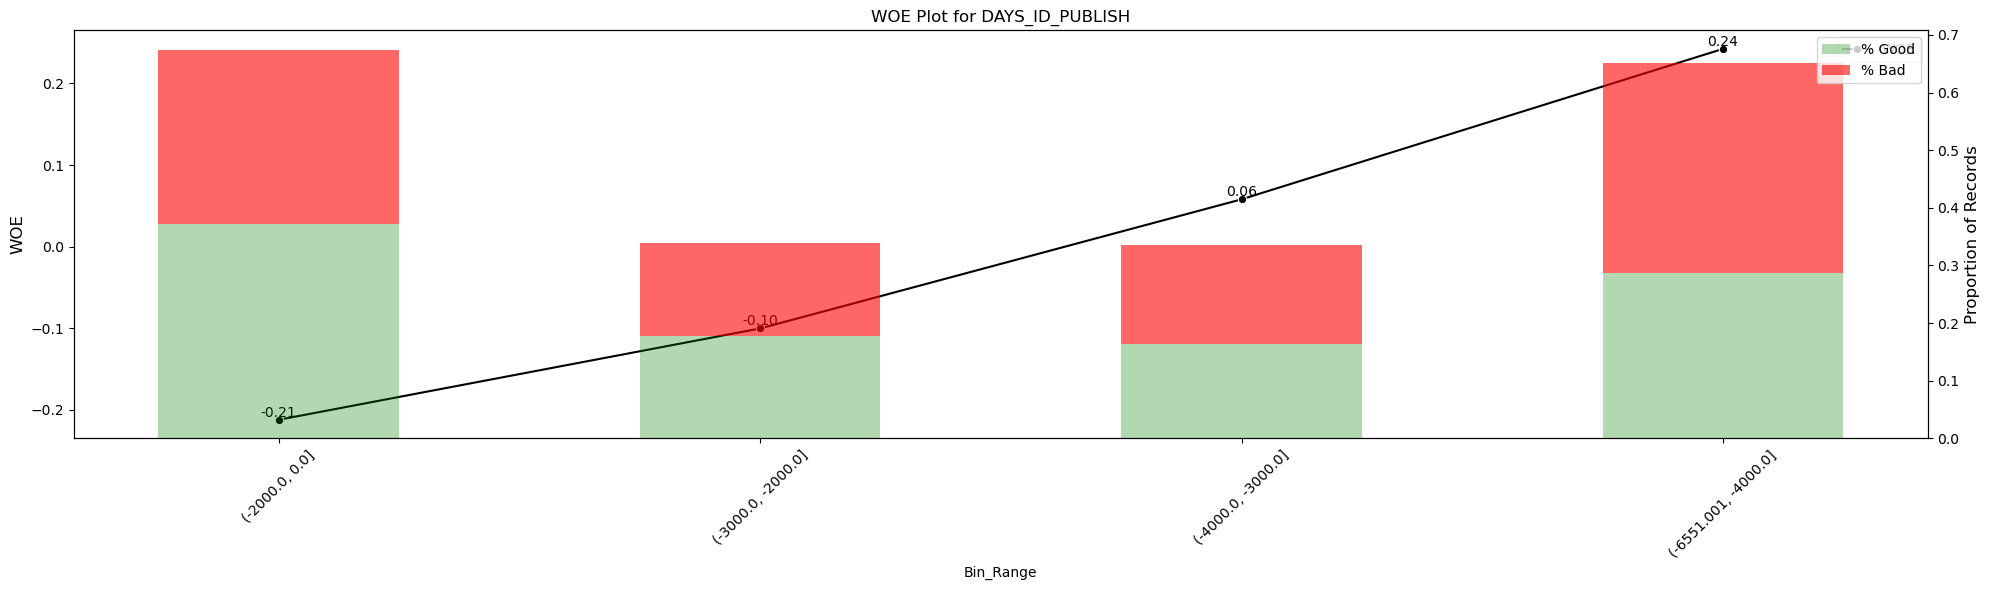

In [53]:
plot_numeric_woe(df, 'DAYS_ID_PUBLISH', 20)
plot_numeric_woe_manual(df, 'DAYS_ID_PUBLISH', [-6551,  -4000, -3000, -2000, 0])

In [54]:
# drop unwatned variables and save new df as after_coarse_classing
cols_to_drop = [
    'REGION_POPULATION_RELATIVE',
    'DAYS_LAST_PHONE_CHANGE',
    'DAYS_CREDIT_ENDDATE_mean'
]

df.drop(columns=[col for col in cols_to_drop if col in df.columns], inplace=True)
df1.drop(columns=[col for col in cols_to_drop if col in df1.columns], inplace=True)
df.info()
df.to_csv('after_coarse_classing_train.csv', index=False)
df1.to_csv('after_coarse_classing_test.csv', index=False)

# df.drop(columns=[col for col in cols_to_drop if col in df.columns], inplace=True)
# df.info()
# df.to_csv('after_coarse_classing.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145110 entries, 0 to 145109
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   TARGET                    145110 non-null  int64  
 1   NAME_INCOME_TYPE          145110 non-null  object 
 2   NAME_EDUCATION_TYPE       145110 non-null  object 
 3   DAYS_ID_PUBLISH           145110 non-null  int64  
 4   OCCUPATION_TYPE           100272 non-null  object 
 5   ORGANIZATION_TYPE         145110 non-null  object 
 6   EXT_SOURCE_1              62444 non-null   float64
 7   FLOORSMAX_AVG             73800 non-null   float64
 8   DAYS_CREDIT_min           123772 non-null  float64
 9   AMT_CREDIT_SUM_DEBT_sum   123772 non-null  float64
 10  AMT_CREDIT_SUM_DEBT_mean  120353 non-null  float64
 11  CREDIT_ACTIVE_Active      123772 non-null  float64
 12  RATIO_LIFE_EMPLOYED       145110 non-null  float64
 13  LOAN_TO_VALUE             144951 non-null  f

<h1> Create Scorecard

|   |Characteristic         |              Number of Attributes |  IV |  
|--- |  ------               |        --------------  | ----- |  
|   1   |   EXT_SOURCE_1               |   6   |   0.1455  |
|   2   |  LOAN_TO_VALUE                 |   5   |   0.0687  |
|   3   |  RATIO_LIFE_EMPLOYED          |   6   |   0.0802 |
|   4   |  DAYS_CREDIT_MIN  |   5   |   0.0638  |
|   5   |  DAYS_CREDIT_ENDDATE_mean                  |   5   |   0.0704  |
|   6   |  ORGANIZATION_TYPE             |   4   |   0.0578  |
|   7   |  AMT_CREDIT_SUM_DEBT_mean  |   3   |   0.0436  |  
|   8   |  CREDIT_ACTIVE_Active                 |   4   |   0.0469  |
|   9   |  NAME_INCOME_TYPE                 |   3   |   0.0.0499  |
|   10   |  DAYS_LAST_PHONE_CHANGE                 |   5   |   0.0461  |
|   11   |  AMT_CREDIT_SUM_DEBT_sum                 |   4   |   0.0437  |
|   12   |  NAME_EDUCATION_TYPE                 |   3   |   0.0469  |
|   13   |  REGION_POPULATION_RELATIVE                 |   4   |   0.022  |
|   14   |  FLOORSMAX_AVG                 |   4   |   0.0356  |


In [55]:
iv_df = calculate_iv_all(df, target_col='TARGET', bins=20)
iv_df.head(20)

Variable        IV
1               EXT_SOURCE_1  0.162914
8              LOAN_TO_VALUE  0.094619
7        RATIO_LIFE_EMPLOYED  0.087263
3            DAYS_CREDIT_min  0.084250
11           OCCUPATION_TYPE  0.076252
12         ORGANIZATION_TYPE  0.075007
5   AMT_CREDIT_SUM_DEBT_mean  0.051932
9           NAME_INCOME_TYPE  0.051737
6       CREDIT_ACTIVE_Active  0.051125
10       NAME_EDUCATION_TYPE  0.050377
4    AMT_CREDIT_SUM_DEBT_sum  0.046521
0            DAYS_ID_PUBLISH  0.043430
2              FLOORSMAX_AVG  0.040018

In [56]:
def Encode_WOE_categorical(column, bin_ranges, woe_values, output_df, missing_woe_value):
    """
    Encode a categorical column into WOE using manual groupings and handle missing values.
    
    Parameters:
    - column: pandas Series (e.g. original_df['JOB'])
    - bin_ranges: list of grouped category strings (e.g., ['student,unemployed', 'working'])
    - woe_values: WOE values for each group (e.g., [-0.2, 0.4])
    - output_df: DataFrame to which the new column will be added
    - missing_woe_value: WOE value to assign to missing or unmapped values
    """
    col_name = column.name + '_woe'

    # Step 1: Build category-to-WOE mapping
    group_to_woe = {}
    for group_str, woe_val in zip(bin_ranges, woe_values):
        categories = [cat.strip() for cat in group_str.split(',')]
        for cat in categories:
            group_to_woe[cat] = float(woe_val)

    # Step 2: Map values and handle missing/unmapped
    encoded_col = column.fillna('Missing').astype(str).map(group_to_woe).fillna(float(missing_woe_value))

    # Step 3: Add to output DataFrame
    output_df[col_name] = encoded_col

In [57]:
def Encode_WOE_numerical(column, bin_edges, woe_values, output_df, missing_woe_value):
    """
    Encode a numerical column into WOE using manual bins and handle missing values.

    Parameters:
    - column: pandas Series (e.g. original_df['EXT_SOURCE_1'])
    - bin_edges: list of numeric cut points
    - woe_values: WOE values for each bin (len = len(bin_edges) - 1)
    - output_df: DataFrame to which the encoded column will be added
    - missing_woe_value: WOE value to assign to missing values
    """
    col_name = column.name + '_woe'

    # Step 1: Bin the values
    binned = pd.cut(column, bins=bin_edges, include_lowest=True)

    # Step 2: Map each bin to WOE
    bin_labels = binned.cat.categories
    if len(woe_values) != len(bin_labels):
        raise ValueError(f"Number of WOE values ({len(woe_values)}) must match number of bins ({len(bin_labels)})")

    bin_to_woe = {bin_labels[i]: float(woe_values[i]) for i in range(len(woe_values))}

    # Step 3: Map and handle missing values
    encoded_col = binned.map(bin_to_woe).astype(float).fillna(float(missing_woe_value))

    # Step 4: Add to output DataFrame
    output_df[col_name] = encoded_col

In [58]:
# encoded_df = pd.DataFrame()
# df = pd.read_csv('after_coarse_classing.csv')
# df.info()
# encoded_df['TARGET'] = df['TARGET']
# encoded_df.info()
encoded_df = pd.DataFrame()
encoded_df1 = pd.DataFrame()
df = pd.read_csv('after_coarse_classing_train.csv')
df1 = pd.read_csv('after_coarse_classing_test.csv')
df.info()
encoded_df['TARGET'] = df['TARGET']
encoded_df1['TARGET'] = df1['TARGET']
encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145110 entries, 0 to 145109
Data columns (total 14 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   TARGET                    145110 non-null  int64  
 1   NAME_INCOME_TYPE          145110 non-null  object 
 2   NAME_EDUCATION_TYPE       145110 non-null  object 
 3   DAYS_ID_PUBLISH           145110 non-null  int64  
 4   OCCUPATION_TYPE           100272 non-null  object 
 5   ORGANIZATION_TYPE         145110 non-null  object 
 6   EXT_SOURCE_1              62444 non-null   float64
 7   FLOORSMAX_AVG             73800 non-null   float64
 8   DAYS_CREDIT_min           123772 non-null  float64
 9   AMT_CREDIT_SUM_DEBT_sum   123772 non-null  float64
 10  AMT_CREDIT_SUM_DEBT_mean  120353 non-null  float64
 11  CREDIT_ACTIVE_Active      123772 non-null  float64
 12  RATIO_LIFE_EMPLOYED       145110 non-null  float64
 13  LOAN_TO_VALUE             144951 non-null  f

In [59]:
Encode_WOE_categorical(
    df['NAME_INCOME_TYPE'],
    bin_ranges=['Maternity leave, Unemployed, Working', 'Commercial associate','State servant, Pensioner, Businessman, Student'],
    woe_values=[-0.174844, 0.068848, 0.389268],
    output_df = encoded_df,
    missing_woe_value=0.0
)
Encode_WOE_categorical(
    df1['NAME_INCOME_TYPE'],
    bin_ranges=['Maternity leave, Unemployed, Working', 'Commercial associate','State servant, Pensioner, Businessman, Student'],
    woe_values=[-0.174844, 0.068848, 0.389268],
    output_df = encoded_df1,
    missing_woe_value=0.0
)

In [60]:
Encode_WOE_categorical(
    df['NAME_EDUCATION_TYPE'],
    bin_ranges=['Lower secondary,Secondary / secondary special,Incomplete higher', 'Higher education,Academic degree'],
    woe_values=[-0.109445, 0.430333],
    output_df = encoded_df,
    missing_woe_value=0.0
)
Encode_WOE_categorical(
    df1['NAME_EDUCATION_TYPE'],
    bin_ranges=['Lower secondary,Secondary / secondary special,Incomplete higher', 'Higher education,Academic degree'],
    woe_values=[-0.109445, 0.430333],
    output_df = encoded_df1,
    missing_woe_value=0.0
)
encoded_df.head(10)

TARGET  NAME_INCOME_TYPE_woe  NAME_EDUCATION_TYPE_woe
0       1             -0.174844                -0.109445
1       0             -0.174844                -0.109445
2       0             -0.174844                -0.109445
3       0              0.389268                -0.109445
4       0              0.389268                 0.430333
5       0              0.389268                -0.109445
6       0             -0.174844                -0.109445
7       0              0.389268                -0.109445
8       0             -0.174844                -0.109445
9       0             -0.174844                -0.109445

In [61]:
Encode_WOE_numerical(
    df['DAYS_ID_PUBLISH'],
    bin_edges=[-10000,-4000,-3000,-2000, 0],
    woe_values=[0.231393, 0.038013, -0.091631, -0.200515],
    output_df=encoded_df,
    missing_woe_value= -0.066502
)

Encode_WOE_numerical(
    df1['DAYS_ID_PUBLISH'],
    bin_edges=[-10000,-4000,-3000,-2000, 0],
    woe_values=[0.231393, 0.038013, -0.091631, -0.200515],
    output_df=encoded_df1,
    missing_woe_value= -0.066502
)
encoded_df.head(50)

TARGET  NAME_INCOME_TYPE_woe  NAME_EDUCATION_TYPE_woe  DAYS_ID_PUBLISH_woe
0        1             -0.174844                -0.109445            -0.091631
1        0             -0.174844                -0.109445            -0.091631
2        0             -0.174844                -0.109445            -0.091631
3        0              0.389268                -0.109445            -0.200515
4        0              0.389268                 0.430333            -0.091631
5        0              0.389268                -0.109445             0.038013
6        0             -0.174844                -0.109445             0.038013
7        0              0.389268                -0.109445            -0.091631
8        0             -0.174844                -0.109445            -0.091631
9        0             -0.174844                -0.109445            -0.200515
10       0              0.389268                 0.430333             0.038013
11       0             -0.174844                -0.109445            -0.200515
12       0              0.068848                -0.109445            -0.091631
13       0             -0.174844                -0.109445            -0.091631
14       0              0.389268                 0.430333            -0.091631
15       0              0.068848                -0.109445             0.038013
16       0             -0.174844                -0.109445            -0.091631
17       0              0.389268                 0.430333             0.231393
18       0              0.068848                -0.109445            -0.200515
19       0             -0.174844                -0.109445             0.231393
20       0             -0.174844                 0.430333             0.231393
21       0             -0.174844                -0.109445            -0.200515
22       0              0.389268                 0.430333             0.231393
23       0             -0.174844                -0.109445            -0.200515
24       0             -0.174844                -0.109445             0.038013
25       0             -0.174844                -0.109445            -0.200515
26       0              0.389268                 0.430333            -0.091631
27       0              0.068848                 0.430333            -0.200515
28       0             -0.174844                 0.430333             0.231393
29       0             -0.174844                -0.109445            -0.200515
30       0             -0.174844                -0.109445             0.231393
31       0             -0.174844                 0.430333            -0.200515
32       0              0.068848                -0.109445            -0.091631
33       0              0.389268                 0.430333             0.038013
34       0              0.389268                 0.430333             0.038013
35       0             -0.174844                -0.109445            -0.091631
36       0             -0.174844                -0.109445             0.231393
37       0             -0.174844                -0.109445            -0.200515
38       0              0.068848                 0.430333             0.231393
39       0             -0.174844                -0.109445            -0.200515
40       0             -0.174844                -0.109445            -0.091631
41       0             -0.174844                -0.109445            -0.200515
42       0             -0.174844                -0.109445            -0.091631
43       0              0.389268                -0.109445            -0.200515
44       0             -0.174844                 0.430333             0.231393
45       0              0.389268                 0.430333            -0.200515
46       0             -0.174844                -0.109445            -0.091631
47       0             -0.174844                -0.109445            -0.200515
48       0              0.068848                -0.109445            -0.091631
49       1              0.068848                -0.109

In [62]:
# Encode_WOE_categorical(
#     df['OCCUPATION_TYPE'],
#     bin_ranges=['Low-skill Laborers,Drivers,Waiters/barmen staff,Security staff', 'Laborers', 'Cooking staff,Cleaning staff,Sales staff,Realty agents', 'IT staff,Private service staff,Missing,HR staff,High skill tech staff,Core staff,Secretaries,Managers,Medicine staff,Accountants'],
#     woe_values=[-0.419055, -0.283060, -0.189812, 0.254144],
#     output_df = encoded_df,
#     missing_woe_value=0.0
# )
# when i was testing i manually adjusted bins and found this to fit 5% each bin better 
Encode_WOE_categorical(
    df['OCCUPATION_TYPE'],
    bin_ranges=['Low-skill Laborers, Waiters/barmen staff, Drivers, Laborers', "Security staff, Cooking staff, Cleaning staff, Sales staff", 'IT staff, HR staff, Private service staff, Missing, Realty agents', 'Core staff, High skill tech staff, Managers, Secretaries, Medicine staff, Accountants'],
    woe_values=[-0.327910, -0.198608, 0.207703, 0.295461],
    output_df = encoded_df,
    missing_woe_value=0.0
)
Encode_WOE_categorical(
    df1['OCCUPATION_TYPE'],
    bin_ranges=['Low-skill Laborers, Waiters/barmen staff, Drivers, Laborers', "Security staff, Cooking staff, Cleaning staff, Sales staff", 'IT staff, HR staff, Private service staff, Missing, Realty agents', 'Core staff, High skill tech staff, Managers, Secretaries, Medicine staff, Accountants'],
    woe_values=[-0.327910, -0.198608, 0.207703, 0.295461],
    output_df = encoded_df1,
    missing_woe_value=0.0
)
encoded_df.head(10)

TARGET  NAME_INCOME_TYPE_woe  NAME_EDUCATION_TYPE_woe  DAYS_ID_PUBLISH_woe  \
0       1             -0.174844                -0.109445            -0.091631   
1       0             -0.174844                -0.109445            -0.091631   
2       0             -0.174844                -0.109445            -0.091631   
3       0              0.389268                -0.109445            -0.200515   
4       0              0.389268                 0.430333            -0.091631   
5       0              0.389268                -0.109445             0.038013   
6       0             -0.174844                -0.109445             0.038013   
7       0              0.389268                -0.109445            -0.091631   
8       0             -0.174844                -0.109445            -0.091631   
9       0             -0.174844                -0.109445            -0.200515   

   OCCUPATION_TYPE_woe  
0            -0.327910  
1            -0.327910  
2            -0.327910  
3            -0.327910  
4             0.295461  
5             0.207703  
6            -0.327910  
7             0.207703  
8            -0.327910  
9            -0.327910

In [63]:
Encode_WOE_categorical(
    df['ORGANIZATION_TYPE'],
    bin_ranges=['Transport: type 3,Construction,Cleaning,Industry: type 1,Realtor,Restaurant,Industry: type 3,Self-employed,Agriculture,Security,Trade: type 3,Transport: type 4', 'Business Entity Type 3', 'Trade: type 7,Industry: type 4,Trade: type 1,Business Entity Type 2,Industry: type 6,Mobile,Industry: type 11,Postal,Business Entity Type 1,Housing,Advertising,Industry: type 7,Industry: type 13,Other,Telecom,Legal Services,Emergency,Industry: type 2,Transport: type 2,Trade: type 2,Government,Industry: type 9,Industry: type 5,Services,Kindergarten,Electricity,Medicine,Hotel,Insurance,School,Bank,Culture', 'XNA,Military,University,Security Ministries,Transport: type 1,Police,Trade: type 6,Industry: type 12,Religion,Trade: type 5,Trade: type 4,Industry: type 10,Industry: type 8'],
    woe_values=[-0.277191, -0.154363, 0.101947, 0.410070],
    output_df = encoded_df,
    missing_woe_value=0.0
)
Encode_WOE_categorical(
    df1['ORGANIZATION_TYPE'],
    bin_ranges=['Transport: type 3,Construction,Cleaning,Industry: type 1,Realtor,Restaurant,Industry: type 3,Self-employed,Agriculture,Security,Trade: type 3,Transport: type 4', 'Business Entity Type 3', 'Trade: type 7,Industry: type 4,Trade: type 1,Business Entity Type 2,Industry: type 6,Mobile,Industry: type 11,Postal,Business Entity Type 1,Housing,Advertising,Industry: type 7,Industry: type 13,Other,Telecom,Legal Services,Emergency,Industry: type 2,Transport: type 2,Trade: type 2,Government,Industry: type 9,Industry: type 5,Services,Kindergarten,Electricity,Medicine,Hotel,Insurance,School,Bank,Culture', 'XNA,Military,University,Security Ministries,Transport: type 1,Police,Trade: type 6,Industry: type 12,Religion,Trade: type 5,Trade: type 4,Industry: type 10,Industry: type 8'],
    woe_values=[-0.277191, -0.154363, 0.101947, 0.410070],
    output_df = encoded_df1,
    missing_woe_value=0.0
)
encoded_df.head(10)

TARGET  NAME_INCOME_TYPE_woe  NAME_EDUCATION_TYPE_woe  DAYS_ID_PUBLISH_woe  \
0       1             -0.174844                -0.109445            -0.091631   
1       0             -0.174844                -0.109445            -0.091631   
2       0             -0.174844                -0.109445            -0.091631   
3       0              0.389268                -0.109445            -0.200515   
4       0              0.389268                 0.430333            -0.091631   
5       0              0.389268                -0.109445             0.038013   
6       0             -0.174844                -0.109445             0.038013   
7       0              0.389268                -0.109445            -0.091631   
8       0             -0.174844                -0.109445            -0.091631   
9       0             -0.174844                -0.109445            -0.200515   

   OCCUPATION_TYPE_woe  ORGANIZATION_TYPE_woe  
0            -0.327910              -0.154363  
1            -0.327910               0.101947  
2            -0.327910              -0.154363  
3            -0.327910               0.101947  
4             0.295461               0.101947  
5             0.207703               0.410070  
6            -0.327910               0.101947  
7             0.207703               0.410070  
8            -0.327910               0.101947  
9            -0.327910               0.101947

In [64]:
Encode_WOE_numerical(
    df['EXT_SOURCE_1'],
    bin_edges=[-1, 0.2, 0.4, 0.6, 0.8, 1],
    woe_values=[-0.944106, -0.286090, 0.220194, 0.715798, 1.255758],
    output_df=encoded_df,
    missing_woe_value= -0.066502
)
Encode_WOE_numerical(
    df1['EXT_SOURCE_1'],
    bin_edges=[-1, 0.2, 0.4, 0.6, 0.8, 1],
    woe_values=[-0.944106, -0.286090, 0.220194, 0.715798, 1.255758],
    output_df=encoded_df1,
    missing_woe_value= -0.066502
)
encoded_df.head(10)

TARGET  NAME_INCOME_TYPE_woe  NAME_EDUCATION_TYPE_woe  DAYS_ID_PUBLISH_woe  \
0       1             -0.174844                -0.109445            -0.091631   
1       0             -0.174844                -0.109445            -0.091631   
2       0             -0.174844                -0.109445            -0.091631   
3       0              0.389268                -0.109445            -0.200515   
4       0              0.389268                 0.430333            -0.091631   
5       0              0.389268                -0.109445             0.038013   
6       0             -0.174844                -0.109445             0.038013   
7       0              0.389268                -0.109445            -0.091631   
8       0             -0.174844                -0.109445            -0.091631   
9       0             -0.174844                -0.109445            -0.200515   

   OCCUPATION_TYPE_woe  ORGANIZATION_TYPE_woe  EXT_SOURCE_1_woe  
0            -0.327910              -0.154363         -0.944106  
1            -0.327910               0.101947         -0.066502  
2            -0.327910              -0.154363         -0.066502  
3            -0.327910               0.101947         -0.066502  
4             0.295461               0.101947         -0.066502  
5             0.207703               0.410070          0.220194  
6            -0.327910               0.101947         -0.066502  
7             0.207703               0.410070          0.715798  
8            -0.327910               0.101947          0.715798  
9            -0.327910               0.101947         -0.066502

In [65]:
Encode_WOE_numerical(
    df['FLOORSMAX_AVG'],
    bin_edges=[-1, 0.15,0.3,1],
    woe_values=[-0.111243,0.140623,0.362640],
    output_df=encoded_df,
    missing_woe_value= -0.139012
)
Encode_WOE_numerical(
    df1['FLOORSMAX_AVG'],
    bin_edges=[-1, 0.15,0.3,1],
    woe_values=[-0.111243,0.140623,0.362640],
    output_df=encoded_df1,
    missing_woe_value= -0.139012
)
encoded_df.head()

TARGET  NAME_INCOME_TYPE_woe  NAME_EDUCATION_TYPE_woe  DAYS_ID_PUBLISH_woe  \
0       1             -0.174844                -0.109445            -0.091631   
1       0             -0.174844                -0.109445            -0.091631   
2       0             -0.174844                -0.109445            -0.091631   
3       0              0.389268                -0.109445            -0.200515   
4       0              0.389268                 0.430333            -0.091631   

   OCCUPATION_TYPE_woe  ORGANIZATION_TYPE_woe  EXT_SOURCE_1_woe  \
0            -0.327910              -0.154363         -0.944106   
1            -0.327910               0.101947         -0.066502   
2            -0.327910              -0.154363         -0.066502   
3            -0.327910               0.101947         -0.066502   
4             0.295461               0.101947         -0.066502   

   FLOORSMAX_AVG_woe  
0          -0.111243  
1          -0.139012  
2          -0.139012  
3          -0.139012  
4          -0.139012

In [66]:
Encode_WOE_numerical(
    df['RATIO_LIFE_EMPLOYED'],
    bin_edges=[-50000, 0, 0.1, 0.2, 0.3],
    woe_values=[0.391251, -0.292114, -0.043307, 0.220441],
    output_df=encoded_df,
    missing_woe_value=0.475725
)
Encode_WOE_numerical(
    df1['RATIO_LIFE_EMPLOYED'],
    bin_edges=[-50000, 0, 0.1, 0.2, 0.3],
    woe_values=[0.391251, -0.292114, -0.043307, 0.220441],
    output_df=encoded_df1,
    missing_woe_value=0.475725
)
encoded_df.head()

TARGET  NAME_INCOME_TYPE_woe  NAME_EDUCATION_TYPE_woe  DAYS_ID_PUBLISH_woe  \
0       1             -0.174844                -0.109445            -0.091631   
1       0             -0.174844                -0.109445            -0.091631   
2       0             -0.174844                -0.109445            -0.091631   
3       0              0.389268                -0.109445            -0.200515   
4       0              0.389268                 0.430333            -0.091631   

   OCCUPATION_TYPE_woe  ORGANIZATION_TYPE_woe  EXT_SOURCE_1_woe  \
0            -0.327910              -0.154363         -0.944106   
1            -0.327910               0.101947         -0.066502   
2            -0.327910              -0.154363         -0.066502   
3            -0.327910               0.101947         -0.066502   
4             0.295461               0.101947         -0.066502   

   FLOORSMAX_AVG_woe  RATIO_LIFE_EMPLOYED_woe  
0          -0.111243                -0.292114  
1          -0.139012                -0.292114  
2          -0.139012                -0.043307  
3          -0.139012                -0.292114  
4          -0.139012                -0.292114

In [67]:
Encode_WOE_numerical(
    df['LOAN_TO_VALUE'],
    bin_edges=[0, 1, 6],
    woe_values=[0.219235,-0.101539],
    output_df=encoded_df,
    missing_woe_value= 0.064642
)
Encode_WOE_numerical(
    df1['LOAN_TO_VALUE'],
    bin_edges=[0, 1, 6],
    woe_values=[0.219235,-0.101539],
    output_df=encoded_df1,
    missing_woe_value= 0.064642
)
encoded_df.head()

TARGET  NAME_INCOME_TYPE_woe  NAME_EDUCATION_TYPE_woe  DAYS_ID_PUBLISH_woe  \
0       1             -0.174844                -0.109445            -0.091631   
1       0             -0.174844                -0.109445            -0.091631   
2       0             -0.174844                -0.109445            -0.091631   
3       0              0.389268                -0.109445            -0.200515   
4       0              0.389268                 0.430333            -0.091631   

   OCCUPATION_TYPE_woe  ORGANIZATION_TYPE_woe  EXT_SOURCE_1_woe  \
0            -0.327910              -0.154363         -0.944106   
1            -0.327910               0.101947         -0.066502   
2            -0.327910              -0.154363         -0.066502   
3            -0.327910               0.101947         -0.066502   
4             0.295461               0.101947         -0.066502   

   FLOORSMAX_AVG_woe  RATIO_LIFE_EMPLOYED_woe  LOAN_TO_VALUE_woe  
0          -0.111243                -0.292114          -0.101539  
1          -0.139012                -0.292114           0.219235  
2          -0.139012                -0.043307          -0.101539  
3          -0.139012                -0.292114          -0.101539  
4          -0.139012                -0.292114           0.219235

In [68]:
Encode_WOE_numerical(
    df['DAYS_CREDIT_min'],
    bin_edges=[-2900, -2500, -1500, -1000, -200],
    woe_values=[0.346265, 0.186869, -0.025217, -0.285150],
    output_df=encoded_df,
    missing_woe_value= -0.259792
)
Encode_WOE_numerical(
    df1['DAYS_CREDIT_min'],
    bin_edges=[-2900, -2500, -1500, -1000, -200],
    woe_values=[0.346265, 0.186869, -0.025217, -0.285150],
    output_df=encoded_df1,
    missing_woe_value= -0.259792
)
encoded_df.head(20)


TARGET  NAME_INCOME_TYPE_woe  NAME_EDUCATION_TYPE_woe  \
0        1             -0.174844                -0.109445   
1        0             -0.174844                -0.109445   
2        0             -0.174844                -0.109445   
3        0              0.389268                -0.109445   
4        0              0.389268                 0.430333   
5        0              0.389268                -0.109445   
6        0             -0.174844                -0.109445   
7        0              0.389268                -0.109445   
8        0             -0.174844                -0.109445   
9        0             -0.174844                -0.109445   
10       0              0.389268                 0.430333   
11       0             -0.174844                -0.109445   
12       0              0.068848                -0.109445   
13       0             -0.174844                -0.109445   
14       0              0.389268                 0.430333   
15       0              0.068848                -0.109445   
16       0             -0.174844                -0.109445   
17       0              0.389268                 0.430333   
18       0              0.068848                -0.109445   
19       0             -0.174844                -0.109445   

    DAYS_ID_PUBLISH_woe  OCCUPATION_TYPE_woe  ORGANIZATION_TYPE_woe  \
0             -0.091631            -0.327910              -0.154363   
1             -0.091631            -0.327910               0.101947   
2             -0.091631            -0.327910              -0.154363   
3             -0.200515            -0.327910               0.101947   
4             -0.091631             0.295461               0.101947   
5              0.038013             0.207703               0.410070   
6              0.038013            -0.327910               0.101947   
7             -0.091631             0.207703               0.410070   
8             -0.091631            -0.327910               0.101947   
9             -0.200515            -0.327910               0.101947   
10             0.038013             0.295461               0.101947   
11            -0.200515            -0.327910              -0.277191   
12            -0.091631            -0.198608               0.101947   
13            -0.091631            -0.198608              -0.154363   
14            -0.091631             0.207703               0.410070   
15             0.038013             0.207703              -0.154363   
16            -0.091631             0.207703               0.101947   
17             0.231393             0.295461               0.410070   
18            -0.200515             0.207703               0.101947   
19             0.231393            -0.327910              -0.277191   

    EXT_SOURCE_1_woe  FLOORSMAX_AVG_woe  RATIO_LIFE_EMPLOYED_woe  \
0          -0.944106          -0.111243                -0.292114   
1          -0.066502          -0.139012                -0.292114   
2          -0.066502          -0.139012                -0.043307   
3          -0.066502          -0.139012                -0.292114   
4          -0.066502          -0.139012                -0.292114   
5           0.220194          -0.139012                 0.391251   
6          -0.066502          -0.139012                -0.043307   
7           0.715798          -0.139012                 0.391251   
8           0.715798           0.362640                -0.292114   
9          -0.066502          -0.111243                 0.475725   
10         -0.066502          -0.139012                -0.043307   
11          0.220194           0.140623                 0.220441   
12          0.220194          -0.139012                -0.043307   
13          0.220194           0.140623                -0.043307   
14          0.715798          -0.139012                -0.043307   
15         -0.066502          -0.111243                -0.043307   
16         -0.286090           0.362640                -0.292114   
17    

In [69]:
Encode_WOE_numerical(
    df['AMT_CREDIT_SUM_DEBT_sum'],
    bin_edges=[-70000001, 0, 300000.0, 1200000.0],
    woe_values=[0.378028, -0.000157, -0.120005],
    output_df=encoded_df,
    missing_woe_value= -0.181634
)
Encode_WOE_numerical(
    df1['AMT_CREDIT_SUM_DEBT_sum'],
    bin_edges=[-70000001, 0, 300000.0, 1200000.0],
    woe_values=[0.378028, -0.000157, -0.120005],
    output_df=encoded_df1,
    missing_woe_value= -0.181634
)
encoded_df.head(20)

TARGET  NAME_INCOME_TYPE_woe  NAME_EDUCATION_TYPE_woe  \
0        1             -0.174844                -0.109445   
1        0             -0.174844                -0.109445   
2        0             -0.174844                -0.109445   
3        0              0.389268                -0.109445   
4        0              0.389268                 0.430333   
5        0              0.389268                -0.109445   
6        0             -0.174844                -0.109445   
7        0              0.389268                -0.109445   
8        0             -0.174844                -0.109445   
9        0             -0.174844                -0.109445   
10       0              0.389268                 0.430333   
11       0             -0.174844                -0.109445   
12       0              0.068848                -0.109445   
13       0             -0.174844                -0.109445   
14       0              0.389268                 0.430333   
15       0              0.068848                -0.109445   
16       0             -0.174844                -0.109445   
17       0              0.389268                 0.430333   
18       0              0.068848                -0.109445   
19       0             -0.174844                -0.109445   

    DAYS_ID_PUBLISH_woe  OCCUPATION_TYPE_woe  ORGANIZATION_TYPE_woe  \
0             -0.091631            -0.327910              -0.154363   
1             -0.091631            -0.327910               0.101947   
2             -0.091631            -0.327910              -0.154363   
3             -0.200515            -0.327910               0.101947   
4             -0.091631             0.295461               0.101947   
5              0.038013             0.207703               0.410070   
6              0.038013            -0.327910               0.101947   
7             -0.091631             0.207703               0.410070   
8             -0.091631            -0.327910               0.101947   
9             -0.200515            -0.327910               0.101947   
10             0.038013             0.295461               0.101947   
11            -0.200515            -0.327910              -0.277191   
12            -0.091631            -0.198608               0.101947   
13            -0.091631            -0.198608              -0.154363   
14            -0.091631             0.207703               0.410070   
15             0.038013             0.207703              -0.154363   
16            -0.091631             0.207703               0.101947   
17             0.231393             0.295461               0.410070   
18            -0.200515             0.207703               0.101947   
19             0.231393            -0.327910              -0.277191   

    EXT_SOURCE_1_woe  FLOORSMAX_AVG_woe  RATIO_LIFE_EMPLOYED_woe  \
0          -0.944106          -0.111243                -0.292114   
1          -0.066502          -0.139012                -0.292114   
2          -0.066502          -0.139012                -0.043307   
3          -0.066502          -0.139012                -0.292114   
4          -0.066502          -0.139012                -0.292114   
5           0.220194          -0.139012                 0.391251   
6          -0.066502          -0.139012                -0.043307   
7           0.715798          -0.139012                 0.391251   
8           0.715798           0.362640                -0.292114   
9          -0.066502          -0.111243                 0.475725   
10         -0.066502          -0.139012                -0.043307   
11          0.220194           0.140623                 0.220441   
12          0.220194          -0.139012                -0.043307   
13          0.220194           0.140623                -0.043307   
14          0.715798          -0.139012                -0.043307   
15         -0.066502          -0.111243                -0.043307   
16         -0.286090           0.362640                -0.292114   
17    

In [70]:
Encode_WOE_numerical(
    df['AMT_CREDIT_SUM_DEBT_mean'],
    bin_edges=[-2000001, 2000.0, 120000.0],
    woe_values=[0.393519, -0.016294],
    output_df=encoded_df,
    missing_woe_value= -0.167258
)
Encode_WOE_numerical(
    df1['AMT_CREDIT_SUM_DEBT_mean'],
    bin_edges=[-2000001, 2000.0, 120000.0],
    woe_values=[0.393519, -0.016294],
    output_df=encoded_df1,
    missing_woe_value= -0.167258
)
encoded_df.head(20)


TARGET  NAME_INCOME_TYPE_woe  NAME_EDUCATION_TYPE_woe  \
0        1             -0.174844                -0.109445   
1        0             -0.174844                -0.109445   
2        0             -0.174844                -0.109445   
3        0              0.389268                -0.109445   
4        0              0.389268                 0.430333   
5        0              0.389268                -0.109445   
6        0             -0.174844                -0.109445   
7        0              0.389268                -0.109445   
8        0             -0.174844                -0.109445   
9        0             -0.174844                -0.109445   
10       0              0.389268                 0.430333   
11       0             -0.174844                -0.109445   
12       0              0.068848                -0.109445   
13       0             -0.174844                -0.109445   
14       0              0.389268                 0.430333   
15       0              0.068848                -0.109445   
16       0             -0.174844                -0.109445   
17       0              0.389268                 0.430333   
18       0              0.068848                -0.109445   
19       0             -0.174844                -0.109445   

    DAYS_ID_PUBLISH_woe  OCCUPATION_TYPE_woe  ORGANIZATION_TYPE_woe  \
0             -0.091631            -0.327910              -0.154363   
1             -0.091631            -0.327910               0.101947   
2             -0.091631            -0.327910              -0.154363   
3             -0.200515            -0.327910               0.101947   
4             -0.091631             0.295461               0.101947   
5              0.038013             0.207703               0.410070   
6              0.038013            -0.327910               0.101947   
7             -0.091631             0.207703               0.410070   
8             -0.091631            -0.327910               0.101947   
9             -0.200515            -0.327910               0.101947   
10             0.038013             0.295461               0.101947   
11            -0.200515            -0.327910              -0.277191   
12            -0.091631            -0.198608               0.101947   
13            -0.091631            -0.198608              -0.154363   
14            -0.091631             0.207703               0.410070   
15             0.038013             0.207703              -0.154363   
16            -0.091631             0.207703               0.101947   
17             0.231393             0.295461               0.410070   
18            -0.200515             0.207703               0.101947   
19             0.231393            -0.327910              -0.277191   

    EXT_SOURCE_1_woe  FLOORSMAX_AVG_woe  RATIO_LIFE_EMPLOYED_woe  \
0          -0.944106          -0.111243                -0.292114   
1          -0.066502          -0.139012                -0.292114   
2          -0.066502          -0.139012                -0.043307   
3          -0.066502          -0.139012                -0.292114   
4          -0.066502          -0.139012                -0.292114   
5           0.220194          -0.139012                 0.391251   
6          -0.066502          -0.139012                -0.043307   
7           0.715798          -0.139012                 0.391251   
8           0.715798           0.362640                -0.292114   
9          -0.066502          -0.111243                 0.475725   
10         -0.066502          -0.139012                -0.043307   
11          0.220194           0.140623                 0.220441   
12          0.220194          -0.139012                -0.043307   
13          0.220194           0.140623                -0.043307   
14          0.715798          -0.139012                -0.043307   
15         -0.066502          -0.111243                -0.043307   
16         -0.286090           0.362640                -0.292114   
17    

In [71]:
Encode_WOE_numerical(
    df['CREDIT_ACTIVE_Active'],
    bin_edges=[-1, 1, 3, 32],
    woe_values=[0.227726, 0.051390, -0.322140],
    output_df=encoded_df,
    missing_woe_value= -0.244067
)
Encode_WOE_numerical(
    df1['CREDIT_ACTIVE_Active'],
    bin_edges=[-1, 1, 3, 32],
    woe_values=[0.227726, 0.051390, -0.322140],
    output_df=encoded_df1,
    missing_woe_value= -0.244067
)
encoded_df.head(20)


TARGET  NAME_INCOME_TYPE_woe  NAME_EDUCATION_TYPE_woe  \
0        1             -0.174844                -0.109445   
1        0             -0.174844                -0.109445   
2        0             -0.174844                -0.109445   
3        0              0.389268                -0.109445   
4        0              0.389268                 0.430333   
5        0              0.389268                -0.109445   
6        0             -0.174844                -0.109445   
7        0              0.389268                -0.109445   
8        0             -0.174844                -0.109445   
9        0             -0.174844                -0.109445   
10       0              0.389268                 0.430333   
11       0             -0.174844                -0.109445   
12       0              0.068848                -0.109445   
13       0             -0.174844                -0.109445   
14       0              0.389268                 0.430333   
15       0              0.068848                -0.109445   
16       0             -0.174844                -0.109445   
17       0              0.389268                 0.430333   
18       0              0.068848                -0.109445   
19       0             -0.174844                -0.109445   

    DAYS_ID_PUBLISH_woe  OCCUPATION_TYPE_woe  ORGANIZATION_TYPE_woe  \
0             -0.091631            -0.327910              -0.154363   
1             -0.091631            -0.327910               0.101947   
2             -0.091631            -0.327910              -0.154363   
3             -0.200515            -0.327910               0.101947   
4             -0.091631             0.295461               0.101947   
5              0.038013             0.207703               0.410070   
6              0.038013            -0.327910               0.101947   
7             -0.091631             0.207703               0.410070   
8             -0.091631            -0.327910               0.101947   
9             -0.200515            -0.327910               0.101947   
10             0.038013             0.295461               0.101947   
11            -0.200515            -0.327910              -0.277191   
12            -0.091631            -0.198608               0.101947   
13            -0.091631            -0.198608              -0.154363   
14            -0.091631             0.207703               0.410070   
15             0.038013             0.207703              -0.154363   
16            -0.091631             0.207703               0.101947   
17             0.231393             0.295461               0.410070   
18            -0.200515             0.207703               0.101947   
19             0.231393            -0.327910              -0.277191   

    EXT_SOURCE_1_woe  FLOORSMAX_AVG_woe  RATIO_LIFE_EMPLOYED_woe  \
0          -0.944106          -0.111243                -0.292114   
1          -0.066502          -0.139012                -0.292114   
2          -0.066502          -0.139012                -0.043307   
3          -0.066502          -0.139012                -0.292114   
4          -0.066502          -0.139012                -0.292114   
5           0.220194          -0.139012                 0.391251   
6          -0.066502          -0.139012                -0.043307   
7           0.715798          -0.139012                 0.391251   
8           0.715798           0.362640                -0.292114   
9          -0.066502          -0.111243                 0.475725   
10         -0.066502          -0.139012                -0.043307   
11          0.220194           0.140623                 0.220441   
12          0.220194          -0.139012                -0.043307   
13          0.220194           0.140623                -0.043307   
14          0.715798          -0.139012                -0.043307   
15         -0.066502          -0.111243                -0.043307   
16         -0.286090           0.362640                -0.292114   
17    

In [72]:
# encoded_df.info()
# encoded_df.to_csv('woe_encoded_df.csv', index=False)
encoded_df.info()
encoded_df.to_csv('woe_encoded_df_train.csv', index=False)
encoded_df1.to_csv('woe_encoded_df_test.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145110 entries, 0 to 145109
Data columns (total 14 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   TARGET                        145110 non-null  int64  
 1   NAME_INCOME_TYPE_woe          145110 non-null  float64
 2   NAME_EDUCATION_TYPE_woe       145110 non-null  float64
 3   DAYS_ID_PUBLISH_woe           145110 non-null  float64
 4   OCCUPATION_TYPE_woe           145110 non-null  float64
 5   ORGANIZATION_TYPE_woe         145110 non-null  float64
 6   EXT_SOURCE_1_woe              145110 non-null  float64
 7   FLOORSMAX_AVG_woe             145110 non-null  float64
 8   RATIO_LIFE_EMPLOYED_woe       145110 non-null  float64
 9   LOAN_TO_VALUE_woe             145110 non-null  float64
 10  DAYS_CREDIT_min_woe           145110 non-null  float64
 11  AMT_CREDIT_SUM_DEBT_sum_woe   145110 non-null  float64
 12  AMT_CREDIT_SUM_DEBT_mean_woe  145110 non-nul

## logistic regression

In [73]:
train_woe = pd.read_csv('woe_encoded_df_train.csv')
test_woe = pd.read_csv('woe_encoded_df_test.csv')

In [74]:


# create the X, y parts of data for train and test
y_train = train_woe.loc[:, 'TARGET']
X_train = train_woe.loc[:, train_woe.columns != 'TARGET']
y_test = test_woe.loc[:, 'TARGET']
X_test = test_woe.loc[:, train_woe.columns != 'TARGET']

# create a logistic regression model object
lr = LogisticRegression(solver='liblinear',class_weight='balanced') # unequal number of goods and bads
lr.fit(X_train, y_train)
pd.Series(np.concatenate([lr.intercept_, lr.coef_[0]]),
          index = np.concatenate([['intercept'], lr.feature_names_in_]) )

intercept                      -0.003322
NAME_INCOME_TYPE_woe           -0.083327
NAME_EDUCATION_TYPE_woe        -0.692550
DAYS_ID_PUBLISH_woe            -0.490108
OCCUPATION_TYPE_woe            -0.347671
ORGANIZATION_TYPE_woe          -0.253962
EXT_SOURCE_1_woe               -0.813326
FLOORSMAX_AVG_woe              -0.699947
RATIO_LIFE_EMPLOYED_woe        -0.580601
LOAN_TO_VALUE_woe              -0.959948
DAYS_CREDIT_min_woe            -0.527725
AMT_CREDIT_SUM_DEBT_sum_woe    -0.239481
AMT_CREDIT_SUM_DEBT_mean_woe   -0.236204
CREDIT_ACTIVE_Active_woe       -0.769998
dtype: float64

In [75]:
bins = {'NAME_INCOME_TYPE_woe':['Missing','Maternity leave, Unemployed, Working', 'Commercial associate','State servant, Pensioner, Businessman, Student'],
        'NAME_EDUCATION_TYPE_woe':['Missing','Lower secondary,Secondary / secondary special,Incomplete higher', 'Higher education,Academic degree'],
        'DAYS_ID_PUBLISH_woe':['Missing',-10000,-4000,-3000,-2000, 0],
        'OCCUPATION_TYPE_woe':['Missing','Low-skill Laborers, Waiters/barmen staff, Drivers, Laborers', "Security staff, Cooking staff, Cleaning staff, Sales staff", 'IT staff, HR staff, Private service staff, Missing, Realty agents', 'Core staff, High skill tech staff, Managers, Secretaries, Medicine staff, Accountants'],
        'ORGANIZATION_TYPE_woe':['Missing','Transport: type 3,Construction,Cleaning,Industry: type 1,Realtor,Restaurant,Industry: type 3,Self-employed,Agriculture,Security,Trade: type 3,Transport: type 4', 'Business Entity Type 3', 'Trade: type 7,Industry: type 4,Trade: type 1,Business Entity Type 2,Industry: type 6,Mobile,Industry: type 11,Postal,Business Entity Type 1,Housing,Advertising,Industry: type 7,Industry: type 13,Other,Telecom,Legal Services,Emergency,Industry: type 2,Transport: type 2,Trade: type 2,Government,Industry: type 9,Industry: type 5,Services,Kindergarten,Electricity,Medicine,Hotel,Insurance,School,Bank,Culture', 'XNA,Military,University,Security Ministries,Transport: type 1,Police,Trade: type 6,Industry: type 12,Religion,Trade: type 5,Trade: type 4,Industry: type 10,Industry: type 8'],
        'EXT_SOURCE_1_woe':['Missing',-1, 0.2, 0.4, 0.6, 0.8, 1],
        'FLOORSMAX_AVG_woe':['Missing',-1, 0.15,0.3,1],
        'RATIO_LIFE_EMPLOYED_woe':['Missing',-50000, 0, 0.1, 0.2, 0.3],
        'LOAN_TO_VALUE_woe':['Missing',0, 1, 6],
        'DAYS_CREDIT_min_woe':['Missing',-2900,-2500,-1500, -1000, -200],
        'AMT_CREDIT_SUM_DEBT_sum_woe':['Missing',-70000001, 0, 300000.0, 1200000.0],
        'AMT_CREDIT_SUM_DEBT_mean_woe':['Missing',-2000001, 2000.0, 120000.0],
        'CREDIT_ACTIVE_Active_woe':['Missing',-1, 1, 3, 32],
        
        }
woe_values = {
        'NAME_INCOME_TYPE_woe':[0.0,-0.174844, 0.068848, 0.389268],
        'NAME_EDUCATION_TYPE_woe':[0.0,-0.109445, 0.430333],
        'DAYS_ID_PUBLISH_woe':[-0.066502,0.231393, 0.038013, -0.091631, -0.200515],
        'OCCUPATION_TYPE_woe':[0.0,-0.327910, -0.198608, 0.207703, 0.295461],
        'ORGANIZATION_TYPE_woe':[0.0,-0.277191, -0.154363, 0.101947, 0.410070],
        'EXT_SOURCE_1_woe':[-0.066502,-0.944106, -0.286090, 0.220194, 0.715798, 1.255758],
        'FLOORSMAX_AVG_woe':[-0.139012,-0.111243,0.140623,0.362640],
        'RATIO_LIFE_EMPLOYED_woe':[0.475725,0.391251, -0.292114, -0.043307, 0.220441],
        'LOAN_TO_VALUE_woe':[0.064642,0.219235,-0.101539],
        'DAYS_CREDIT_min_woe':[-0.259792,0.346265, 0.186869, -0.025217, -0.285150],
        'AMT_CREDIT_SUM_DEBT_sum_woe':[-0.181634,0.378028, -0.000157, -0.120005],
        'AMT_CREDIT_SUM_DEBT_mean_woe':[-0.167258,0.393519, -0.016294],
        'CREDIT_ACTIVE_Active_woe':[-0.244067,0.227726, 0.051390, -0.322140],
}


### Score points

In [76]:
# lr.coef_[0]
cols = list(train_woe.columns[train_woe.columns!='TARGET'])
coefficients = lr.coef_[0]
coefficient_map = dict(zip(cols, coefficients))
print(coefficient_map)


{'NAME_INCOME_TYPE_woe': -0.08332693667912398, 'NAME_EDUCATION_TYPE_woe': -0.6925497522478643, 'DAYS_ID_PUBLISH_woe': -0.4901076050855494, 'OCCUPATION_TYPE_woe': -0.3476707277796787, 'ORGANIZATION_TYPE_woe': -0.25396209610007214, 'EXT_SOURCE_1_woe': -0.8133261997239865, 'FLOORSMAX_AVG_woe': -0.6999474320856728, 'RATIO_LIFE_EMPLOYED_woe': -0.5806008689688893, 'LOAN_TO_VALUE_woe': -0.959947939761292, 'DAYS_CREDIT_min_woe': -0.5277247224726929, 'AMT_CREDIT_SUM_DEBT_sum_woe': -0.23948138054685789, 'AMT_CREDIT_SUM_DEBT_mean_woe': -0.2362038883107296, 'CREDIT_ACTIVE_Active_woe': -0.7699978887266918}


In [87]:
# score = -(coef * woe encoded values + intercept / n )
def calculate_score(coef,woe,intercept,n,bins,variable_name):
    PDO = 20
    POINTS0= 600
    ODDS0 = 1/20 
    scores = []
    scaled_scores = []
    for i in range (len(woe)):
        score = -(coef*woe[i]+intercept/n)
        factor = PDO/np.log(2)
        offset = POINTS0 - factor * np.log(ODDS0)
        scaled_score = score * (factor) + offset/n
        scaled_scores.append(scaled_score)
        scores.append(score)
   
    if not (len(scores) == len(woe) ):
        raise ValueError("The lengths of scores, woe, and bins lists must be equal.")
    


    score_data = []
    for i in range(len(scores)):
        if(len(scores))+1 == len(bins):
            if(bins[i] == 'Missing'):
                label =  f"[{bins[i]}]"
            else:
                label =  f"[{bins[i]},{bins[i+1]}]" 
        else:
            label =  f"[{bins[i]}]"
        score_data.append({
            'variable': variable_name,
            'bin': label,
            'woe': woe[i],
            'score': scores[i],
            'scaled_score': scaled_scores[i],
        })

    return pd.DataFrame(score_data)



# Example Usage:
scores_example = [-0.014784649240414687, 0.006162486929158133, 0.03370496420151226]
woe_example = [-0.174844, 0.068848, 0.389268]
bins_example = ['Maternity leave, Unemployed, Working', 'Commercial associate', 'State servant, Pensioner, Businessman, Student']
variable_name_example = "OCCUPATION_TYPE"  # Replace with the actual variable name

scorecard_table = calculate_score(coef=coefficients[0],woe = woe_example, intercept=lr.intercept_[0], n=len(coefficient_map), bins=bins_example, variable_name=variable_name_example)

print(scorecard_table)

          variable                                               bin  \
0  OCCUPATION_TYPE            [Maternity leave, Unemployed, Working]   
1  OCCUPATION_TYPE                            [Commercial associate]   
2  OCCUPATION_TYPE  [State servant, Pensioner, Businessman, Student]   

        woe     score  scaled_score  
0 -0.174844 -0.014314     52.389961  
1  0.068848  0.005992     52.975871  
2  0.389268  0.032692     53.746259  


### if have time card creation to fit into sc.ply...

In [88]:
# card = {}
# for col in coefficient_map.keys():
#     card[col.replace('_woe','')] = calculate_score(coef=coefficient_map[col],woe = woe_values[col], intercept=lr.intercept_[0], n=len(coefficient_map), bins=bins[col], variable_name=col)


In [89]:
scorecard_dict = {}

for col in coefficient_map.keys():
    if col in bins:
        scorecard_table = calculate_score(
            coef=coefficient_map[col],
            woe=woe_values[col],
            intercept=lr.intercept_[0],
            n=len(coefficient_map),
            bins=bins[col],
            variable_name=col
        )
        scorecard_dict[col] = scorecard_table
    else:
        print(f"Column {col} not found in bins dictionary.")
print(scorecard_dict)


{'NAME_INCOME_TYPE_woe':                variable                                               bin  \
0  NAME_INCOME_TYPE_woe                                         [Missing]   
1  NAME_INCOME_TYPE_woe            [Maternity leave, Unemployed, Working]   
2  NAME_INCOME_TYPE_woe                            [Commercial associate]   
3  NAME_INCOME_TYPE_woe  [State servant, Pensioner, Businessman, Student]   

        woe     score  scaled_score  
0  0.000000  0.000256     52.810340  
1 -0.174844 -0.014314     52.389961  
2  0.068848  0.005992     52.975871  
3  0.389268  0.032692     53.746259  , 'NAME_EDUCATION_TYPE_woe':                   variable                                                bin  \
0  NAME_EDUCATION_TYPE_woe                                          [Missing]   
1  NAME_EDUCATION_TYPE_woe  [Lower secondary,Secondary / secondary special...   
2  NAME_EDUCATION_TYPE_woe                 [Higher education,Academic degree]   

        woe     score  scaled_score  
0  0.000

In [90]:
def apply_scorecard(df, scorecard_dict):
    df_scored = pd.DataFrame(index=df.index)
    total_score = pd.Series(0, index=df.index)
    
    for col, scorecard in scorecard_dict.items():
        mapping = dict(zip(scorecard['woe'], scorecard['scaled_score']))
        # Map WOE value to score
        df_scored[col + '_score'] = df[col].map(mapping)
        total_score += df_scored[col + '_score'].fillna(0)  # in case of missing mappings

    return total_score, df_scored

In [106]:
train_score, train_score_details = apply_scorecard(train_woe, scorecard_dict)
test_score, test_score_details = apply_scorecard(test_woe, scorecard_dict)

In [108]:
cutoff=635
# test score 
# 630.23 - 768.55
# create sets of predicted bad to compare with actual bad
predicted_bad_train = (train_score < cutoff)
predicted_bad_train_list = predicted_bad_train.astype(int).values.flatten().tolist()
predicted_bad_test = (test_score < cutoff)
predicted_bad_test_list = predicted_bad_test.astype(int).values.flatten().tolist()

print('*** Training Data Performance ***')
print('Confusion matrix:')
print(confusion_matrix(y_train, predicted_bad_train_list))
print('PCC measures:')
print(classification_report(y_train, predicted_bad_train_list))

print('*** Test Data Performance ***')
print('Confusion matrix:')
print(confusion_matrix(y_test, predicted_bad_test_list))
print('PCC measures:')
print(classification_report(y_test, predicted_bad_test_list))


*** Training Data Performance ***
Confusion matrix:
[[133289     79]
 [ 11711     31]]
PCC measures:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96    133368
           1       0.28      0.00      0.01     11742

    accuracy                           0.92    145110
   macro avg       0.60      0.50      0.48    145110
weighted avg       0.87      0.92      0.88    145110

*** Test Data Performance ***
Confusion matrix:
[[57077    49]
 [ 5059     5]]
PCC measures:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     57126
           1       0.09      0.00      0.00      5064

    accuracy                           0.92     62190
   macro avg       0.51      0.50      0.48     62190
weighted avg       0.85      0.92      0.88     62190



Net Revenue at Cutoff Score 635: $228,200,000.00

Net Revenue for a Range of Cutoff Scores:
    Cutoff  Net_Revenue
0    625.0    231000000
1    630.0    231000000
2    635.0    228200000
3    640.0    216480000
4    645.0    203520000
5    650.0    194820000
6    655.0    189440000
7    660.0    183780000
8    665.0    179020000
9    670.0    168940000
10   675.0    162360000
11   680.0    153320000
12   685.0    145920000
13   690.0    139640000
14   695.0    131940000
15   700.0    122880000
16   705.0    114220000
17   710.0    110040000
18   715.0    102560000
19   720.0     95280000
20   725.0     85180000
21   730.0     73660000
22   735.0     66940000
23   740.0     58020000
24   745.0     49760000
25   750.0     40260000
26   755.0     30120000
27   760.0     19100000
28   765.0     10160000
29   770.0            0


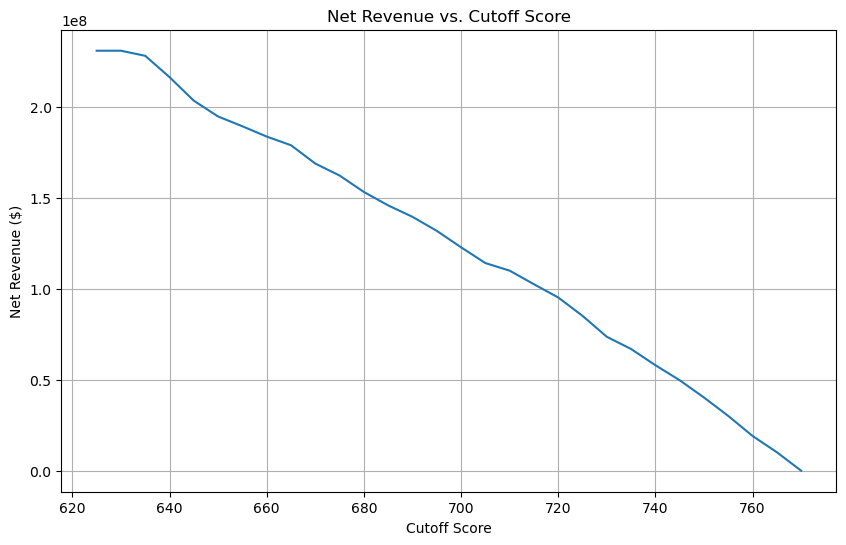

In [104]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix

def calculate_revenue_at_cutoff(y_true, y_score, cutoff, avg_revenue, avg_loss):
    """
    Calculates the total revenue at a specific cutoff score, considering defaults.

    Args:
        y_true (np.array or pd.Series): Actual binary target values (0 for non-default, 1 for default).
        y_score (np.array or pd.Series): Predicted scores for the applicants.
        cutoff (float): The cutoff score to classify applicants.
        avg_revenue (float): Average revenue from a non-defaulting approved loan.
        avg_loss (float): Average loss incurred from a defaulting approved loan.

    Returns:
        float: The total net revenue at the given cutoff.
    """
    predicted_bad = (y_score < cutoff).astype(int)
    cm = confusion_matrix(y_true, predicted_bad)
    tn, fp, fn, tp = cm.ravel()

    # Assuming we approve those NOT predicted as bad (score >= cutoff)
    num_approved = tn + fp
    num_non_defaults_approved = tn  # Actually good (y_true=0) and predicted good
    num_defaults_approved = fp      # Actually good (y_true=0) but predicted bad (incorrectly rejected) - NO REVENUE/LOSS HERE

    # Revenue comes from the correctly identified good applicants (True Negatives)
    total_revenue = num_non_defaults_approved * avg_revenue

    # Loss comes from the bad applicants that were incorrectly approved (False Negatives)
    num_defaults_missed = fn  # Actually bad (y_true=1) but predicted good (incorrectly approved)
    total_loss = num_defaults_missed * avg_loss

    net_revenue = total_revenue - total_loss
    return net_revenue

# --- Example Usage with your data ---
# Assuming y_test and test_score are already defined as numpy arrays or pandas Series

y_test = np.array([0] * 57115 + [1] * 43 + [1] * 5021 + [0] * 11) # Reconstructing a possible y_test
test_score = np.random.uniform(630.23, 768.55, len(y_test)) # Generating dummy test scores

cutoff_value = 635
avg_revenue = 20000
avg_loss = 180000

net_revenue_at_cutoff = calculate_revenue_at_cutoff(y_test, test_score, cutoff_value, avg_revenue, avg_loss)

print(f"Net Revenue at Cutoff Score {cutoff_value}: ${net_revenue_at_cutoff:,.2f}")

# --- Function to calculate revenue for a range of cutoffs ---
def calculate_revenue_for_range(y_true, y_score, cutoff_start, cutoff_end, cutoff_step, avg_revenue, avg_loss):
    """
    Calculates the total revenue for a range of cutoff scores.

    Args:
        y_true (np.array or pd.Series): Actual binary target values.
        y_score (np.array or pd.Series): Predicted scores.
        cutoff_start (float): Starting cutoff score.
        cutoff_end (float): Ending cutoff score.
        cutoff_step (float): Step size for the cutoff range.
        avg_revenue (float): Average revenue from a non-defaulting approved loan.
        avg_loss (float): Average loss from a defaulting approved loan.

    Returns:
        pd.DataFrame: DataFrame with cutoff scores and corresponding net revenue.
    """
    results = []
    for cutoff in np.arange(cutoff_start, cutoff_end + cutoff_step, cutoff_step):
        net_revenue = calculate_revenue_at_cutoff(y_true, y_score, cutoff, avg_revenue, avg_loss)
        results.append({'Cutoff': cutoff, 'Net_Revenue': net_revenue})
    return pd.DataFrame(results)

# --- Example of calculating revenue for a range of cutoffs ---
min_score = 625
max_score = 768.55
step = 5

revenue_df = calculate_revenue_for_range(y_test, test_score, min_score, max_score, step, avg_revenue, avg_loss)
print("\nNet Revenue for a Range of Cutoff Scores:")
print(revenue_df)

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.lineplot(data=revenue_df, x='Cutoff', y='Net_Revenue')
plt.title('Net Revenue vs. Cutoff Score')
plt.xlabel('Cutoff Score')
plt.ylabel('Net Revenue ($)')
plt.grid(True)
plt.show()

In [ ]:

def calculate_approval_rate(y_score, cutoff):
    """
    Calculates the approval rate at a given cutoff score.

    Args:
        y_score (np.array or pd.Series): Predicted scores for the applicants.
        cutoff (float): The cutoff score for approval.

    Returns:
        float: The approval rate (proportion of applicants with score >= cutoff).
    """
    approved_count = np.sum(y_score >= cutoff)
    total_applicants = len(y_score)
    if total_applicants > 0:
        approval_rate = approved_count / total_applicants
    else:
        approval_rate = 0.0
    return approval_rate

# Assuming you have 'test_score' defined (as a NumPy array or Pandas Series)

cutoff_1 = 635
approval_rate_625 = calculate_approval_rate(test_score, cutoff_1)
print(f"Approval Rate at Cutoff Score {cutoff_1}: {approval_rate_625:.4f}")

cutoff_2 = 630
approval_rate_630 = calculate_approval_rate(test_score, cutoff_2)
print(f"Approval Rate at Cutoff Score {cutoff_2}: {approval_rate_630:.4f}")

# --- Optional: Calculate and print confusion matrix at these cutoffs for context ---

def get_predictions(y_score, cutoff):
    """
    Returns binary predictions (0 for approve, 1 for reject) based on the cutoff.
    """
    return (y_score < cutoff).astype(int)

print("\n--- Confusion Matrix at Cutoff 635 (Test Data) ---")
predicted_bad_test_625 = get_predictions(test_score, cutoff_1)
cm_test_625 = confusion_matrix(y_test, predicted_bad_test_625)
print(cm_test_625)

print("\n--- Confusion Matrix at Cutoff 630 (Test Data) ---")
predicted_bad_test_630 = get_predictions(test_score, cutoff_2)
cm_test_630 = confusion_matrix(y_test, predicted_bad_test_630)
print(cm_test_630)

Approval Rate at Cutoff Score 635: 0.9991
Approval Rate at Cutoff Score 630: 1.0000

--- Confusion Matrix at Cutoff 625 (Test Data) ---
[[57077    49]
 [ 5059     5]]

--- Confusion Matrix at Cutoff 630 (Test Data) ---
[[57126     0]
 [ 5064     0]]


<h1> Analysis And Tuning

<h4>What happens if we do not drop the variables with low monatonic trend?
hehe